In [1]:
#import eveerything that needed
import re
import pandas as pd
import nltk
from nltk.stem import PorterStemmer as ps
from nltk.corpus import stopwords
import datetime
import string
import matplotlib.pyplot as plt
import numpy as np
import plotly
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go 
plotly.tools.set_credentials_file(username='FangzhengZhang', api_key='JCzdvumGOr8rCKHaeeeK')

In [2]:
#IO data 
table = pd.read_csv('employee_reviews.csv')
table

Unnamed: 0    company           location          dates  \
0               1     google               none   Dec 11, 2018   
1               2     google  Mountain View, CA   Jun 21, 2013   
2               3     google       New York, NY   May 10, 2014   
3               4     google  Mountain View, CA    Feb 8, 2015   
4               5     google    Los Angeles, CA   Jul 19, 2018   
5               6     google  Mountain View, CA    Dec 9, 2018   
6               7     google       New York, NY   Dec 11, 2018   
7               8     google               none   Dec 11, 2018   
8               9     google       New York, NY   Dec 10, 2018   
9              10     google               none    Dec 9, 2018   
10             11     google  Mountain View, CA    Dec 8, 2018   
11             12     google               none    Dec 8, 2018   
12             13     google               none    Dec 4, 2018   
13             14     google  San Francisco, CA    Dec 3, 2018   
14             15     google               none    Dec 6, 2018   
15             16     google               none    Dec 6, 2018   
16             17     google               none   Nov 29, 2018   
17             18     google               none    Dec 2, 2018   
18             19     google               none    Dec 1, 2018   
19             20     google               none    Dec 3, 2018   
20             21     google       New York, NY   Nov 26, 2018   
21             22     google               none    Dec 2, 2018   
22             23     google               none    Dec 1, 2018   
23             24     google               none   Nov 30, 2018   
24             25     google    Los Angeles, CA   Nov 29, 2018   
25             26     google               none   Nov 29, 2018   
26             27     google               none   Nov 28, 2018   
27             28     google  San Francisco, CA   Nov 17, 2018   
28             29     google               none   Nov 27, 2018   
29             30     google               none   Nov 20, 2018   
...           ...        ...                ...            ...   
67499       67500  microsoft               none   Jan 13, 2011   
67500       67501  microsoft               none   Jan 11, 2011   
67501       67502  microsoft  Hyderabad (India)   Dec 26, 2010   
67502       67503  microsoft               none    Jan 9, 2011   
67503       67504  microsoft               none    Jan 7, 2011   
67504       67505  microsoft  Hyderabad (India)    Jan 6, 2011   
67505       67506  microsoft               none    Jan 6, 2011   
67506       67507  microsoft               none    Jan 4, 2011   
67507       67508  microsoft  Hyderabad (India)    Jan 3, 2011   
67508       67509  microsoft               none    Jan 4, 2011   
67509       67510  microsoft               none    Jan 4, 2011   
67510       67511  microsoft  Hyderabad (India)    Jan 4, 2011   
67511       67512  microsoft  Bengaluru (India)    Jan 1, 2011   
67512       67513  microsoft               none    Jan 2, 2011   
67513       67514  microsoft      Tokyo (Japan)    Jan 2, 2011   
67514       67515  microsoft               none    Jan 3, 2011   
67515       67516  microsoft               none   Dec 29, 2010   
67516       67517  microsoft               none   Dec 31, 2010   
67517       67518  microsoft               none   Dec 30, 2010   
67518       67519  microsoft               none   Dec 29, 2010   
67519       67520  microsoft  Hyderabad (India)   Dec 13, 2010   
67520       67521  microsoft               none   Dec 20, 2010   
67521       67522  microsoft               none   Dec 22, 2010   
67522       67523  microsoft               none   Dec 18, 2010   
67523       67524  microsoft               none   Dec 17, 2010   
67524       67525  microsoft               none   Dec 16, 2010   
67525       67526  microsoft               none   Dec 16, 2010   
67526       67527  microsoft               none   Dec 15, 2010   
67527       67528  microsoft               none

# Question 1

In [48]:
#print all the important info
company_set = set(table.company)
company_table_dic = {}
company_name_tuple = ('overall','amazon','google','apple','facebook','microsoft','netflix')
company_color_dic = {company_name_tuple[0]:'#000000',company_name_tuple[1]:'#f44542',
                     company_name_tuple[2]:'#f4f141',company_name_tuple[3]:'#41f45e',
                     company_name_tuple[4]:'#2cd5e8',company_name_tuple[5]:'#3513a5',company_name_tuple[6]:'#a5127b'}
amazon_table = table[table.company == 'amazon']
google_table = table[table.company == 'google']
apple_table = table[table.company == 'apple']
facebook_table = table[table.company == 'facebook']
microsoft_table = table[table.company == 'microsoft']
netflix_table = table[table.company == 'netflix']
company_table_dic[company_name_tuple[0]] = table
company_table_dic[company_name_tuple[1]] = amazon_table
company_table_dic[company_name_tuple[2]] = google_table
company_table_dic[company_name_tuple[3]] = apple_table
company_table_dic[company_name_tuple[4]] = facebook_table
company_table_dic[company_name_tuple[5]] = microsoft_table
company_table_dic[company_name_tuple[6]] = netflix_table


{'overall':        Unnamed: 0    company           location          dates  \
 0               1     google               none   Dec 11, 2018   
 1               2     google  Mountain View, CA   Jun 21, 2013   
 2               3     google       New York, NY   May 10, 2014   
 3               4     google  Mountain View, CA    Feb 8, 2015   
 4               5     google    Los Angeles, CA   Jul 19, 2018   
 5               6     google  Mountain View, CA    Dec 9, 2018   
 6               7     google       New York, NY   Dec 11, 2018   
 7               8     google               none   Dec 11, 2018   
 8               9     google       New York, NY   Dec 10, 2018   
 9              10     google               none    Dec 9, 2018   
 10             11     google  Mountain View, CA    Dec 8, 2018   
 11             12     google               none    Dec 8, 2018   
 12             13     google               none    Dec 4, 2018   
 13             14     google  San Francisco, CA   

In [59]:
#print each small table

for name in company_name_tuple:
    print (name + " table:")
    print ("table length: " + str(len(company_table_dic[name])))
    display(company_table_dic[name].head())

overall table:
table length: 67529


Unnamed: 0 company           location          dates  \
0           1  google               none   Dec 11, 2018   
1           2  google  Mountain View, CA   Jun 21, 2013   
2           3  google       New York, NY   May 10, 2014   
3           4  google  Mountain View, CA    Feb 8, 2015   
4           5  google    Los Angeles, CA   Jul 19, 2018   

                                  job-title  \
0     Current Employee - Anonymous Employee   
1         Former Employee - Program Manager   
2  Current Employee - Software Engineer III   
3     Current Employee - Anonymous Employee   
4       Former Employee - Software Engineer   

                                             summary  \
0                           Best Company to work for   
1  Moving at the speed of light, burn out is inev...   
2  Great balance between big-company security and...   
3  The best place I've worked and also the most d...   
4                    Unique, one of a kind dream job   

                                                pros  \
0                      People are smart and friendly   
1  1) Food, food, food. 15+ cafes on main campus ...   
2  * If you're a software engineer, you're among ...   
3  You can't find a more well-regarded company th...   
4  Google is a world of its own. At every other c...   

                                                cons  \
0                 Bureaucracy is slowing things down   
1  1) Work/life balance. What balance? All those ...   
2  * It *is* becoming larger, and with it comes g...   
3  I live in SF so the commute can take between 1...   
4  If you don't work in MTV (HQ), you will be giv...   

                                      advice-to-mgmt  overall-ratings  \
0                                               none              5.0   
1  1) Don't dismiss emotional intelligence and ad...              4.0   
2  Keep the focus on the user. Everything else wi...              5.0   
3  Keep on NOT micromanaging - that is a huge ben...              5.0   
4  Promote managers into management for their man...              5.0   

  work-balance-stars culture-values-stars carrer-opportunities-stars  \
0                4.0                  5.0                        5.0   
1                2.0                  3.0                        3.0   
2                5.0                  4.0                        5.0   
3                2.0                  5.0                        5.0   
4                5.0                  5.0                        5.0   

  comp-benefit-stars senior-mangemnet-stars  helpful-count  \
0                4.0                    5.0              0   
1                5.0                    3.0           2094   
2                5.0                    4.0            949   
3                4.0                    5.0            498   
4                5.0                    5.0             49   

                                                link  
0  https://www.glassdoor.com/Reviews/Google-Revie...  
1  https://www.glassdoor.com/Reviews/Google-Revie...  
2  https://www.glassdoor.com/Reviews/Google-Revie...  
3  https://www.glassdoor.com/Reviews/Google-Revie...  
4  https://www.glassdoor.com/Reviews/Google-Revie...

amazon table:
table length: 26430


Unnamed: 0 company       location          dates  \
7819        7820  amazon    Phoenix, AZ           None   
7820        7821  amazon  Sunnyvale, CA   Dec 10, 2018   
7821        7822  amazon    Seattle, WA   Jan 10, 2016   
7822        7823  amazon    Seattle, WA   Feb 20, 2016   
7823        7824  amazon    Seattle, WA   Dec 17, 2013   

                                              job-title  \
7819    Current Employee - Software Development Manager   
7820  Current Employee - Manager, Software Developme...   
7821              Current Employee - Anonymous Employee   
7822      Current Employee - Senior Engineering Manager   
7823    Current Employee - Software Development Manager   

                                                summary  \
7819                           An Amazing Place to Work   
7820           Software Development Engineering Manager   
7821                            You Get What You Put In   
7822                     Exciting Work, Abusive Culture   
7823  Can be amazing for some people, horrible for o...   

                                                   pros  \
7819  I've been at Amazon for a month now, and I've ...   
7820  Work hard, have fun, make history. Be proud of...   
7821  Really smart people, a lot of opportunity for ...   
7822  Jeff Bezos and his "S-Team" are brilliant and ...   
7823  Amazon is doing lot's of cool stuff...but lots...   

                                                   cons  \
7819  No cons, so far - seriously. Like I said, I'm ...   
7820  RUS grand each year related to last year's sto...   
7821  You have to be self motivated. NO ONE will hol...   
7822  The management process is abusive, and I'm cur...   
7823  - You're responsible for your own career progr...   

                                         advice-to-mgmt  overall-ratings  \
7819                                               none              5.0   
7820                                               none              5.0   
7821  More on-boarding training before new employees...              5.0   
7822  Don't pretend that the recent NY Times article...              3.0   
7823  Stack ranking is a horrible practice since it'...              4.0   

     work-balance-stars culture-values-stars carrer-opportunities-stars  \
7819                4.0                  5.0                        5.0   
7820                5.0                  5.0                        5.0   
7821                4.0                  5.0                        5.0   
7822                3.0                  3.0                        3.0   
7823                3.0                  3.0                        5.0   

     comp-benefit-stars senior-mangemnet-stars  helpful-count  \
7819                5.0                    5.0            580   
7820                4.0                    5.0              0   
7821                5.0                    5.0           1759   
7822                4.0                    4.0           1404   
7823                5.0                    4.0           1275   

                                                   link  
7819  https://www.glassdoor.com/Reviews/Amazon-Revie...  
7820  https://www.glassdoor.com/Reviews/Amazon-Revie...  
7821  https://www.glassdoor.com/Reviews/Amazon-Revie...  
7822  https://www.glassdoor.com/Reviews/Amazon-Revie...  
7823  https://www.glassdoor.com/Reviews/Amazon-Revie...

google table:
table length: 7819


Unnamed: 0 company           location          dates  \
0           1  google               none   Dec 11, 2018   
1           2  google  Mountain View, CA   Jun 21, 2013   
2           3  google       New York, NY   May 10, 2014   
3           4  google  Mountain View, CA    Feb 8, 2015   
4           5  google    Los Angeles, CA   Jul 19, 2018   

                                  job-title  \
0     Current Employee - Anonymous Employee   
1         Former Employee - Program Manager   
2  Current Employee - Software Engineer III   
3     Current Employee - Anonymous Employee   
4       Former Employee - Software Engineer   

                                             summary  \
0                           Best Company to work for   
1  Moving at the speed of light, burn out is inev...   
2  Great balance between big-company security and...   
3  The best place I've worked and also the most d...   
4                    Unique, one of a kind dream job   

                                                pros  \
0                      People are smart and friendly   
1  1) Food, food, food. 15+ cafes on main campus ...   
2  * If you're a software engineer, you're among ...   
3  You can't find a more well-regarded company th...   
4  Google is a world of its own. At every other c...   

                                                cons  \
0                 Bureaucracy is slowing things down   
1  1) Work/life balance. What balance? All those ...   
2  * It *is* becoming larger, and with it comes g...   
3  I live in SF so the commute can take between 1...   
4  If you don't work in MTV (HQ), you will be giv...   

                                      advice-to-mgmt  overall-ratings  \
0                                               none              5.0   
1  1) Don't dismiss emotional intelligence and ad...              4.0   
2  Keep the focus on the user. Everything else wi...              5.0   
3  Keep on NOT micromanaging - that is a huge ben...              5.0   
4  Promote managers into management for their man...              5.0   

  work-balance-stars culture-values-stars carrer-opportunities-stars  \
0                4.0                  5.0                        5.0   
1                2.0                  3.0                        3.0   
2                5.0                  4.0                        5.0   
3                2.0                  5.0                        5.0   
4                5.0                  5.0                        5.0   

  comp-benefit-stars senior-mangemnet-stars  helpful-count  \
0                4.0                    5.0              0   
1                5.0                    3.0           2094   
2                5.0                    4.0            949   
3                4.0                    5.0            498   
4                5.0                    5.0             49   

                                                link  
0  https://www.glassdoor.com/Reviews/Google-Revie...  
1  https://www.glassdoor.com/Reviews/Google-Revie...  
2  https://www.glassdoor.com/Reviews/Google-Revie...  
3  https://www.glassdoor.com/Reviews/Google-Revie...  
4  https://www.glassdoor.com/Reviews/Google-Revie...

apple table:
table length: 12950


Unnamed: 0 company      location          dates  \
36649       36650   apple          none   Dec 11, 2018   
36650       36651   apple          none   Aug 28, 2014   
36651       36652   apple     Tempe, AZ   Mar 10, 2017   
36652       36653   apple  Lakewood, CO   May 13, 2015   
36653       36654   apple          none    Dec 8, 2018   

                                      job-title  \
36649     Current Employee - Anonymous Employee   
36650     Current Employee - Anonymous Employee   
36651             Current Employee - Specialist   
36652  Current Employee - Apple At Home Advisor   
36653     Current Employee - Anonymous Employee   

                                                 summary  \
36649                                 GIS & Data Analyst   
36650  Challenging, Rewarding, but ZERO work/life bal...   
36651         A Company as Meticulous as Their Products!   
36652                                    At-Home-Advisor   
36653                                               Good   

                                                    pros  \
36649               Fun work environment, great managers   
36650  We work with geniuses - in every department, W...   
36651  Competitive Pay, Great Benefits, Amazing Peopl...   
36652  The position is at home. The company is AMAZIN...   
36653          Salary, Hours, Time, Career opportunities   

                                                    cons  \
36649  Sometimes there's a high volume of work, but s...   
36650  ZERO ZERO ZERO work/life balance. Execs have b...   
36651  None! I had one of the best times ever at this...   
36652  The schedule changes every 90 days and you hav...   
36653                    They only offer part-time hours   

                                          advice-to-mgmt  overall-ratings  \
36649                                               none              5.0   
36650                                               none              4.0   
36651       You guys are awesome. Keep up the good work!              5.0   
36652  The management consists of a team manager and ...              5.0   
36653                                               none              5.0   

      work-balance-stars culture-values-stars carrer-opportunities-stars  \
36649               none                 none                       none   
36650                1.0                  3.0                        3.0   
36651                4.0                  5.0                        5.0   
36652                3.0                  5.0                        5.0   
36653                3.0                  3.0                        2.0   

      comp-benefit-stars senior-mangemnet-stars  helpful-count  \
36649               none                   none              0   
36650                3.0                    3.0            822   
36651                4.0                    5.0            248   
36652                4.0                    5.0            442   
36653                5.0                    3.0              1   

                                                    link  
36649  https://www.glassdoor.com/Reviews/Apple-Review...  
36650  https://www.glassdoor.com/Reviews/Apple-Review...  
36651  https://www.glassdoor.com/Reviews/Apple-Review...  
36652  https://www.glassdoor.com/Reviews/Apple-Review...  
36653  https://www.glassdoor.com/Reviews/Apple-Review...

facebook table:
table length: 1590


Unnamed: 0   company        location          dates  \
34249       34250  facebook  Menlo Park, CA   Dec 11, 2018   
34250       34251  facebook  Menlo Park, CA   Feb 16, 2017   
34251       34252  facebook  Menlo Park, CA   Feb 16, 2016   
34252       34253  facebook  Menlo Park, CA    Dec 3, 2018   
34253       34254  facebook     Seattle, WA    Dec 5, 2018   

                                               job-title  \
34249              Current Employee - Product Operations   
34250              Current Employee - Anonymous Employee   
34251  Current Employee - Site Selection Program Manager   
34252              Current Employee - Anonymous Employee   
34253         Current Employee - Staff Software Engineer   

                                                 summary  \
34249        2nd Job out of college --> Great Experience   
34250  Fast paced company with high expectations, but...   
34251                               Pleasantly Surprised   
34252            Don't believe all of the negative press   
34253             Continues to be an amazing place to be   

                                                    pros  \
34249  Context: I worked in operations - Very entrepr...   
34250  - Incredible benefits - Excellent compensation...   
34251  I'm a 55 year old working in a company where t...   
34252  Having worked at Facebook for a number of year...   
34253  Smart people who were chosen to be good to wor...   

                                                    cons  \
34249  - Very entrepreneurial culture: There is no fo...   
34250  - If you don't learn to make the work life bal...   
34251  Like any tech company, the work is big and com...   
34252  Particularly as of late, Facebook has been sub...   
34253  Took a year and a half to learn to play defens...   

                                          advice-to-mgmt  overall-ratings  \
34249                                               none              5.0   
34250  Keep doing what you're doing, keep an eye on e...              5.0   
34251  Keep doing what you're doing and fight hard to...              5.0   
34252                                               none              5.0   
34253  I'd love to see management be half as open wit...              5.0   

      work-balance-stars culture-values-stars carrer-opportunities-stars  \
34249                4.0                  4.0                        5.0   
34250                5.0                  5.0                        5.0   
34251                4.0                  5.0                        4.0   
34252                4.0                  5.0                        5.0   
34253                5.0                  5.0                        5.0   

      comp-benefit-stars senior-mangemnet-stars  helpful-count  \
34249                5.0                    4.0              0   
34250                5.0                    5.0            294   
34251                5.0                    5.0            363   
34252                5.0                    5.0              6   
34253                4.0                    5.0              4   

                                                    link  
34249  https://www.glassdoor.com/Reviews/Facebook-Rev...  
34250  https://www.glassdoor.com/Reviews/Facebook-Rev...  
34251  https://www.glassdoor.com/Reviews/Facebook-Rev...  
34252  https://www.glassdoor.com/Reviews/Facebook-Rev...  
34253  https://www.glassdoor.com/Reviews/Facebook-Rev...

microsoft table:
table length: 17930


Unnamed: 0    company     location          dates  \
49599       49600  microsoft         none   Dec 11, 2018   
49600       49601  microsoft  Redmond, WA   Jan 28, 2013   
49601       49602  microsoft  Redmond, WA    Dec 9, 2018   
49602       49603  microsoft  Chicago, IL    Dec 9, 2018   
49603       49604  microsoft         none    Dec 9, 2018   

                                   job-title                      summary  \
49599  Current Employee - Anonymous Employee                    Microsoft   
49600  Current Employee - Anonymous Employee  Thoughts after 10 years....   
49601  Current Employee - Anonymous Employee    Technical Account Manager   
49602                 Current Employee - CSA                Great company   
49603  Current Employee - Anonymous Employee    Great Company to work for   

                                                    pros  \
49599  Culture, role impact, mission driven, collabor...   
49600  1. If you love tech, this is a great place. No...   
49601                     Great company and Great people   
49602  Benefits, work-life balance, tons of internal ...   
49603  Smart people, work life balance, growth mindse...   

                                                    cons  \
49599          Volume of work is sometimes unmanageable,   
49600  Brand on Your Resume: After many years of losi...   
49601                         I see no cons at this time   
49602                       Can't think of any right now   
49603                 Can be hard to transfer internally   

                                          advice-to-mgmt  overall-ratings  \
49599                                               none              5.0   
49600  I'll type it here - but I don't they are liste...              4.0   
49601                             Keep up the great work              5.0   
49602                                               none              5.0   
49603                                               none              5.0   

      work-balance-stars culture-values-stars carrer-opportunities-stars  \
49599                4.0                  5.0                        5.0   
49600                4.0                  2.0                        2.0   
49601                4.0                  5.0                        5.0   
49602                5.0                  5.0                        5.0   
49603                5.0                  5.0                        4.0   

      comp-benefit-stars senior-mangemnet-stars  helpful-count  \
49599                5.0                    5.0              0   
49600                4.0                   none           1439   
49601                5.0                    5.0              1   
49602                5.0                    5.0              0   
49603                5.0                    5.0              0   

                                                    link  
49599  https://www.glassdoor.com/Reviews/Microsoft-Re...  
49600  https://www.glassdoor.com/Reviews/Microsoft-Re...  
49601  https://www.glassdoor.com/Reviews/Microsoft-Re...  
49602  https://www.glassdoor.com/Reviews/Microsoft-Re...  
49603  https://www.glassdoor.com/Reviews/Microsoft-Re...

netflix table:
table length: 810


Unnamed: 0  company         location          dates  \
35839       35840  netflix             none   Oct 22, 2018   
35840       35841  netflix             none   Sep 20, 2018   
35841       35842  netflix             none    Dec 5, 2018   
35842       35843  netflix  Los Angeles, CA   Nov 30, 2018   
35843       35844  netflix             none   Nov 26, 2018   

                                   job-title  \
35839  Current Employee - Anonymous Employee   
35840  Current Employee - Anonymous Employee   
35841   Former Employee - Anonymous Employee   
35842         Former Employee - Video Editor   
35843   Former Employee - Anonymous Employee   

                                       summary  \
35839                      Executive Assistant   
35840  How much does a functioning human cost?   
35841                     QA Tester Contractor   
35842                           Netflix Editor   
35843                                I love it   

                                                    pros  \
35839  Open communication. Top of market pay. Extreme...   
35840  - Paycheck - So many good people - Such a grea...   
35841  Great personalities, great work culture, free ...   
35842  Excellent Projects with Pros from throughout t...   
35843                        It was great and i loved it   

                                                    cons  \
35839  Very meeting heavy, which isn't a con, but doe...   
35840  I have been working for a year at Netflix.  I'...   
35841                   None really at all at the moment   
35842              Still setting the feel of the company   
35843             Not enough free snack especially chips   

                                      advice-to-mgmt  overall-ratings  \
35839  Please continue to do what you've been doing.              5.0   
35840                   Ask yourself those questions              3.0   
35841                                           none              5.0   
35842                                           none              5.0   
35843                                           none              5.0   

      work-balance-stars culture-values-stars carrer-opportunities-stars  \
35839                4.0                  5.0                        5.0   
35840                2.0                  1.0                        5.0   
35841               none                 none                       none   
35842                4.0                  3.0                        4.0   
35843                5.0                  5.0                        5.0   

      comp-benefit-stars senior-mangemnet-stars  helpful-count  \
35839                4.0                    4.0              2   
35840                5.0                    4.0             52   
35841               none                   none              1   
35842                4.0                    3.0              0   
35843                5.0                    5.0              0   

                                                    link  
35839  https://www.glassdoor.com/Reviews/Netflix-Revi...  
35840  https://www.glassdoor.com/Reviews/Netflix-Revi...  
35841  https://www.glassdoor.com/Reviews/Netflix-Revi...  
35842  https://www.glassdoor.com/Reviews/Netflix-Revi...  
35843  https://www.glassdoor.com/Reviews/Netflix-Revi...

In [4]:
#plot the number of reviews for each company 
review_count_dic = {}
review_count_dic['amazon'] = len(amazon_table)
review_count_dic['apple'] = len(apple_table) 
review_count_dic['facebook'] = len(facebook_table)
review_count_dic['google'] = len(google_table)
review_count_dic['microsoft'] = len(microsoft_table)
review_count_dic['netflix'] = len(netflix_table)


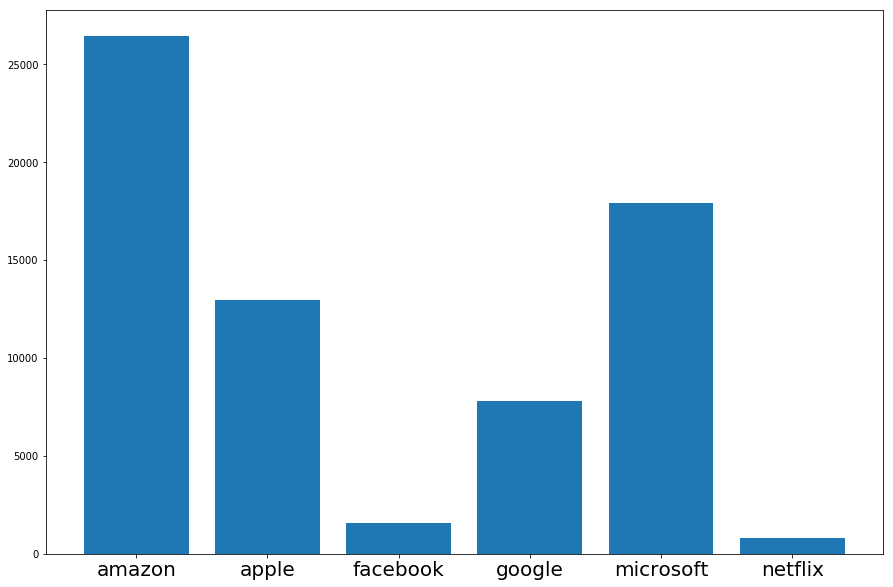

In [61]:
#plot the number of review for each company
height = list(review_count_dic.values())
bars = list(review_count_dic.keys())
y_pos = np.arange(len(bars))
plt.figure(figsize=(15,10))
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xticks(fontsize=20)

# Show graphic
plt.show()


In [6]:
date_look_up_dic = {"Jan": 1 ,"Feb": 2 ,"Mar": 3 ,"Apr": 4, "May": 5, "Jun": 6,"Jul": 7,"Aug": 8,"Sep": 9,"Oct": 10,"Nov": 11,"Dec": 12}
def change_date_format(in_str):
    '''Dec 11, 2018  ->  2018 12 11'''
    str_part = re.split(' |, ',in_str)
    r_str = ''+ str_part[3] + '-' + str(date_look_up_dic[str_part[1]]) + '-' + str_part[2]
    try:
        date_time_obj = datetime.datetime.strptime(r_str, '%Y-%m-%d')
    except ValueError:
        date_time_obj = datetime.datetime.strptime("6666-6-6", '%Y-%m-%d')
    date_time_obj = date_time_obj.date()
    return date_time_obj
    
def clear_date_none(temp_table):
    return_table = temp_table[temp_table.dates != 'None']
    #todo change the date format 
    return_table.dates = return_table.dates.map(change_date_format)
    return_table = return_table.sort_values(by='dates', ascending=True)
    return return_table

In [7]:
#clean the tables and sort them by date
amazon_date_clean_table = clear_date_none(amazon_table)
apple_date_clean_table = clear_date_none(apple_table)
facebook_date_clean_table = clear_date_none(facebook_table)
google_date_clean_table = clear_date_none(google_table)
microsoft_date_clean_table = clear_date_none(microsoft_table)
netflix_date_clean_table = clear_date_none(netflix_table)


c:\users\fangz\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [8]:
def count_dates(temp_table):
    temp_time_dic = {}
    for i in range(len(temp_table)):
        row = temp_table.iloc[i]
        if str(row.dates) not in temp_time_dic:
            temp_time_dic[str(row.dates)] = 1
        else:
            temp_time_dic[str(row.dates)]+=1
    return temp_time_dic

In [9]:
#big file, take long time to run!!!!
#count the time line 
amazon_time_line_dic = count_dates(amazon_date_clean_table)
apple_time_line_dic = count_dates(apple_date_clean_table)
facebook_time_line_dic = count_dates(facebook_date_clean_table)
google_time_line_dic = count_dates(google_date_clean_table)
microsoft_time_line_dic = count_dates(microsoft_date_clean_table)
netflix_time_line_dic = count_dates(netflix_date_clean_table)


In [10]:
amazon_date_review_table = pd.DataFrame.from_dict({'Dates':list(amazon_time_line_dic.keys()) , 'Amazon_Reviews': list(amazon_time_line_dic.values())})
apple_date_review_table = pd.DataFrame.from_dict({'Dates':list(apple_time_line_dic.keys()) , 'Apple_Reviews': list(apple_time_line_dic.values())})
facebook_date_review_table = pd.DataFrame.from_dict({'Dates':list(facebook_time_line_dic.keys()) , 'Facebook_Reviews': list(facebook_time_line_dic.values())})
google_date_review_table = pd.DataFrame.from_dict({'Dates':list(google_time_line_dic.keys()) , 'Google_Reviews': list(google_time_line_dic.values())})
microsoft_date_review_table = pd.DataFrame.from_dict({'Dates':list(microsoft_time_line_dic.keys()) , 'Microsoft_Reviews': list(microsoft_time_line_dic.values())})
netflix_date_review_table = pd.DataFrame.from_dict({'Dates':list(netflix_time_line_dic.keys()) , 'Netflix_Reviews': list(netflix_time_line_dic.values())})

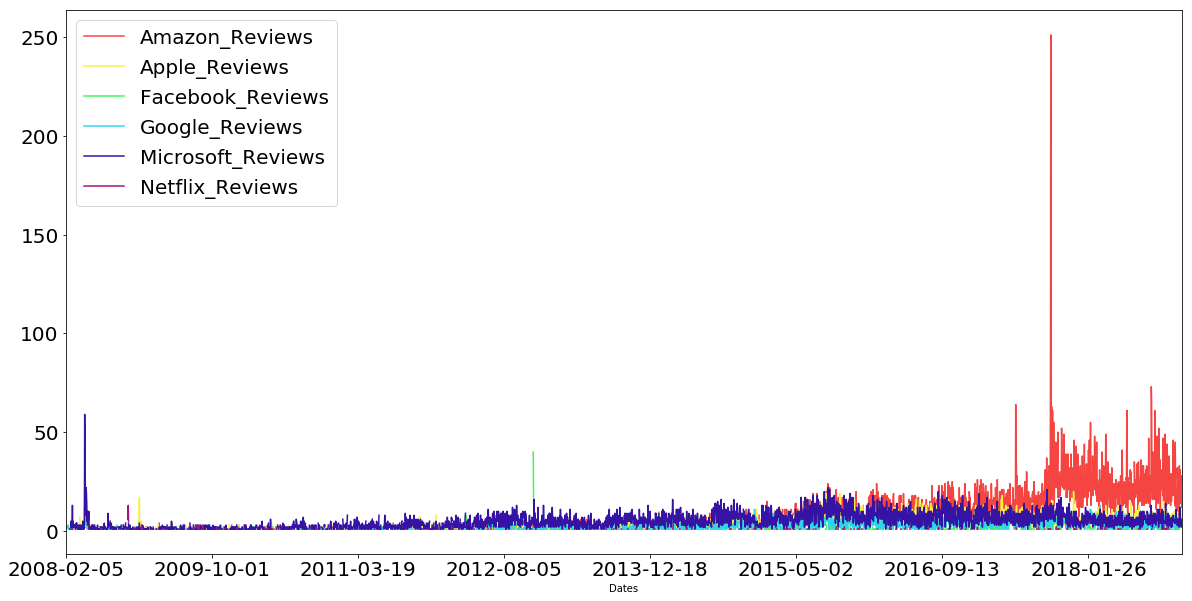

In [67]:
total_date_review_table = pd.merge(amazon_date_review_table, apple_date_review_table, how='outer', on=['Dates'])
total_date_review_table = pd.merge(total_date_review_table, facebook_date_review_table, how='outer', on=['Dates'])
total_date_review_table = pd.merge(total_date_review_table, google_date_review_table, how='outer', on=['Dates'])
total_date_review_table = pd.merge(total_date_review_table, microsoft_date_review_table, how='outer', on=['Dates'])
total_date_review_table = pd.merge(total_date_review_table, netflix_date_review_table, how='outer', on=['Dates'])
total_date_review_table = total_date_review_table.sort_values(by=['Dates'])
total_date_review_table = total_date_review_table.iloc[:-1]
total_date_review_table.iloc[1:].plot(kind = 'line',x='Dates', y=['Amazon_Reviews', 'Apple_Reviews','Facebook_Reviews', 'Google_Reviews','Microsoft_Reviews', 'Netflix_Reviews'],
                                      fontsize=20,figsize=(20,10),color=['#f44542','#f4f141','#41f45e','#2cd5e8','#3513a5','#a5127b']).legend(fontsize=20)

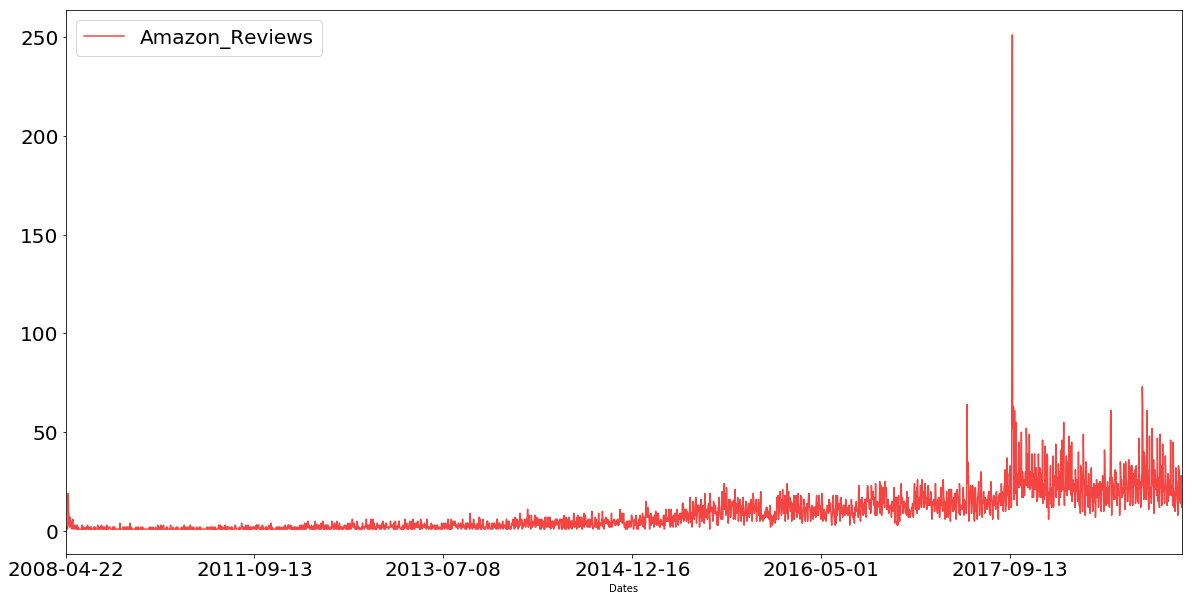

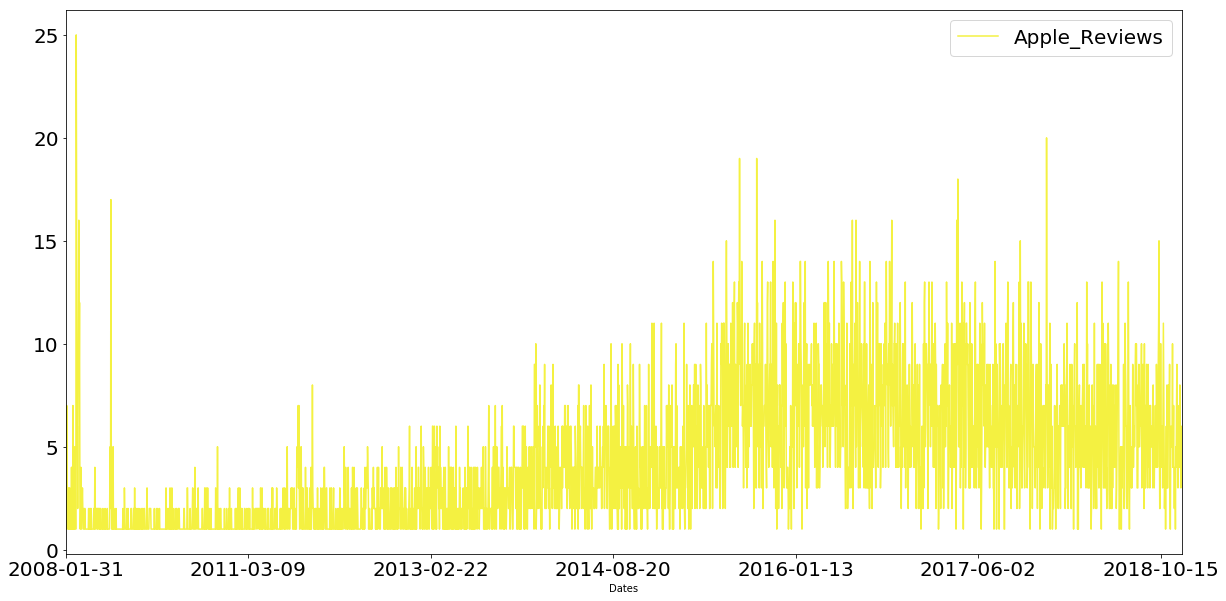

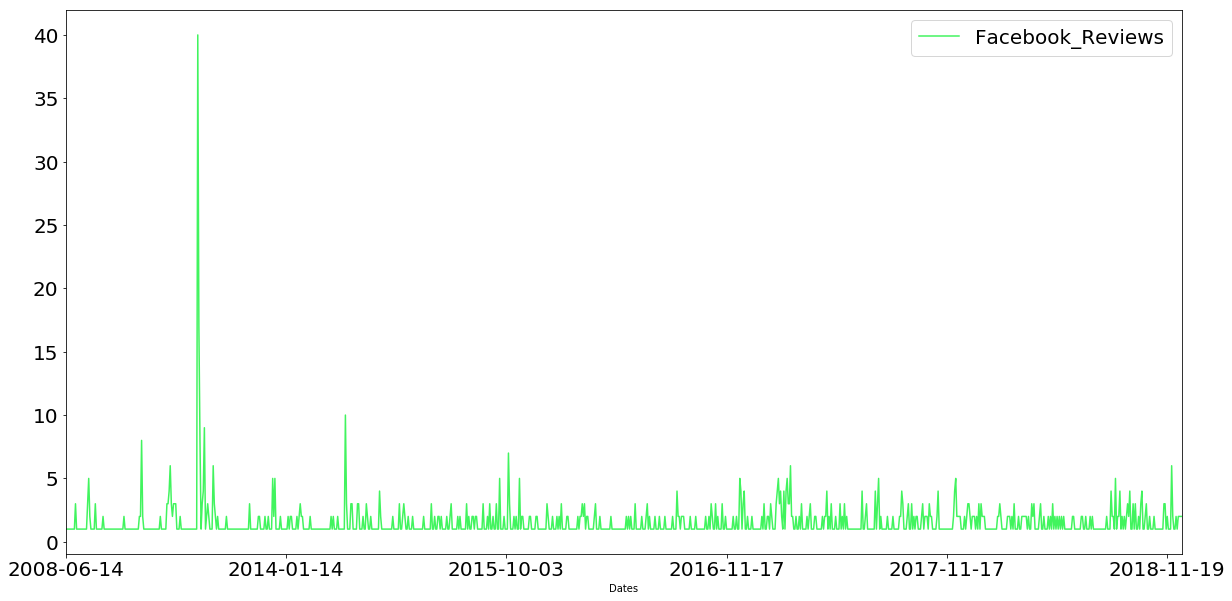

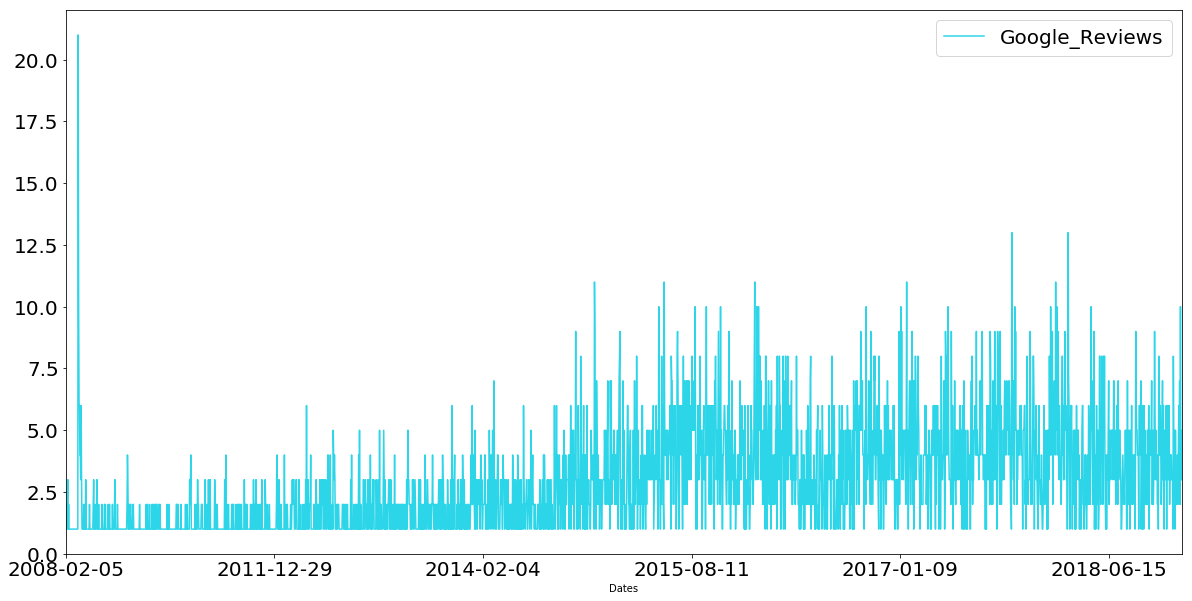

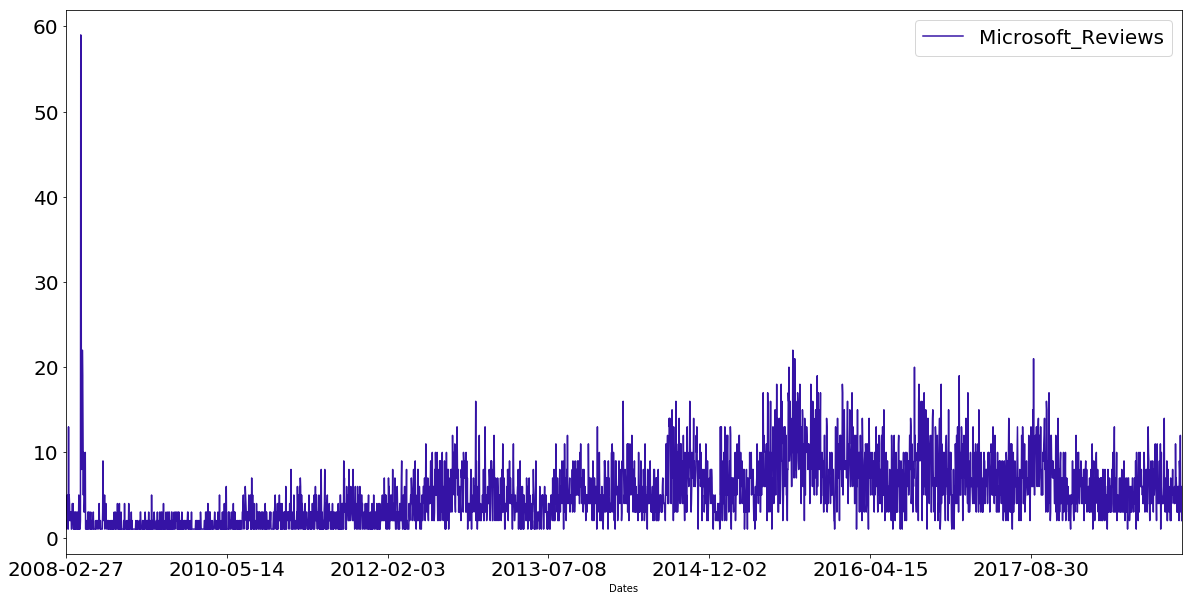

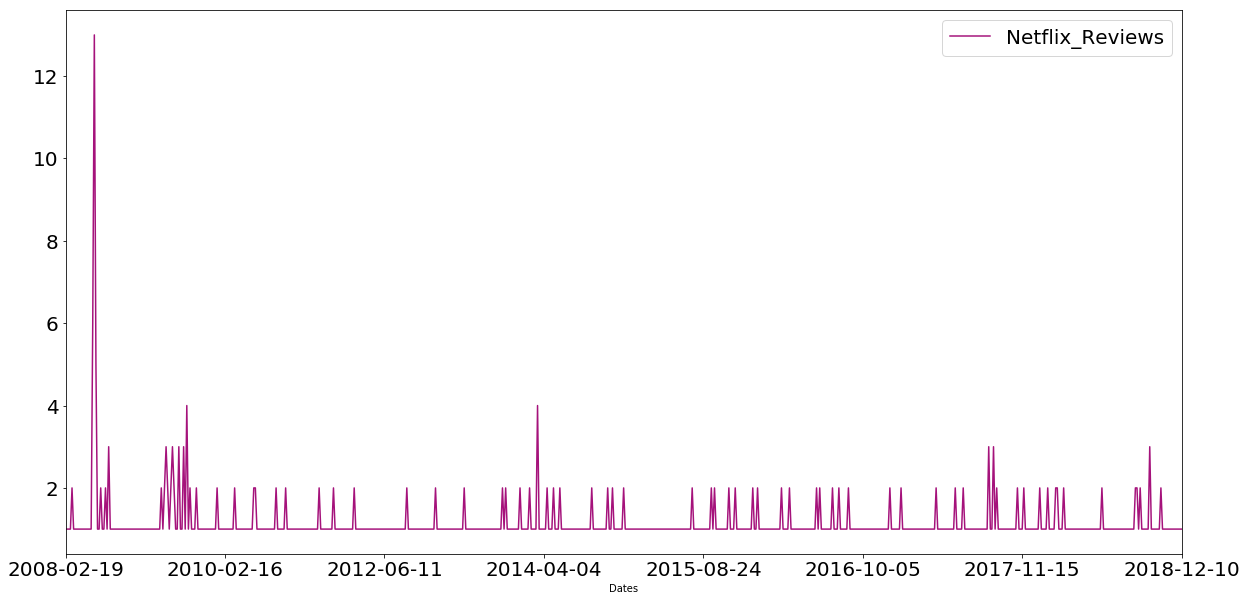

In [68]:
amazon_date_review_table.iloc[:-1].plot(kind = 'line',x='Dates', y='Amazon_Reviews',fontsize=20,figsize=(20,10),color='#f44542').legend(fontsize=20)
apple_date_review_table.iloc[:-1].plot(kind = 'line',x='Dates', y='Apple_Reviews',fontsize=20,figsize=(20,10),color='#f4f141').legend(fontsize=20)
facebook_date_review_table.iloc[:-1].plot(kind = 'line',x='Dates', y='Facebook_Reviews',fontsize=20,figsize=(20,10),color='#41f45e').legend(fontsize=20)
google_date_review_table.iloc[:-1].plot(kind = 'line',x='Dates', y='Google_Reviews',fontsize=20,figsize=(20,10),color='#2cd5e8').legend(fontsize=20)
microsoft_date_review_table.iloc[:-1].plot(kind = 'line',x='Dates', y='Microsoft_Reviews',fontsize=20,figsize=(20,10),color='#3513a5').legend(fontsize=20)
netflix_date_review_table.iloc[:-1].plot(kind = 'line',x='Dates', y='Netflix_Reviews',fontsize=20,figsize=(20,10),color='#a5127b').legend(fontsize=20)

# Question 2

# Question 3

In [13]:
company_name_tuple

('overall', 'amazon', 'google', 'apple', 'facebook', 'microsoft', 'netflix')

In [71]:
pro_str_list_dic = {}
con_str_list_dic = {}
for name in company_name_tuple:
    pro_str_list_dic[name] = list(company_table_dic[name].pros)
    con_str_list_dic[name] = list(company_table_dic[name].cons)
    print("Length of "+ name +" pro: " + str(len(pro_str_list_dic[name])))
    print("Length of "+ name +" con: " + str(len(con_str_list_dic[name])))


Length of overall pro: 67529
Length of overall con: 67529
Length of amazon pro: 26430
Length of amazon con: 26430
Length of google pro: 7819
Length of google con: 7819
Length of apple pro: 12950
Length of apple con: 12950
Length of facebook pro: 1590
Length of facebook con: 1590
Length of microsoft pro: 17930
Length of microsoft con: 17930
Length of netflix pro: 810
Length of netflix con: 810


In [15]:
#it is core function to do big data:

stemmer = ps()


def remove_non_english_words(words):
    clean_words = []
    englis_words = nltk.corpus.words.words('en')
    for word in words:
        if word in englis_words:
            clean_words.append(word)
    return clean_words
    

def parse_as_words(sentence):
    return_list = []
    sentence = sentence.lower()
    sentence = sentence.translate(str.maketrans({key: None for key in string.punctuation}))
    words = nltk.word_tokenize(sentence)
    for word in words:
        if not word.isdigit():
            return_list.append(word)
    return return_list

def parse_as_root_phrase(sentence):
    phrase_list = []
    words = parse_as_words(sentence)
    words = back_to_root(words)
    #words = remove_non_english_words(words)
    tag_list = nltk.pos_tag(words)
    #get the phrases
    for i in range(len(tag_list)):
        if i+3 < len(tag_list):
            if tag_list[i][1] == "JJ" and tag_list[i+1][1] == "NN" and tag_list[i+2][1] == "CC"and tag_list[i+3][1] == "NN":
                phrase_list.append(str(tag_list[i][0]) + ' ' + str(tag_list[i+1][0]) + ' ' + str(tag_list[i+2][0])+ ' ' + str(tag_list[i+3][0]))
        
        if i+2 < len(tag_list):
            # at least 3 words left
            #(tag_list[i][1] == "JJ" and tag_list[i+1][1] == "NN" and tag_list[i+2][1] == "NN") or 
            if (tag_list[i][1] == "NN" and tag_list[i+1][1] == "VBP" and tag_list[i+2][1] == "JJ"):
                phrase_list.append(str(tag_list[i][0]) + ' ' + str(tag_list[i+1][0]) + ' ' + str(tag_list[i+2][0]))
           
        if i+1 < len(tag_list):
            # at least 2 words left
            if tag_list[i][1] == "JJ" and tag_list[i+1][1] == "NN":
                phrase_list.append(str(tag_list[i][0] + ' ' + str(tag_list[i+1][0])))
    
    return phrase_list

def parse_as_phrase(sentence):
    phrase_list = []
    words = parse_as_words(sentence)
    #words = back_to_root(words)
    #words = remove_non_english_words(words)
    tag_list = nltk.pos_tag(words)
    #get the phrases
    for i in range(len(tag_list)):
        if i+3 < len(tag_list):
            if tag_list[i][1] == "JJ" and tag_list[i+1][1] == "NN" and tag_list[i+2][1] == "CC"and tag_list[i+3][1] == "NN":
                phrase_list.append(str(tag_list[i][0]) + ' ' + str(tag_list[i+1][0]) + ' ' + str(tag_list[i+2][0])+ ' ' + str(tag_list[i+3][0]))
        
        if i+2 < len(tag_list):
            # at least 3 words left
            #(tag_list[i][1] == "JJ" and tag_list[i+1][1] == "NN" and tag_list[i+2][1] == "NN") or 
            if (tag_list[i][1] == "NN" and tag_list[i+1][1] == "VBP" and tag_list[i+2][1] == "JJ"):
                phrase_list.append(str(tag_list[i][0]) + ' ' + str(tag_list[i+1][0]) + ' ' + str(tag_list[i+2][0]))
           
        if i+1 < len(tag_list):
            # at least 2 words left
            if tag_list[i][1] == "JJ" and tag_list[i+1][1] == "NN":
                phrase_list.append(str(tag_list[i][0] + ' ' + str(tag_list[i+1][0])))
    
    return phrase_list





def back_to_root(words):
    return list(map(stemmer.stem,words))


def count_words(words):
    temp_word_count_dic = {}
    for word in words:
        if word not in temp_word_count_dic:
            temp_word_count_dic[word] = 1
        else:
            temp_word_count_dic[word] += 1
    return temp_word_count_dic



def parse_data_clean_and_count(sentence_list,isroot,isphrase,isrootphrase):
    words_counter_dic = {}
    if not isphrase:
        list_of_words_list = list(map(parse_as_words, sentence_list))
    elif isrootphrase:
        list_of_words_list = list(map(parse_as_root_phrase, sentence_list))
    else:
        list_of_words_list = list(map(parse_as_phrase, sentence_list))
        
        
    if isroot and not isphrase:
        list_of_ready_to_count_list = list(map(back_to_root, list_of_words_list))
    else:
        list_of_ready_to_count_list = list_of_words_list
        
    counter_dic_list =  list(map(count_words , list_of_ready_to_count_list))
    
    for dic in counter_dic_list:
        for key in dic:
            if key not in words_counter_dic:
                words_counter_dic[key] = dic[key]
            else:
                words_counter_dic[key] += dic[key]
    return words_counter_dic


def remove_stopWords_from_word_dic(input_dic):
    return_dic = {}
    stop_words = set(stopwords.words('english'))
    for key in input_dic:
        if key not in stop_words:
            return_dic[key] = input_dic[key]
    return return_dic

def remove_non_englist_words_from_word_dic(input_dic):
    """
    If the keys (words) in input_dic are not in root form, it may delete wrong words
    such as "Benefits"
    """
    return_dic = {}
    englis_words = nltk.corpus.words.words('en')
    for key in input_dic:
        if key in englis_words:
            return_dic[key] = input_dic[key]
    return return_dic
    


In [16]:
# wrap up functions
def parse_data_as_words_count(sentence_list):
    return parse_data_clean_and_count(sentence_list,False,False,False)
    
def parse_data_as_rootWords_count(sentence_list):
    return parse_data_clean_and_count(sentence_list,True,False,False)
    
def parse_data_as_words_remove_stopWord_count(sentence_list):
    t = parse_data_clean_and_count(sentence_list,False,False,False)
    return remove_stopWords_from_word_dic(t)

def parse_data_as_rootwords_remove_stopWord_count(sentence_list):
    t = parse_data_clean_and_count(sentence_list,True,False,False)
    return remove_stopWords_from_word_dic(t)

def parse_data_as_words_remove_non_englist_words_count(sentence_list):
    t = parse_data_clean_and_count(sentence_list,False,False,False)
    return remove_non_englist_words_from_word_dic(t)

def parse_data_as_rootwords_remove_non_englist_words_count(sentence_list):
    t = parse_data_clean_and_count(sentence_list,True,False,False)
    return remove_non_englist_words_from_word_dic(t)

def parse_data_as_words_remove_sotpWord_non_englist_words_count(sentence_list):
    t = parse_data_clean_and_count(sentence_list,False,False,False)
    t = remove_stopWords_from_word_dic(t)
    return remove_non_englist_words_from_word_dic(t)

def parse_data_as_rootwords_remove_sotpWord_non_englist_words_count(sentence_list):
    t = parse_data_clean_and_count(sentence_list,True,False,False)
    t = remove_stopWords_from_word_dic(t)
    return remove_non_englist_words_from_word_dic(t)

def parse_data_as_root_phrase_count(sentence_list):
    return parse_data_clean_and_count(sentence_list,False,True,True)

def parse_data_as_phrase_count(sentence_list):
    return parse_data_clean_and_count(sentence_list,False,True,False)


In [17]:
#start to count all words
pro_word_count_dic_of_dic = {}
con_word_count_dic_of_dic = {}

for name in company_name_tuple:
    pro_word_count_dic_of_dic[name] = parse_data_as_words_count(pro_str_list_dic[name])
    con_word_count_dic_of_dic[name] = parse_data_as_words_count(con_str_list_dic[name])


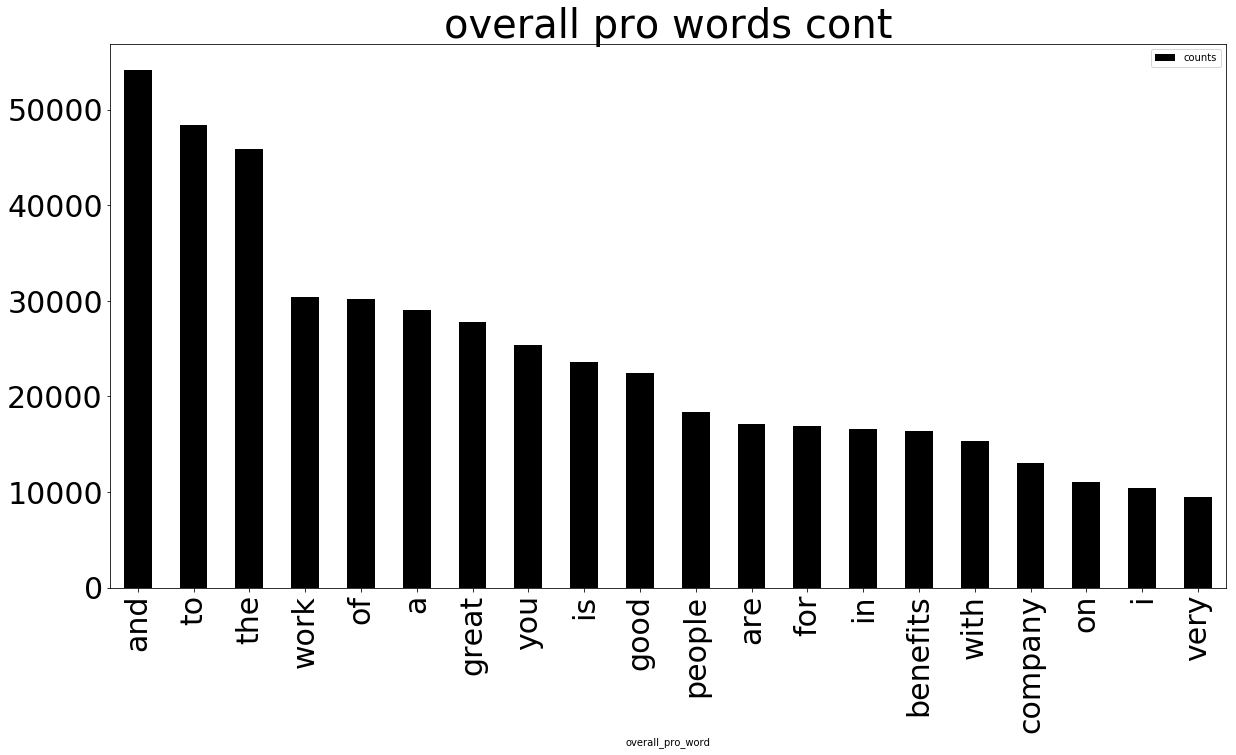

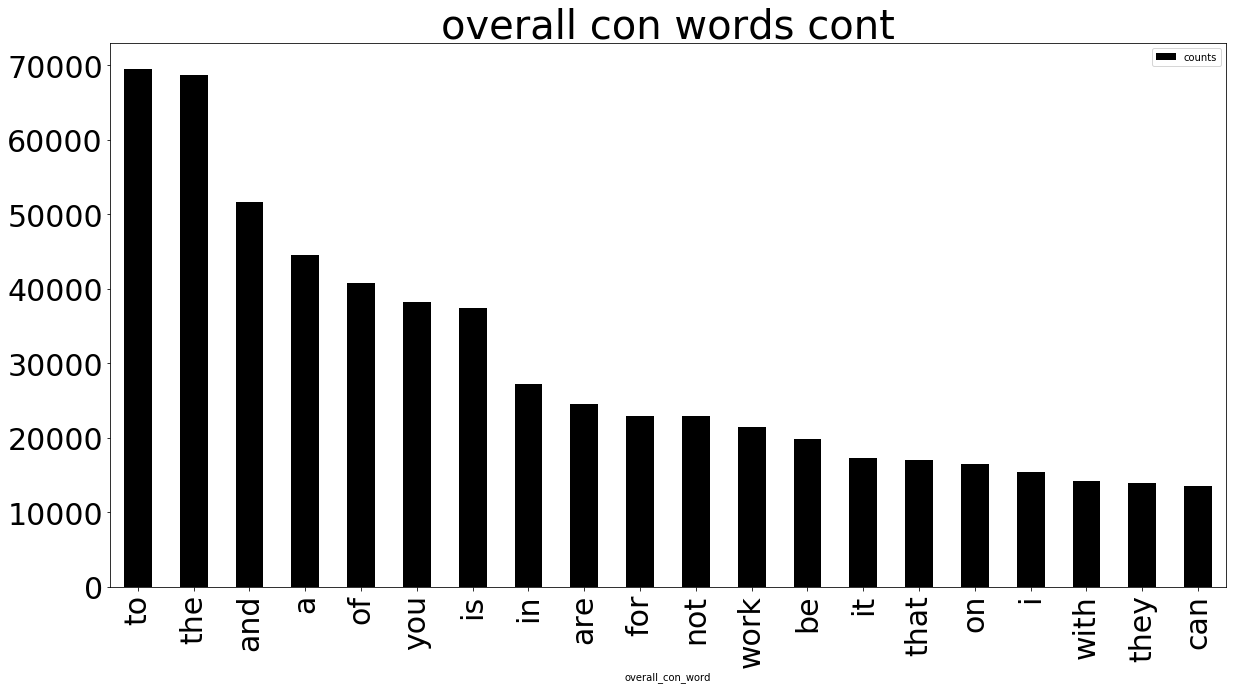

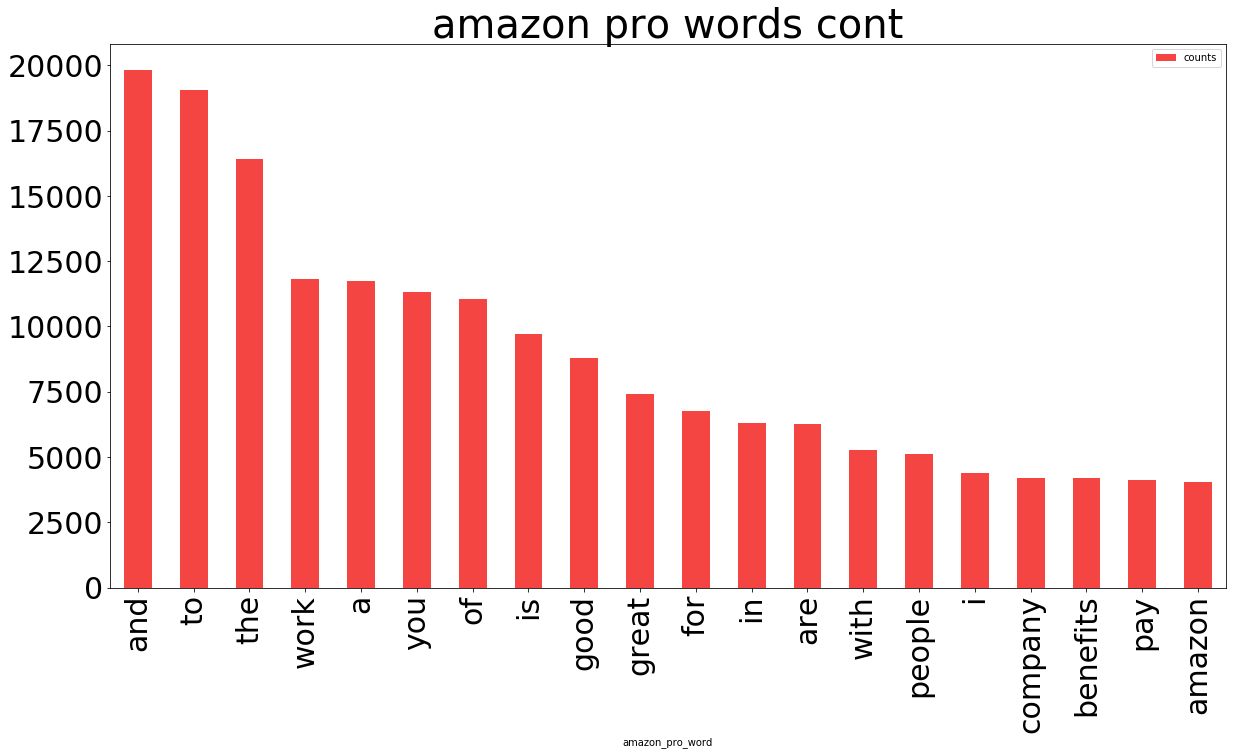

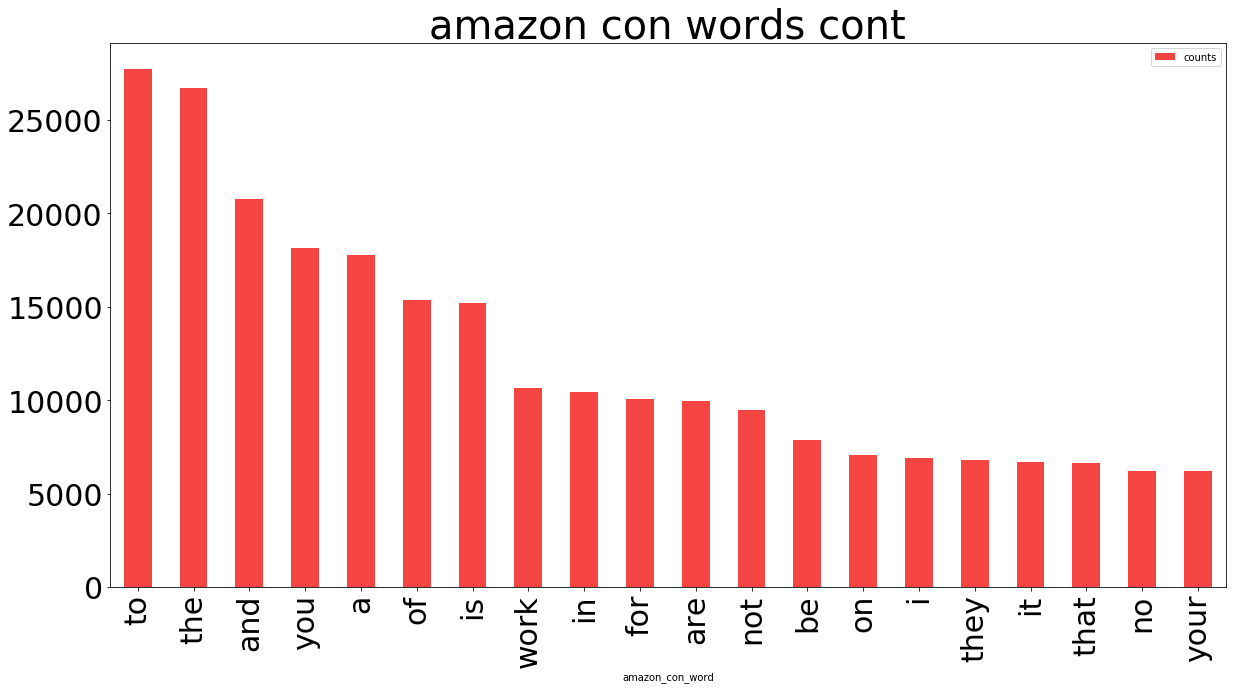

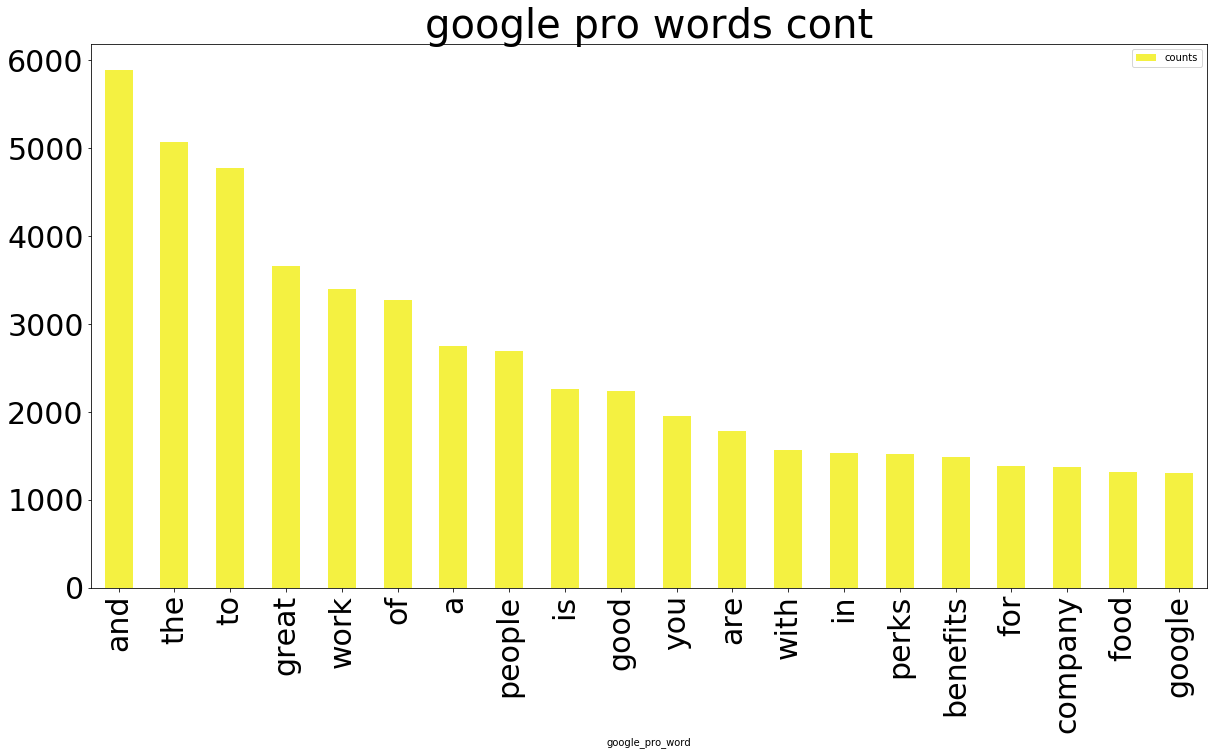

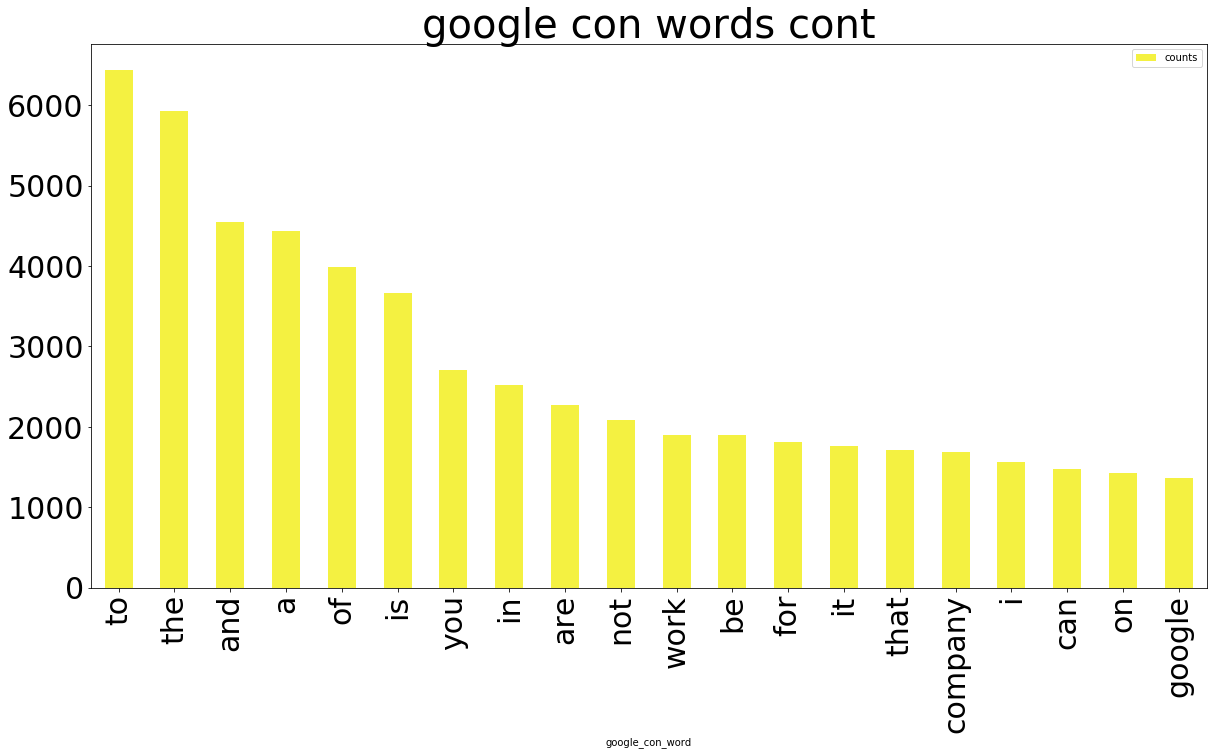

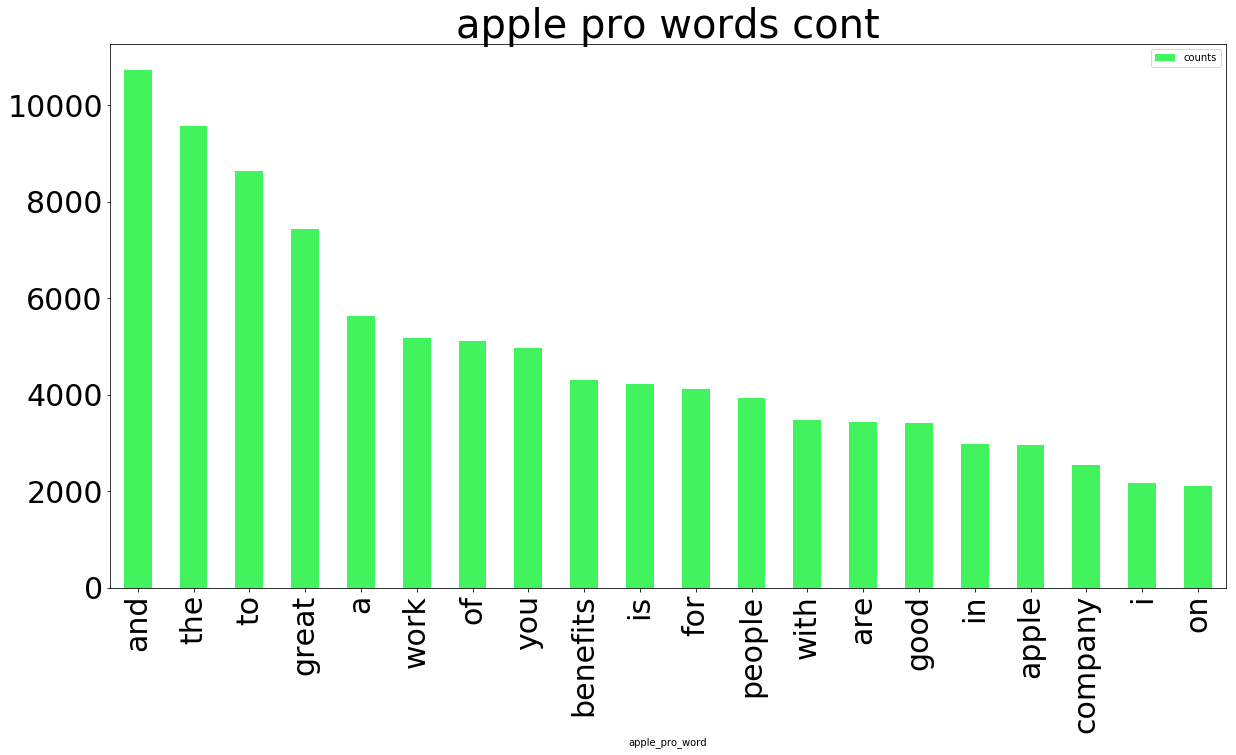

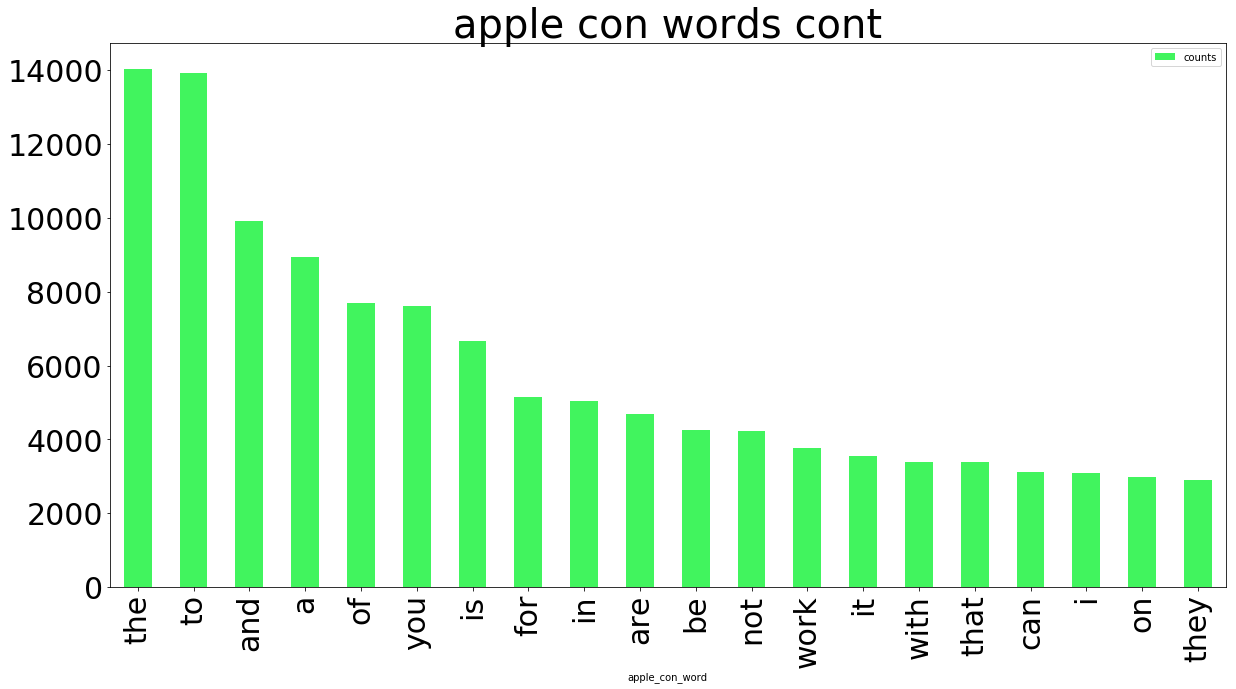

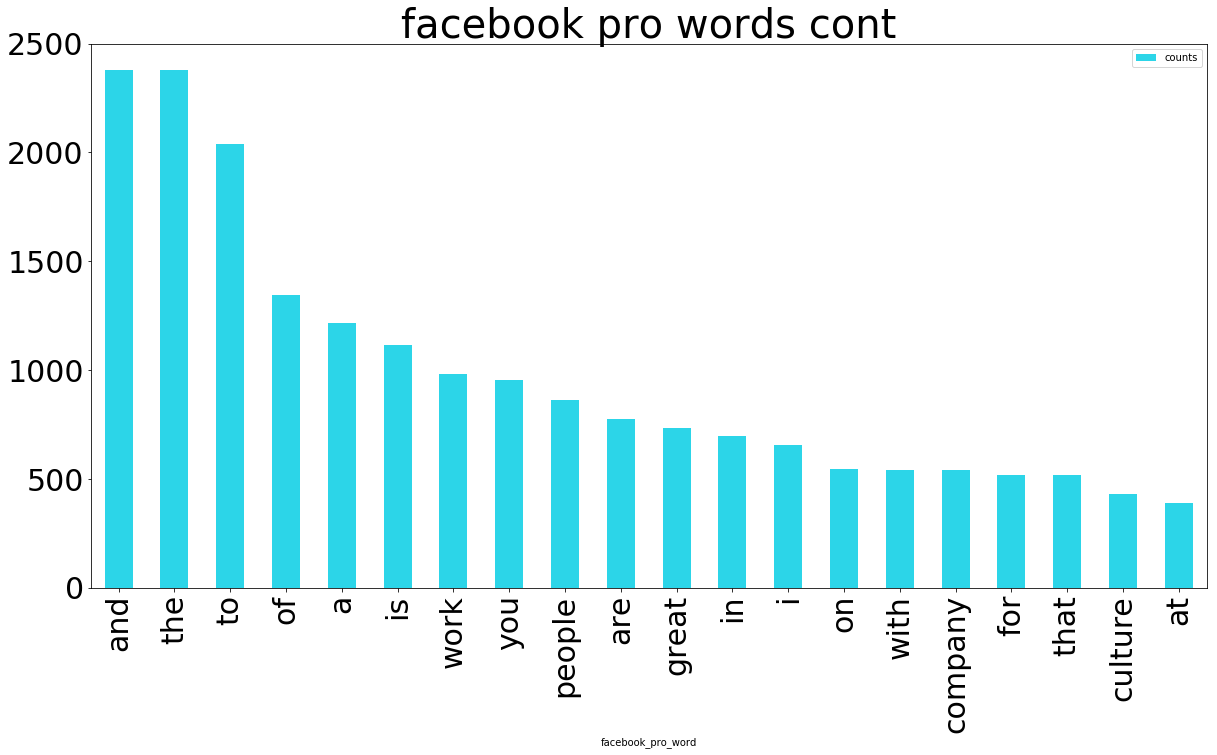

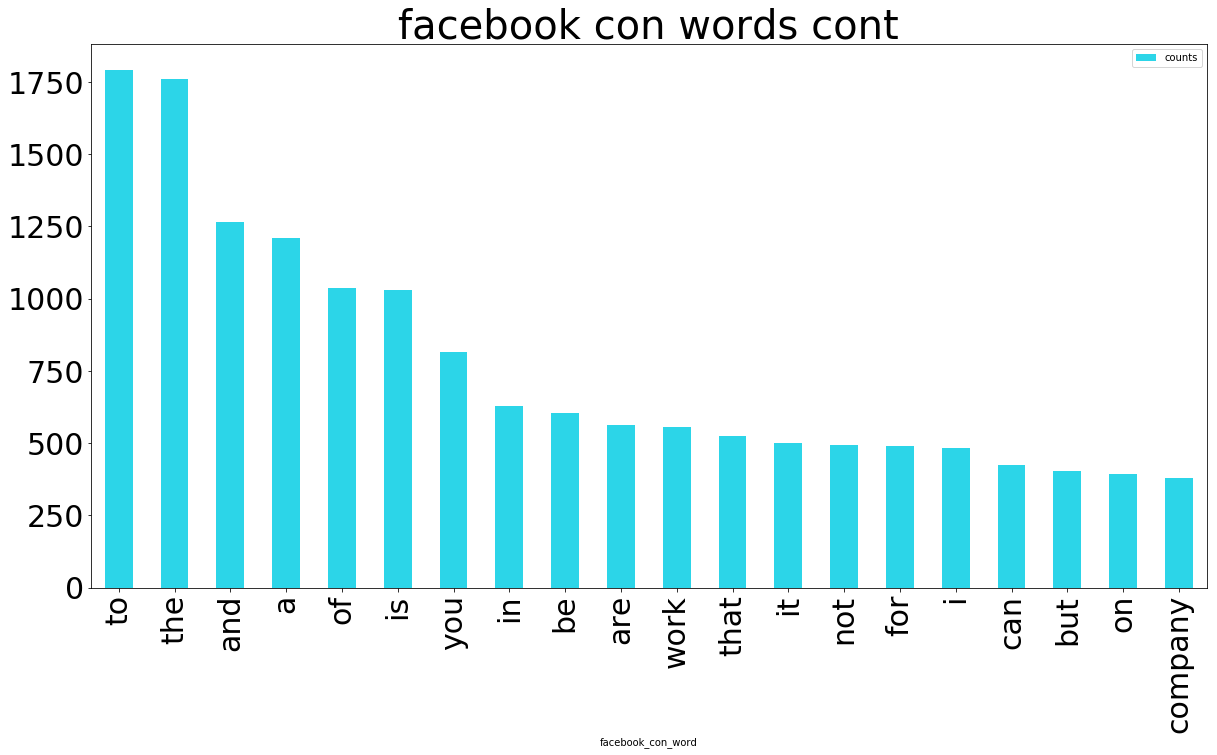

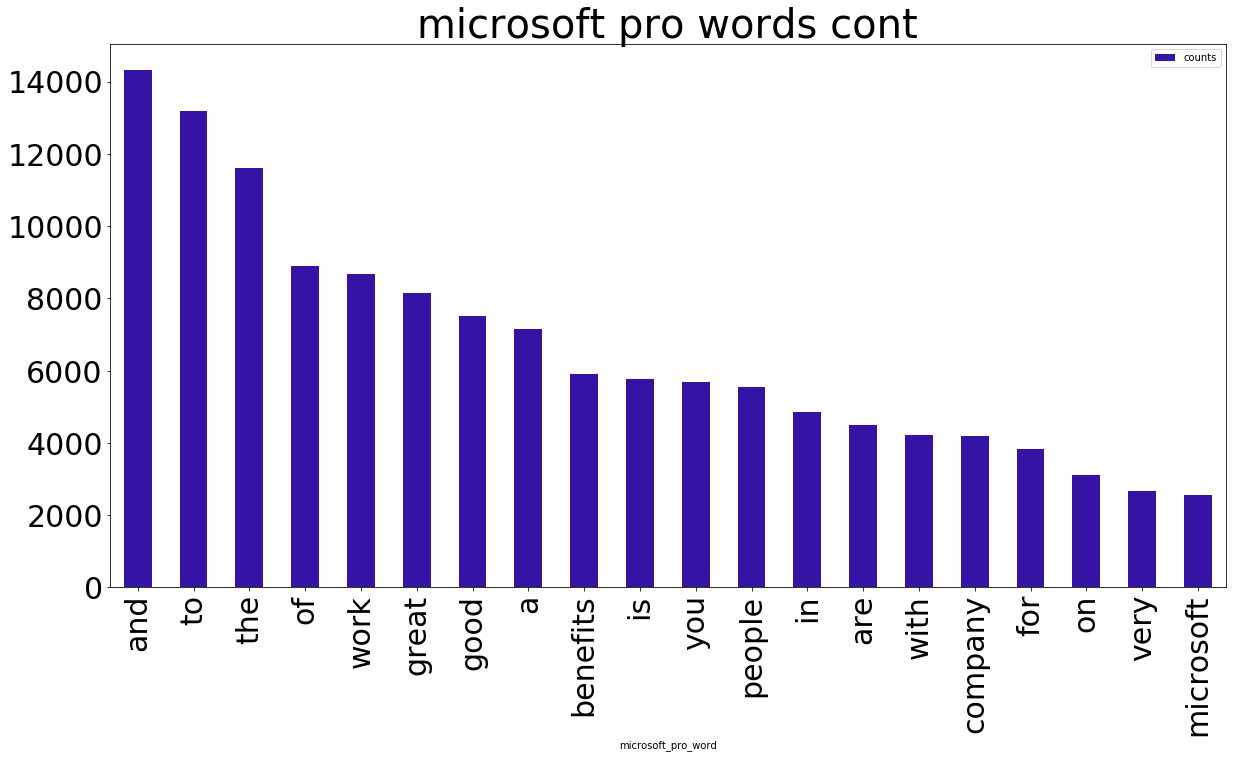

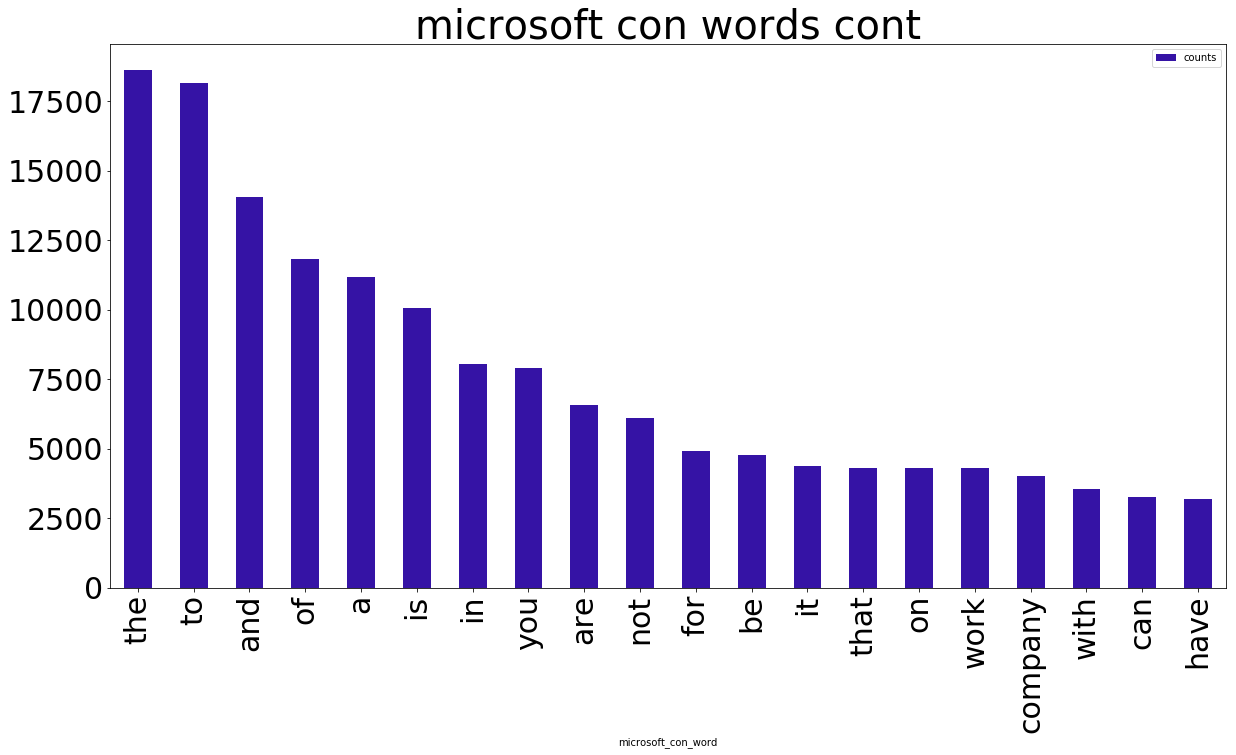

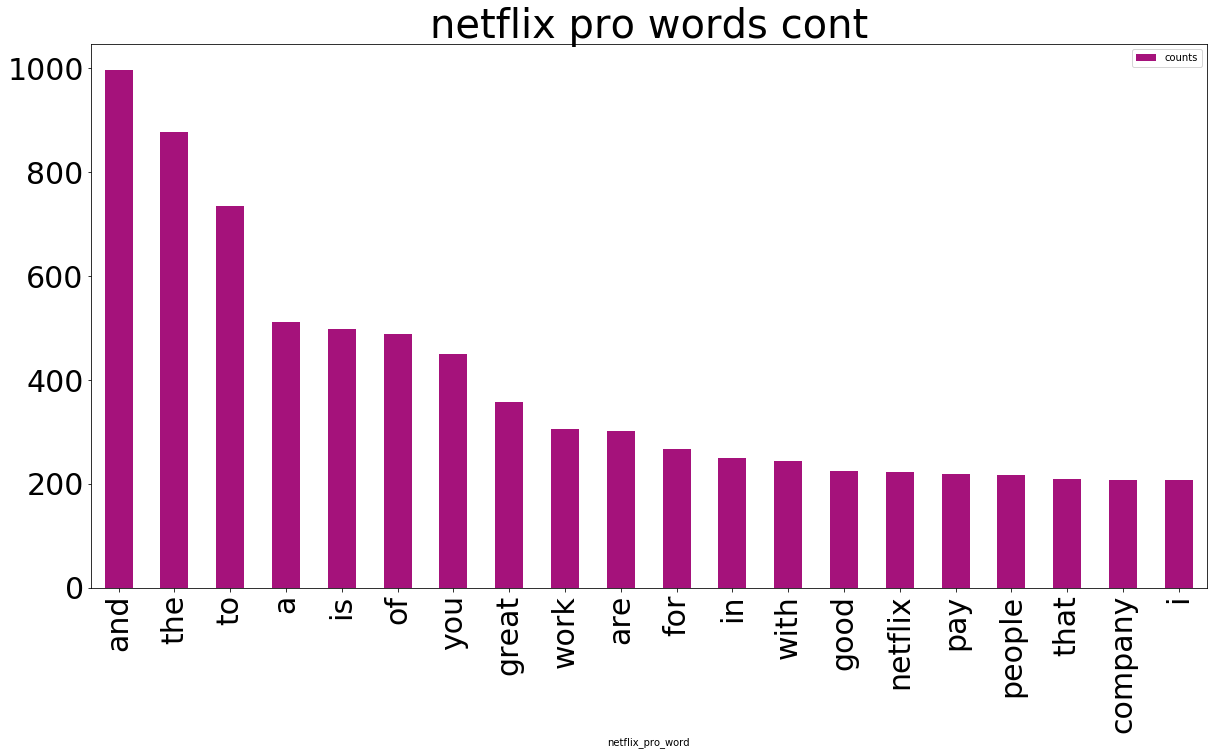

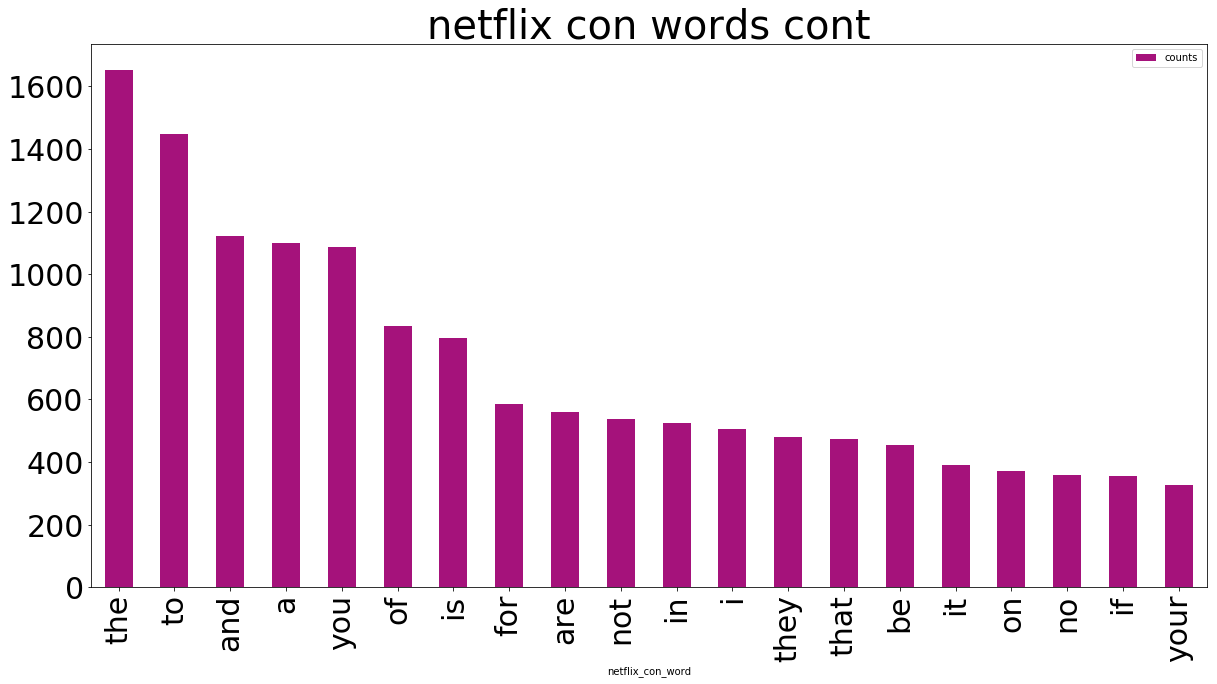

In [73]:
#build data fram to result of count all words
pro_word_count_table_dic = {}
con_word_count_table_dic = {}

for name in company_name_tuple:
    pro_word_count_table_dic[name] = pd.DataFrame.from_dict({(name+'_pro_word'):list(pro_word_count_dic_of_dic[name].keys()) , 'counts': list(pro_word_count_dic_of_dic[name].values())})
    con_word_count_table_dic[name] = pd.DataFrame.from_dict({(name+'_con_word'):list(con_word_count_dic_of_dic[name].keys()) , 'counts': list(con_word_count_dic_of_dic[name].values())})
    pro_word_count_table_dic[name] = pro_word_count_table_dic[name].sort_values(by='counts', ascending=False)
    con_word_count_table_dic[name] = con_word_count_table_dic[name].sort_values(by='counts', ascending=False)
    
    pro_word_count_table_dic[name].iloc[0:20].plot(kind = 'bar',x=name+'_pro_word', y='counts',title=name + " pro words cont",figsize=(20,10),fontsize=30, color = company_color_dic[name]).title.set_size(40)
    con_word_count_table_dic[name].iloc[0:20].plot(kind = 'bar',x=name+'_con_word', y='counts',title=name + " con words cont",figsize=(20,10),fontsize=30, color = company_color_dic[name]).title.set_size(40)
    
       
#pro_word_count_table_dic[company_name_tuple[0]].iloc[0:20].plot(kind = 'bar',x=company_name_tuple[0]+'_pro_word', y='counts',title=None,figsize=(20,10),fontsize=20)




In [35]:
#start to count non stop words
pro_word_remove_stopword_count_dic_of_dic = {}
con_word_remove_stopword_count_dic_of_dic = {}

for name in company_name_tuple:
    pro_word_remove_stopword_count_dic_of_dic[name] = parse_data_as_words_remove_stopWord_count(pro_str_list_dic[name])
    con_word_remove_stopword_count_dic_of_dic[name] = parse_data_as_words_remove_stopWord_count(con_str_list_dic[name])


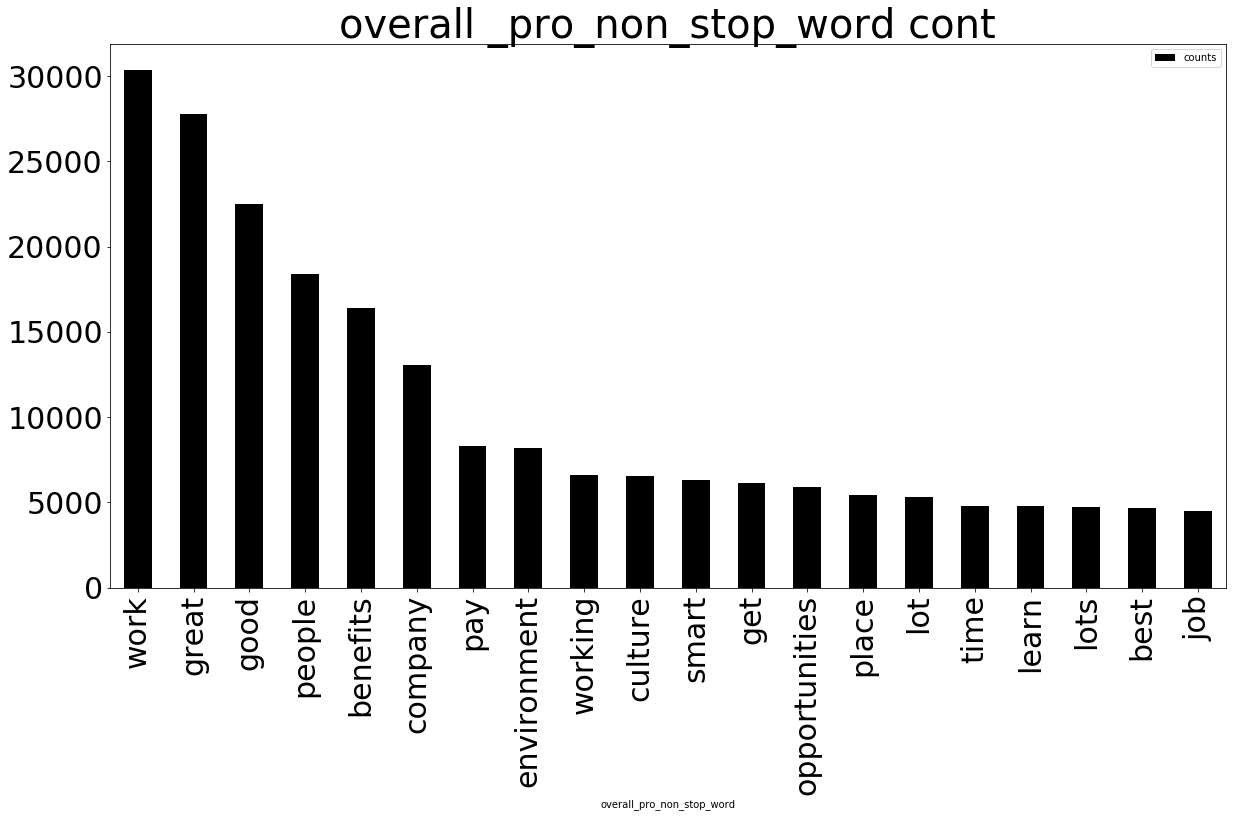

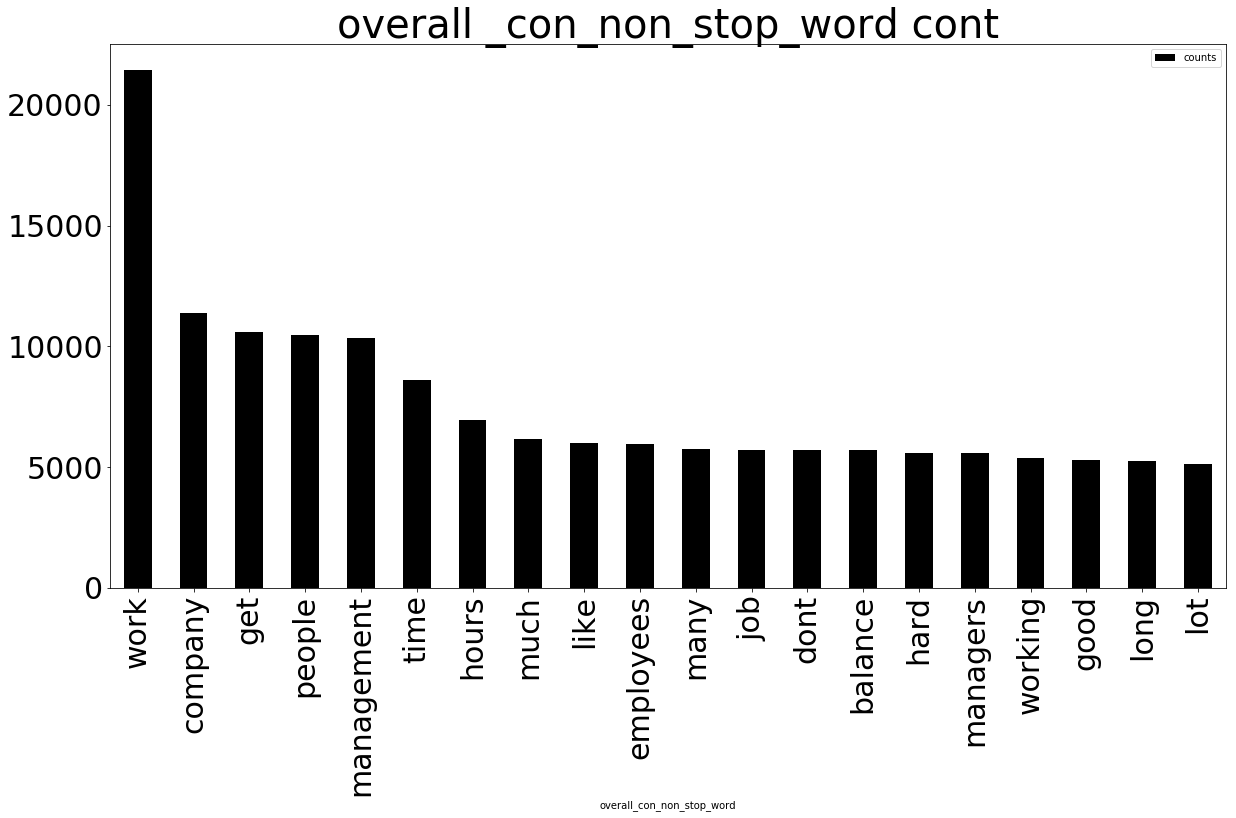

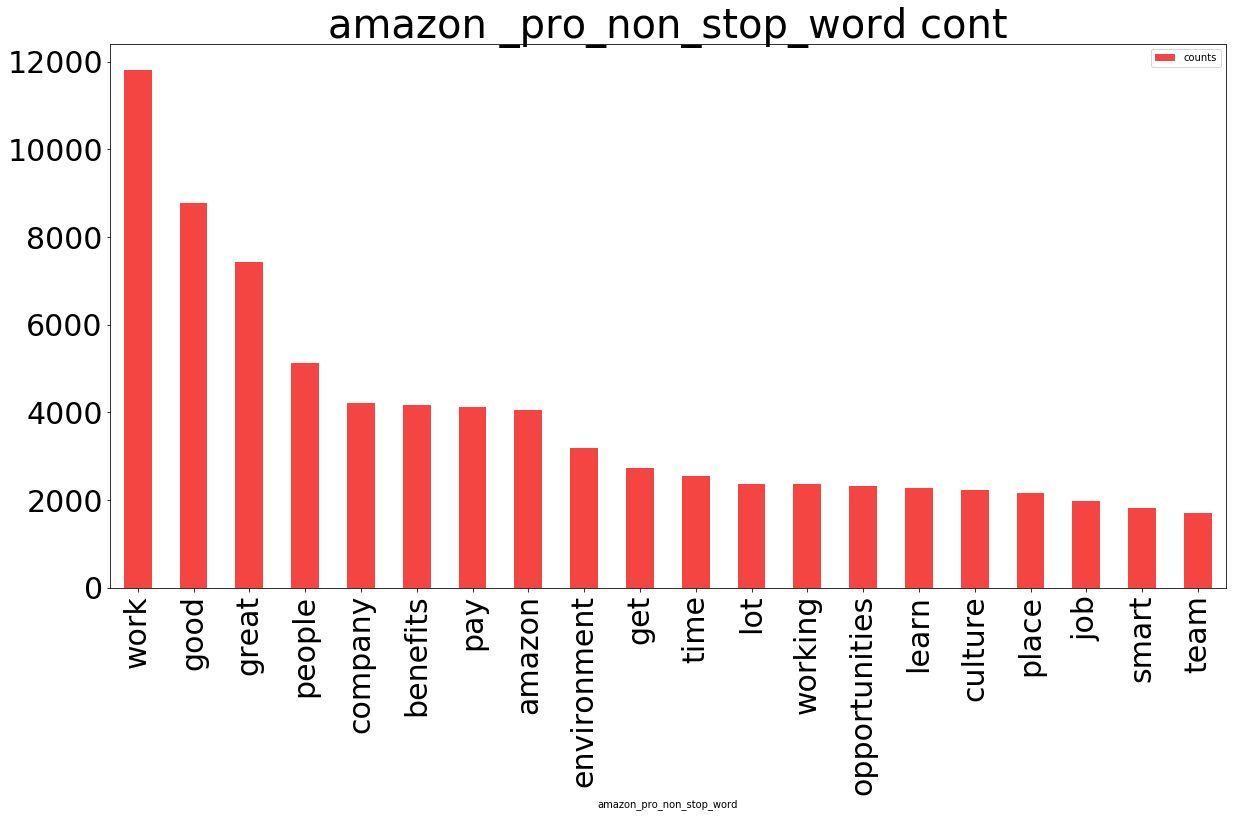

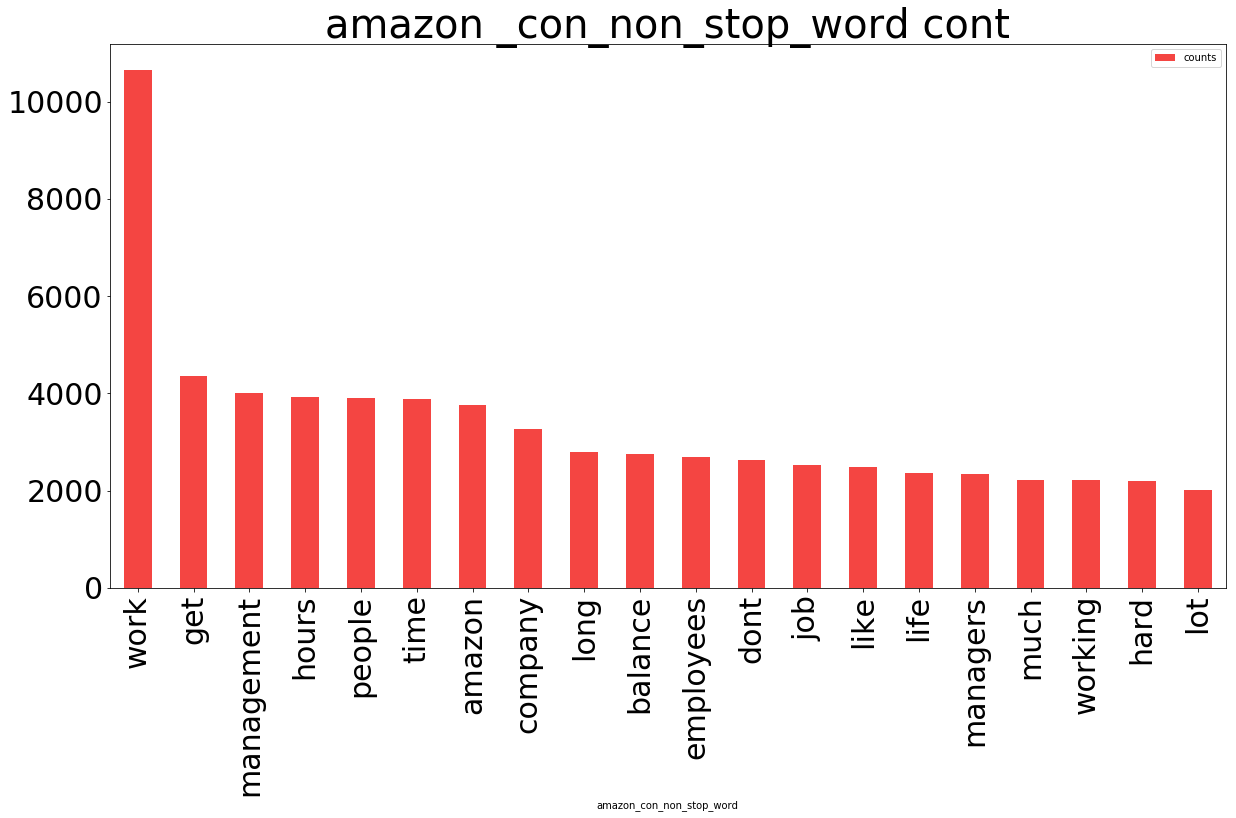

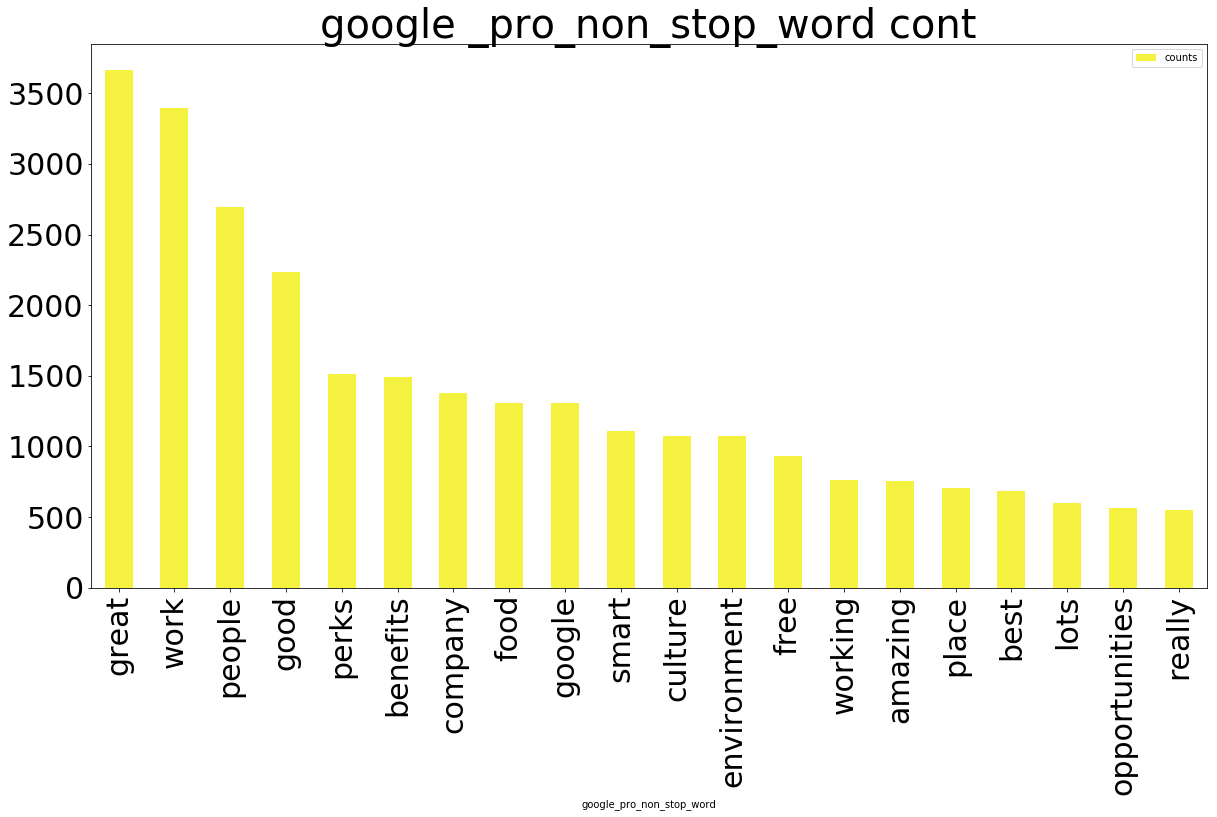

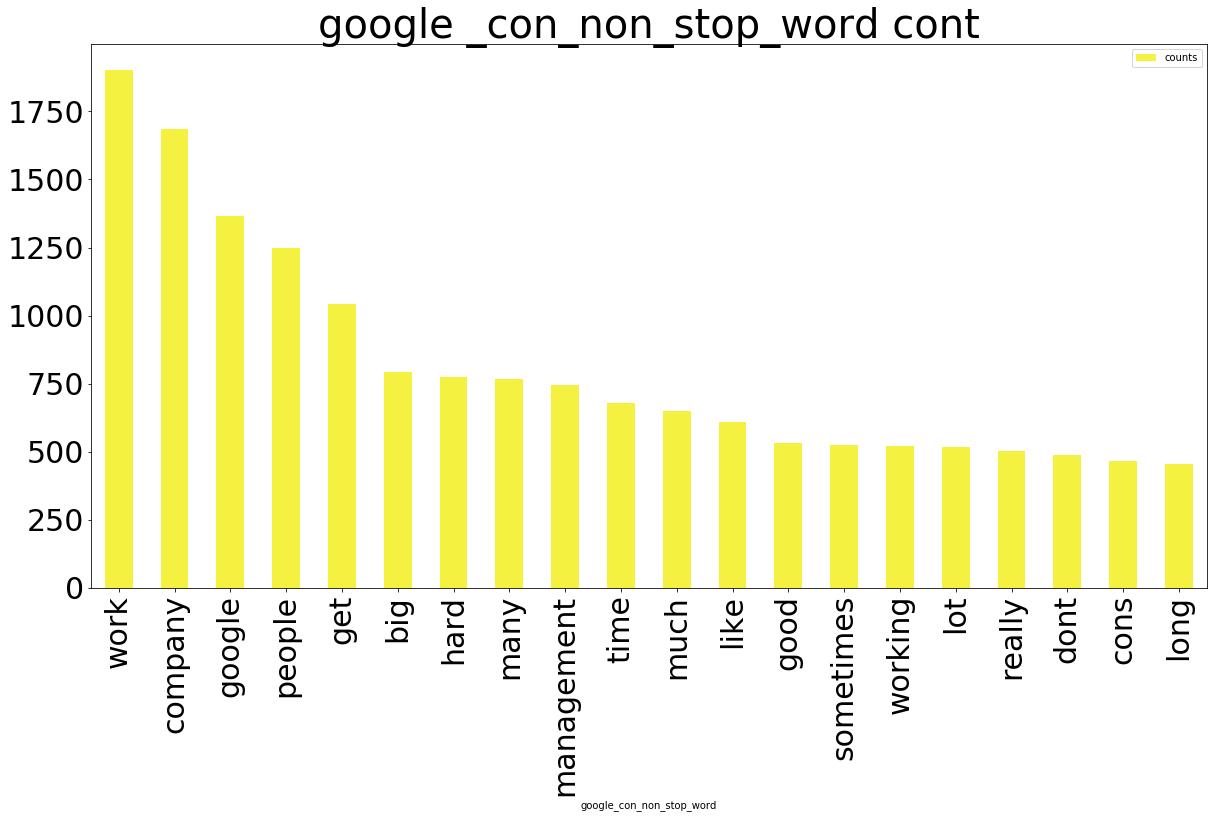

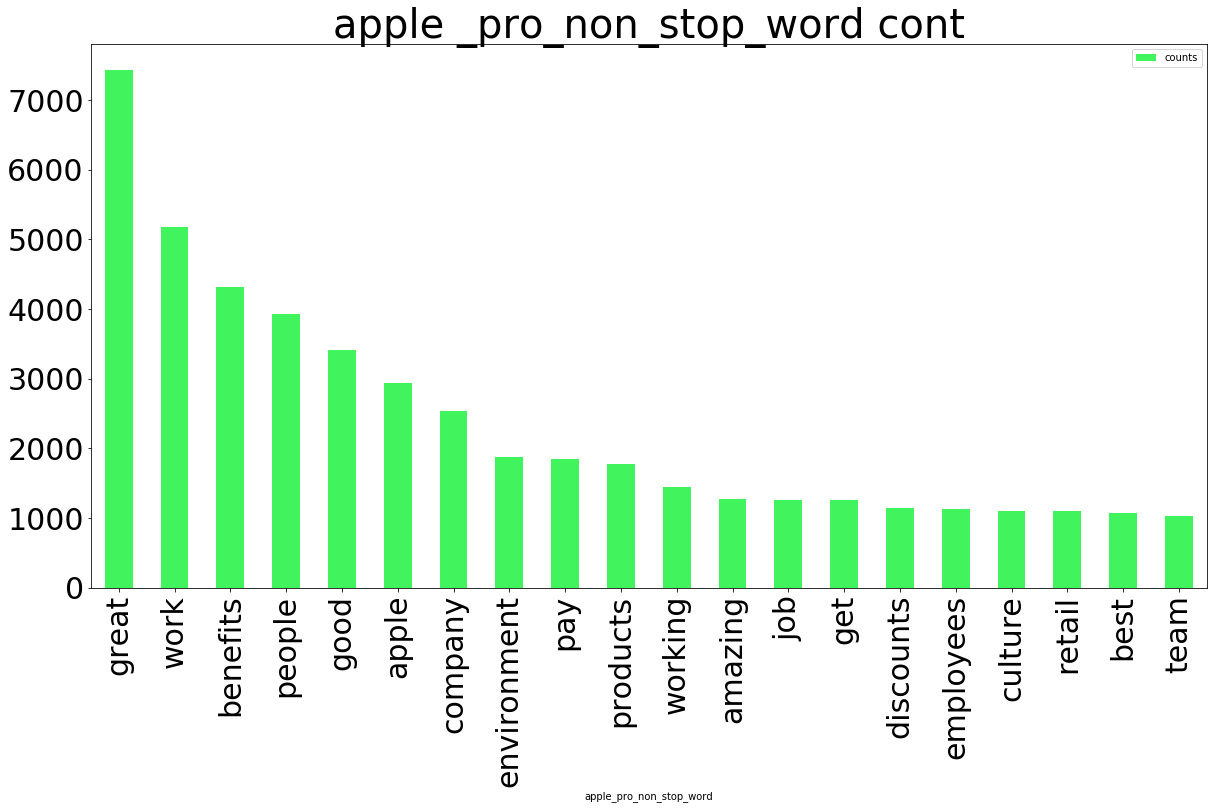

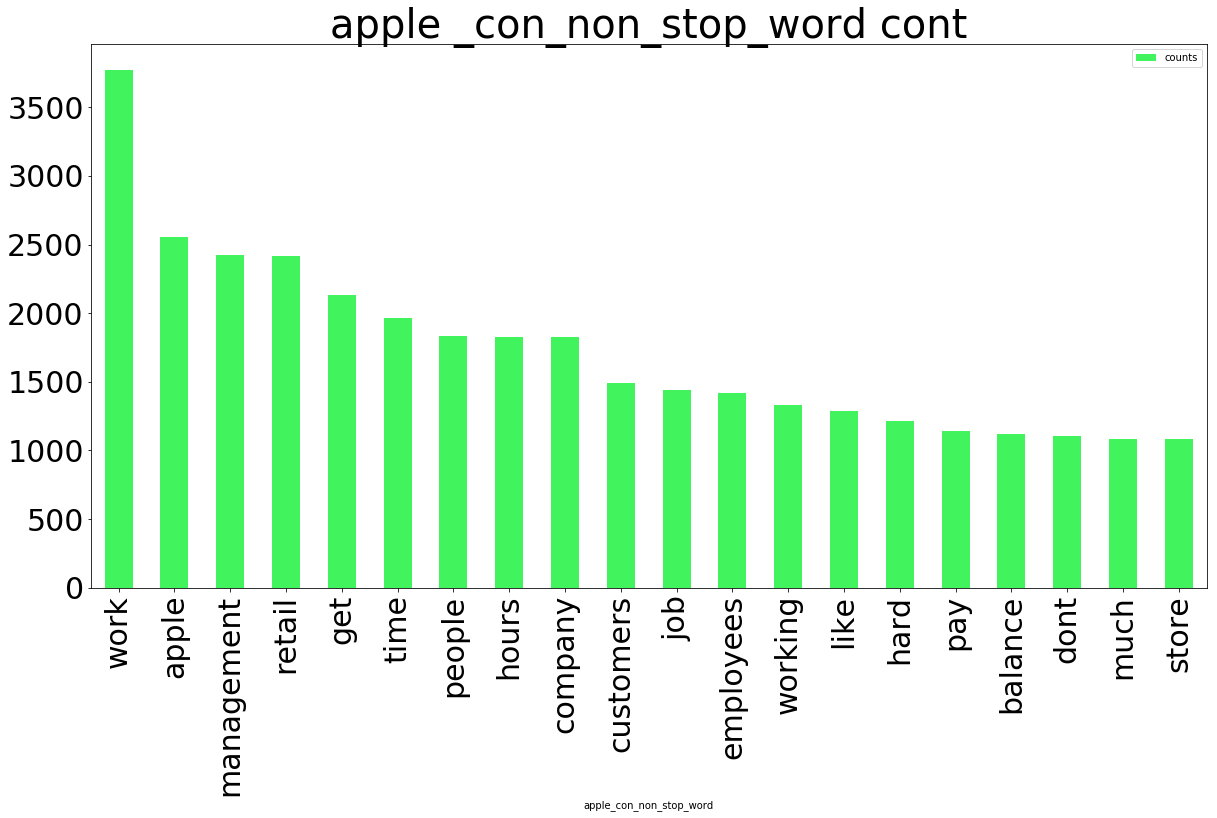

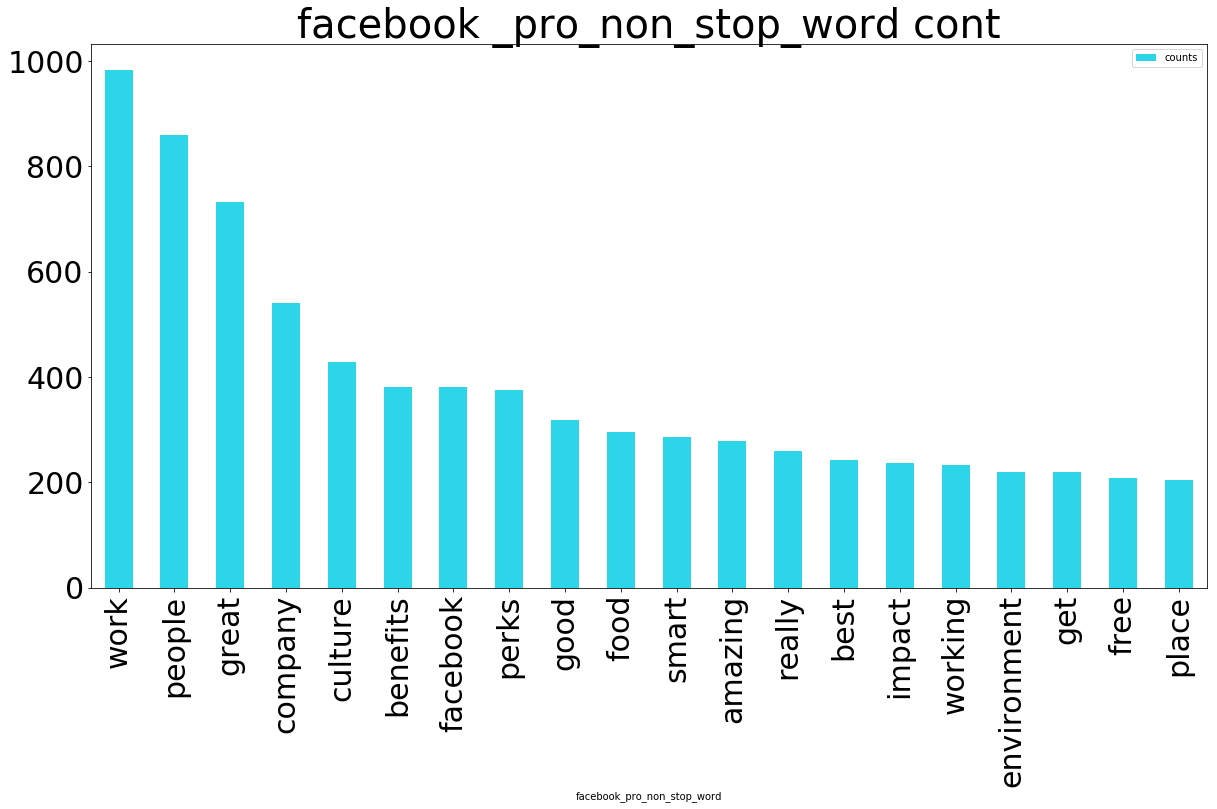

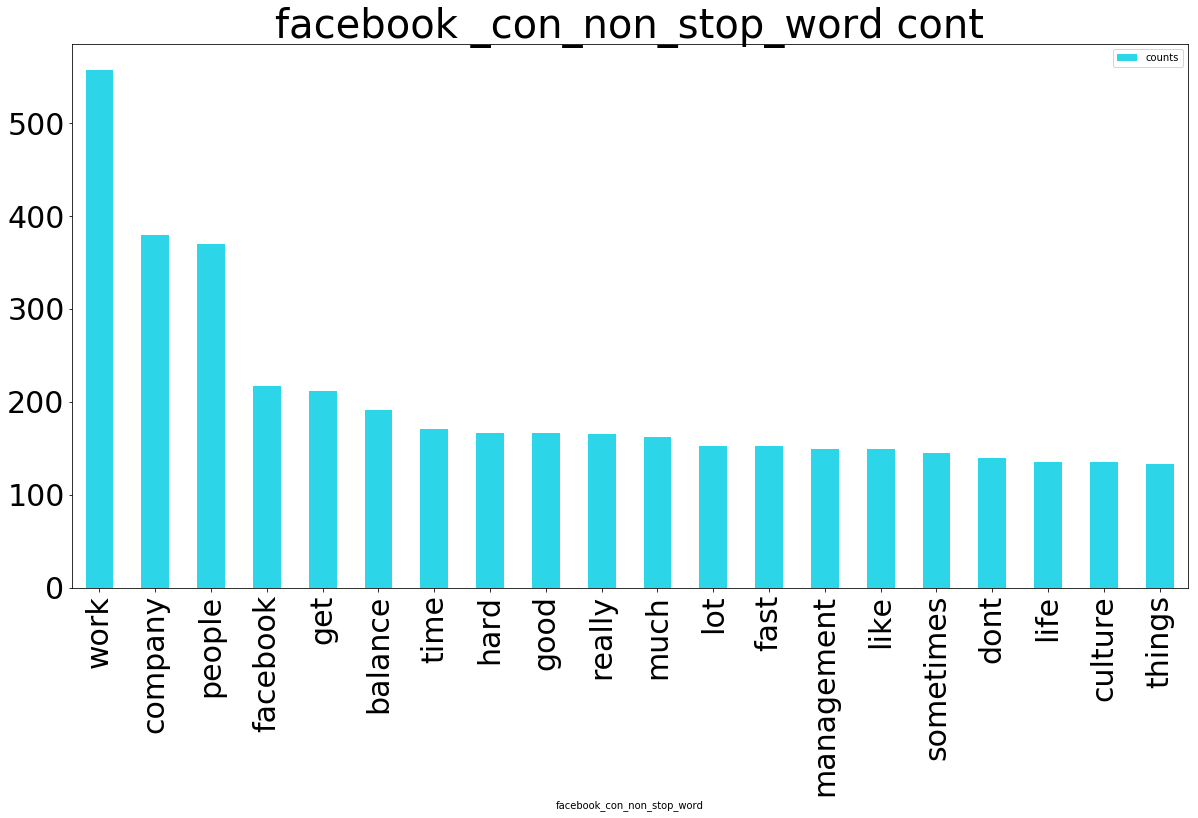

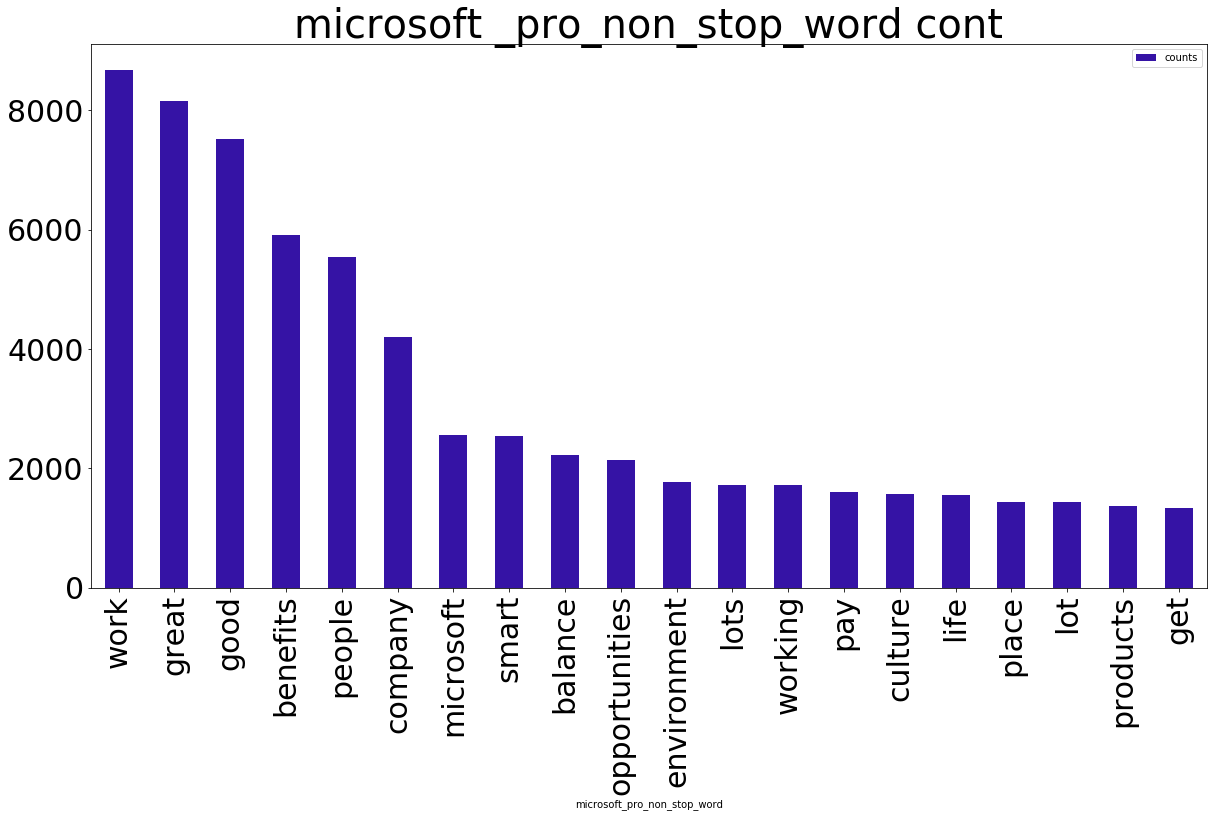

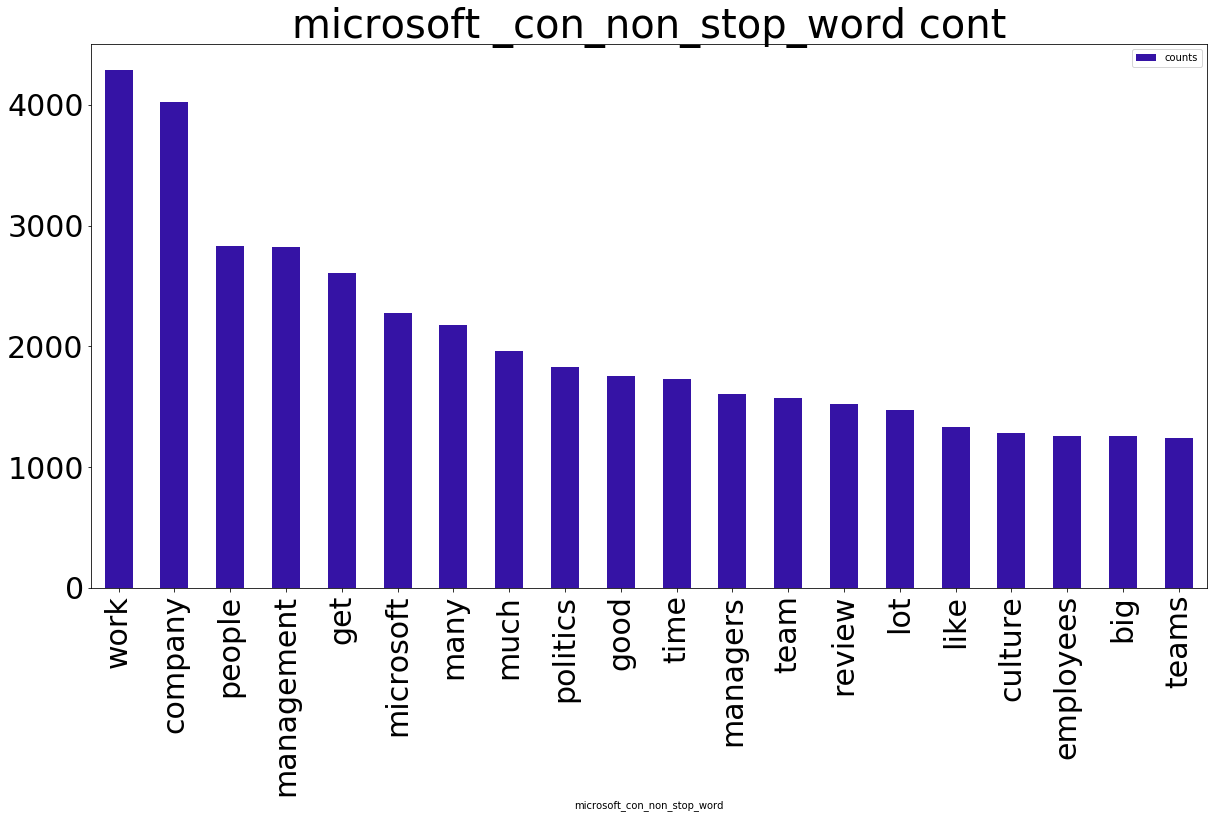

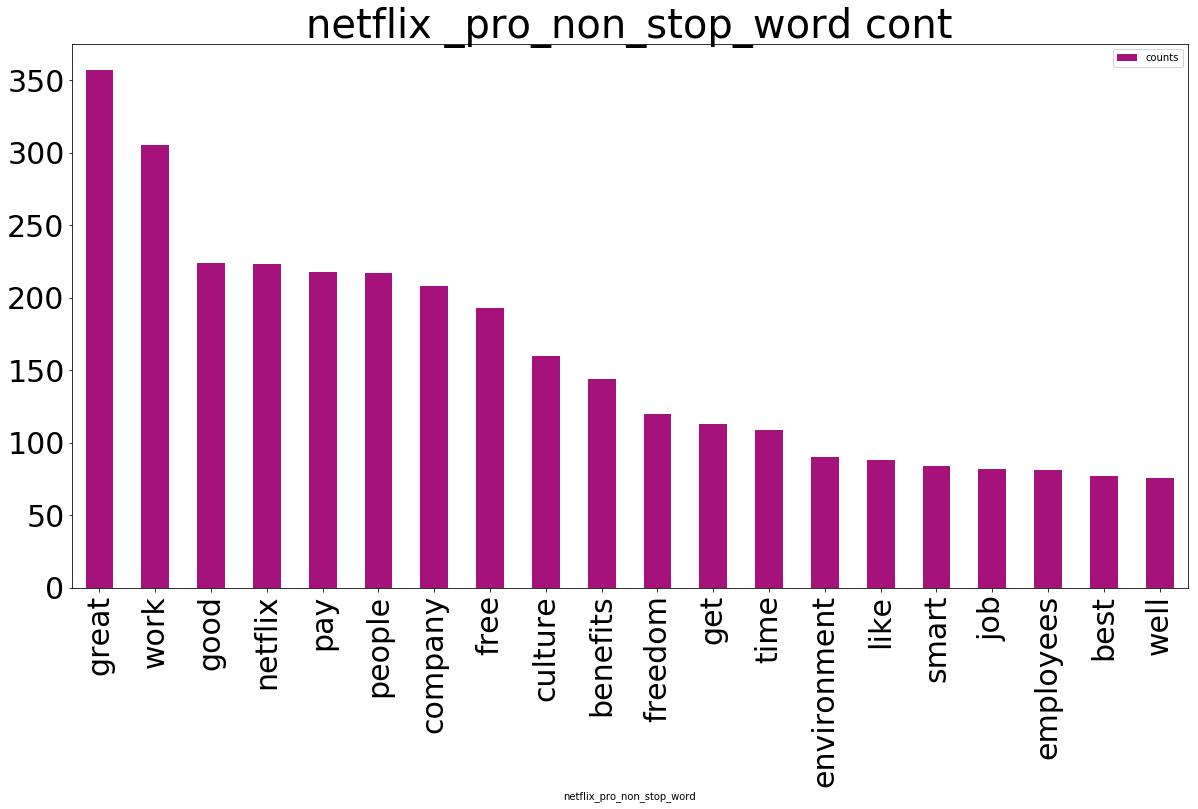

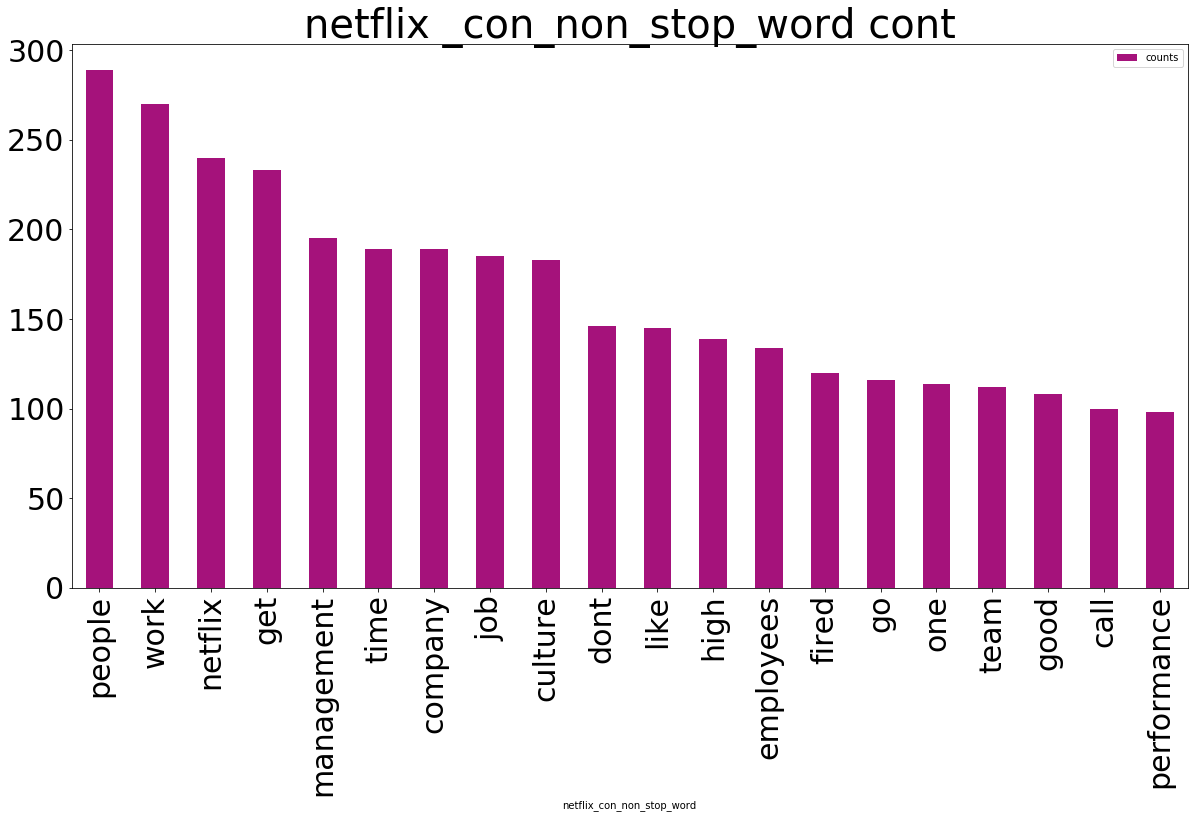

In [74]:
#build data fram to result of count non stop words
pro_non_stop_word_count_table_dic = {}
con_non_stop_word_count_table_dic = {}

for name in company_name_tuple:
    pro_non_stop_word_count_table_dic[name] = pd.DataFrame.from_dict({(name+'_pro_non_stop_word'):list(pro_word_remove_stopword_count_dic_of_dic[name].keys()) , 'counts': list(pro_word_remove_stopword_count_dic_of_dic[name].values())})
    con_non_stop_word_count_table_dic[name] = pd.DataFrame.from_dict({(name+'_con_non_stop_word'):list(con_word_remove_stopword_count_dic_of_dic[name].keys()) , 'counts': list(con_word_remove_stopword_count_dic_of_dic[name].values())})
    pro_non_stop_word_count_table_dic[name] = pro_non_stop_word_count_table_dic[name].sort_values(by='counts', ascending=False)
    con_non_stop_word_count_table_dic[name] = con_non_stop_word_count_table_dic[name].sort_values(by='counts', ascending=False)
    
    pro_non_stop_word_count_table_dic[name].iloc[0:20].plot(kind = 'bar',x=name+'_pro_non_stop_word', y='counts',title=name + " _pro_non_stop_word cont",figsize=(20,10),fontsize=30, color = company_color_dic[name]).title.set_size(40)
    con_non_stop_word_count_table_dic[name].iloc[0:20].plot(kind = 'bar',x=name+'_con_non_stop_word', y='counts',title=name + " _con_non_stop_word cont",figsize=(20,10),fontsize=30, color = company_color_dic[name]).title.set_size(40)
    

In [37]:
#start to count non stop root words
pro_rootword_remove_stopword_count_dic_of_dic = {}
con_rootword_remove_stopword_count_dic_of_dic = {}

for name in company_name_tuple:
    pro_rootword_remove_stopword_count_dic_of_dic[name] = parse_data_as_rootwords_remove_stopWord_count(pro_str_list_dic[name])
    con_rootword_remove_stopword_count_dic_of_dic[name] = parse_data_as_rootwords_remove_stopWord_count(con_str_list_dic[name])


overall
pro words: ['work', 'great', 'good', 'peopl', 'benefit', 'compani', 'lot', 'veri', 'opportun', 'pay']
con words: ['work', 'manag', 'get', 'compani', 'time', 'veri', 'peopl', 'hour', 'thi', 'employe']
amazon
pro words: ['work', 'good', 'great', 'peopl', 'compani', 'benefit', 'pay', 'amazon', 'lot', 'opportun']
con words: ['work', 'manag', 'get', 'time', 'hour', 'veri', 'amazon', 'peopl', 'compani', 'employe']
google
pro words: ['work', 'great', 'peopl', 'good', 'benefit', 'compani', 'perk', 'googl', 'food', 'veri']
con words: ['work', 'compani', 'manag', 'get', 'googl', 'peopl', 'veri', 'time', 'lot', 'big']
apple
pro words: ['great', 'work', 'benefit', 'peopl', 'good', 'appl', 'compani', 'product', 'pay', 'environ']
con words: ['work', 'manag', 'appl', 'time', 'get', 'retail', 'veri', 'custom', 'compani', 'hour']
facebook
pro words: ['work', 'peopl', 'great', 'compani', 'cultur', 'facebook', 'benefit', 'perk', 'veri', 'lot']
con words: ['work', 'compani', 'peopl', 'manag', 'get

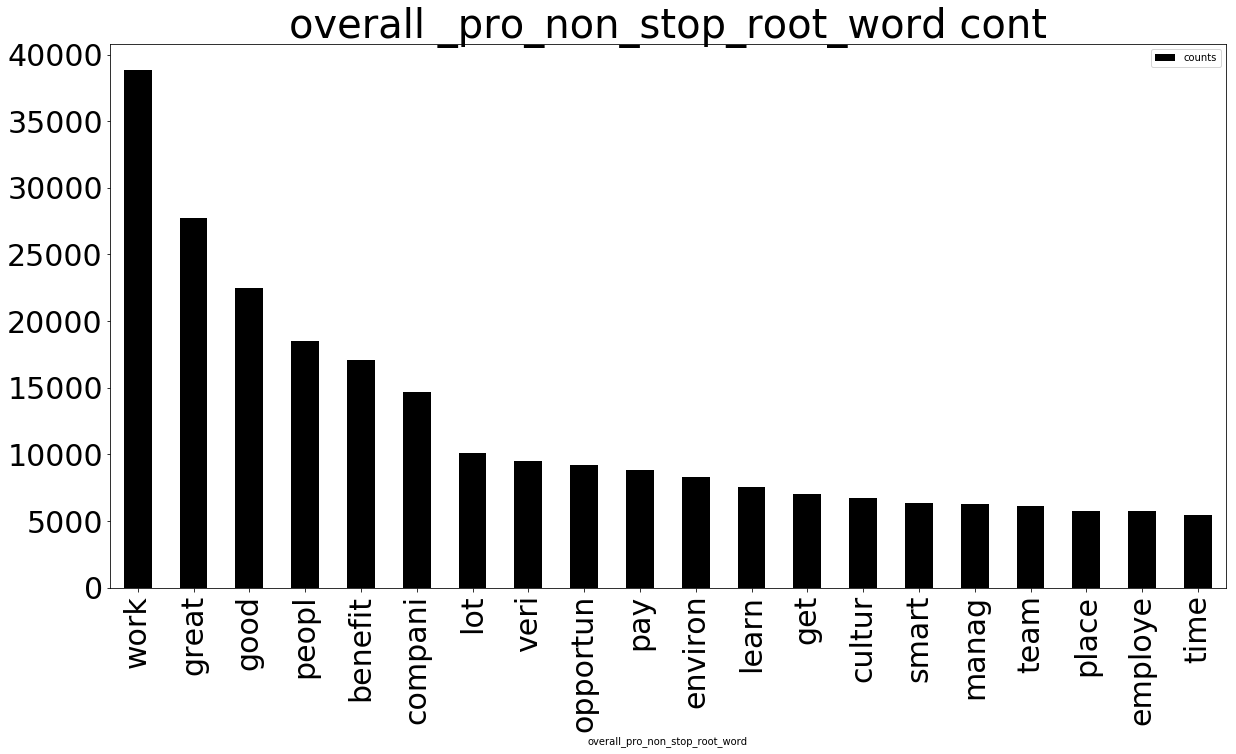

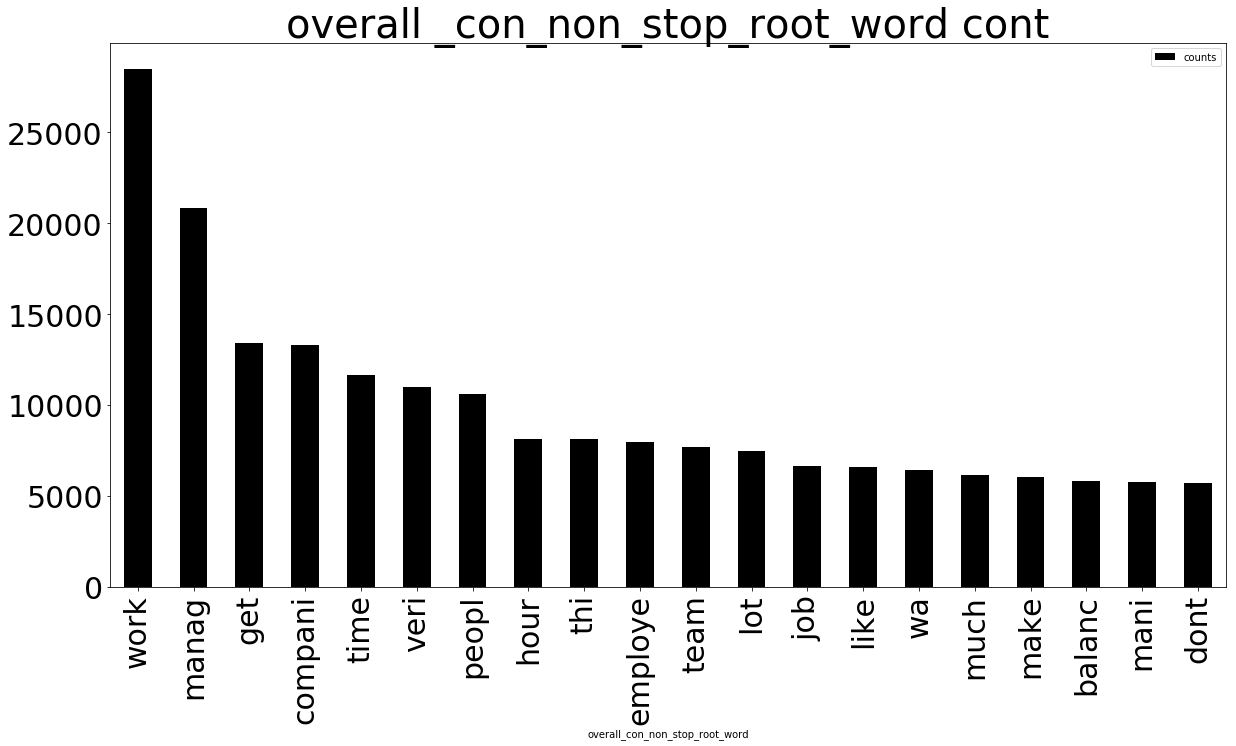

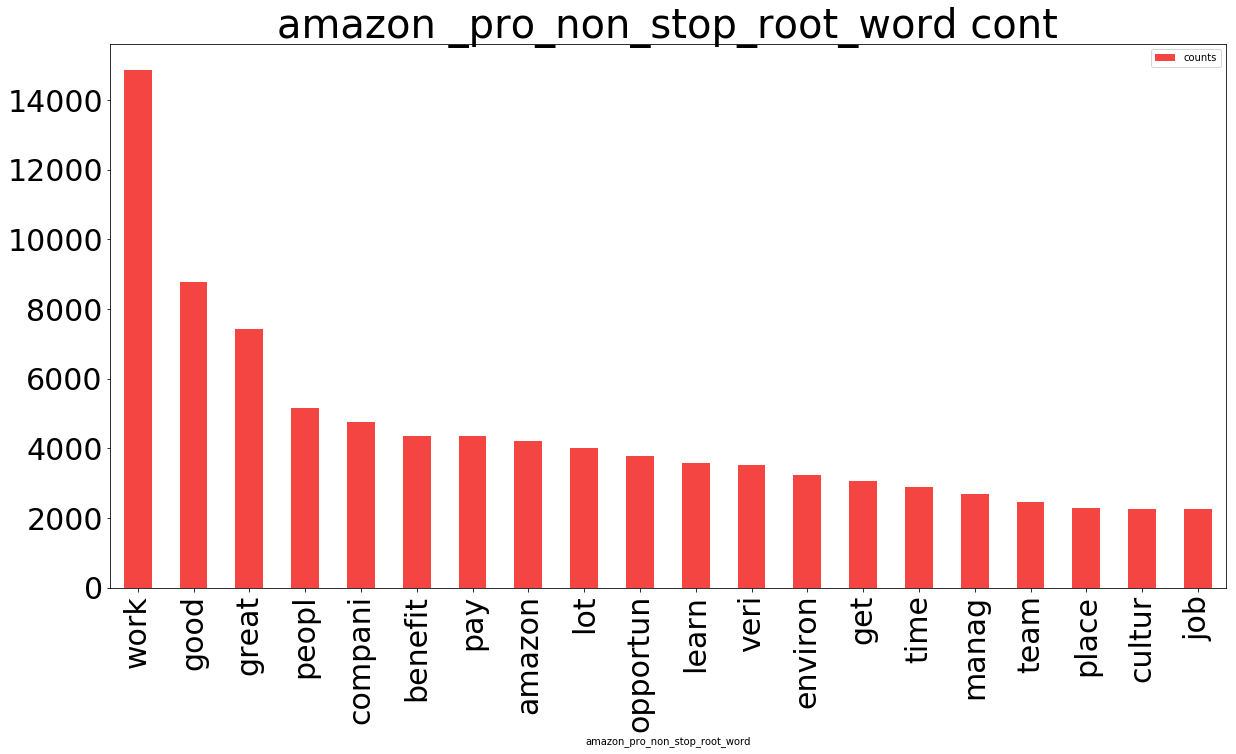

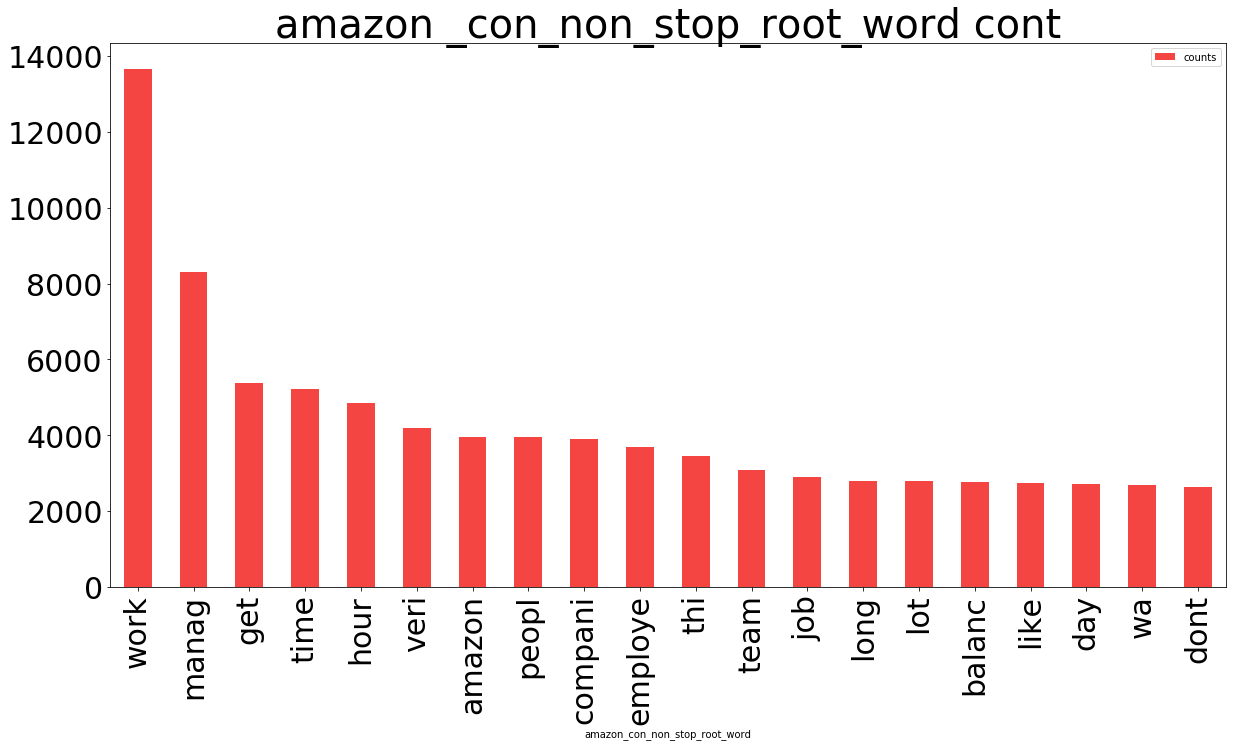

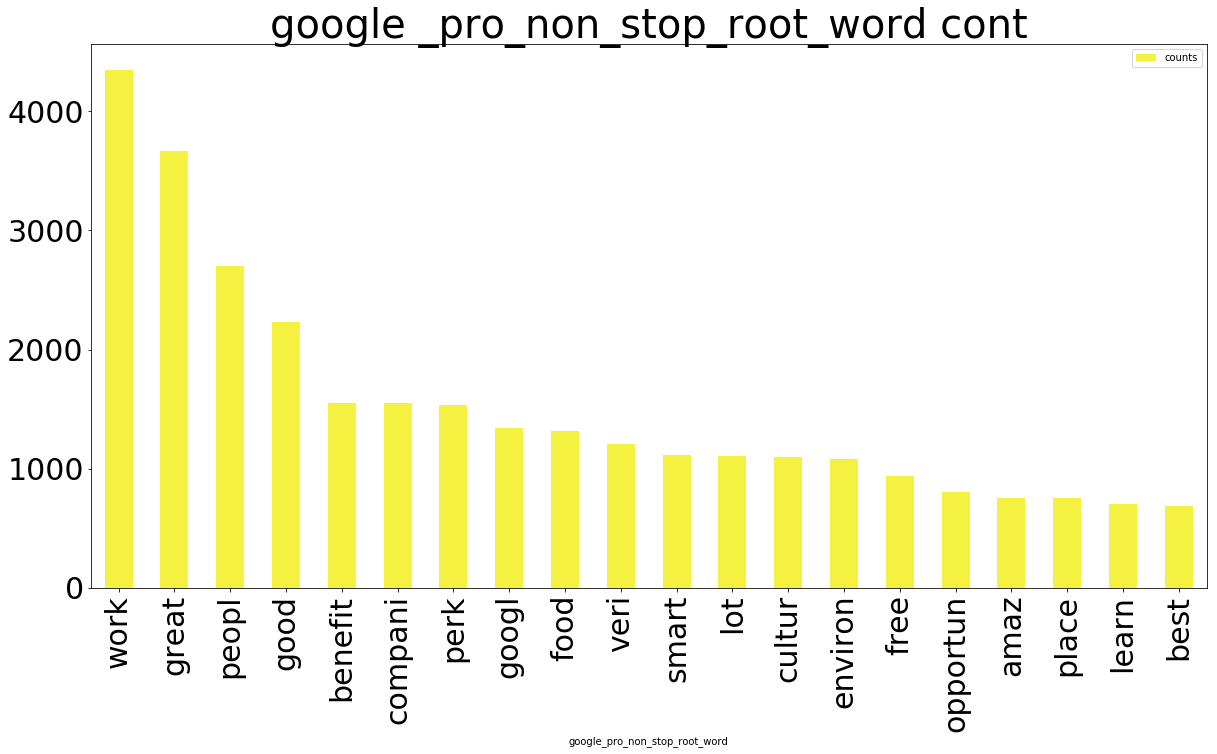

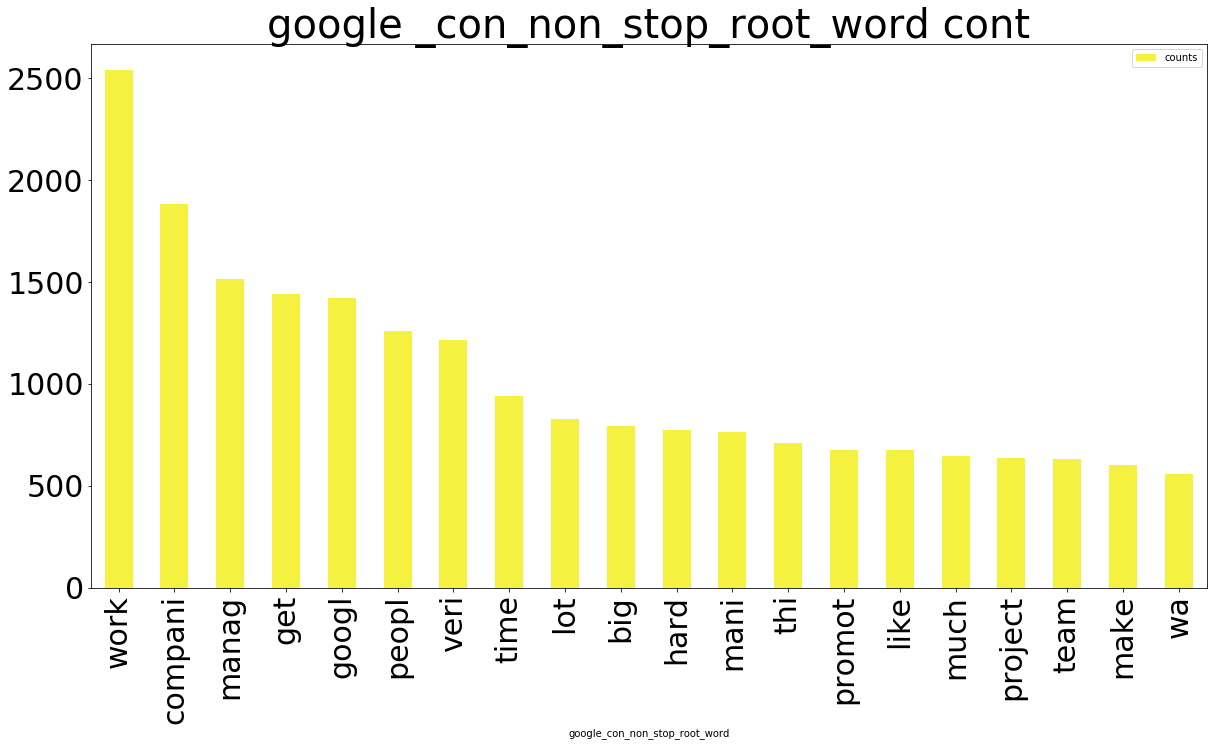

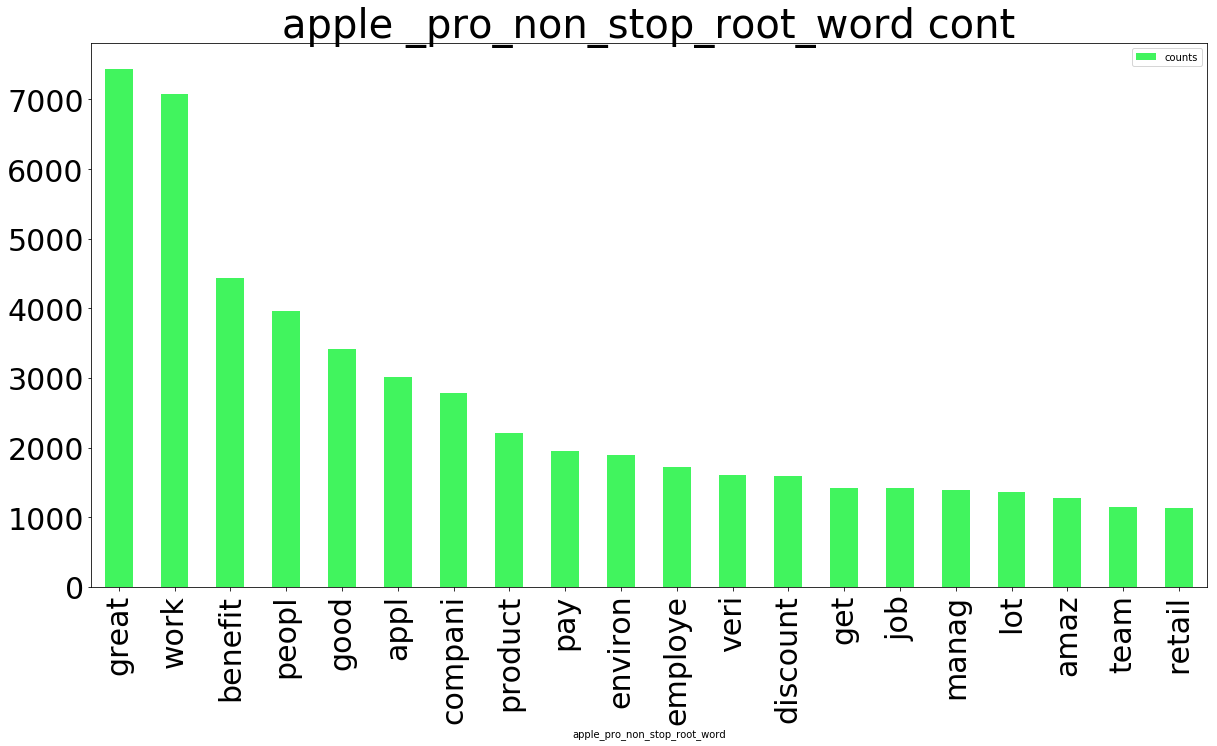

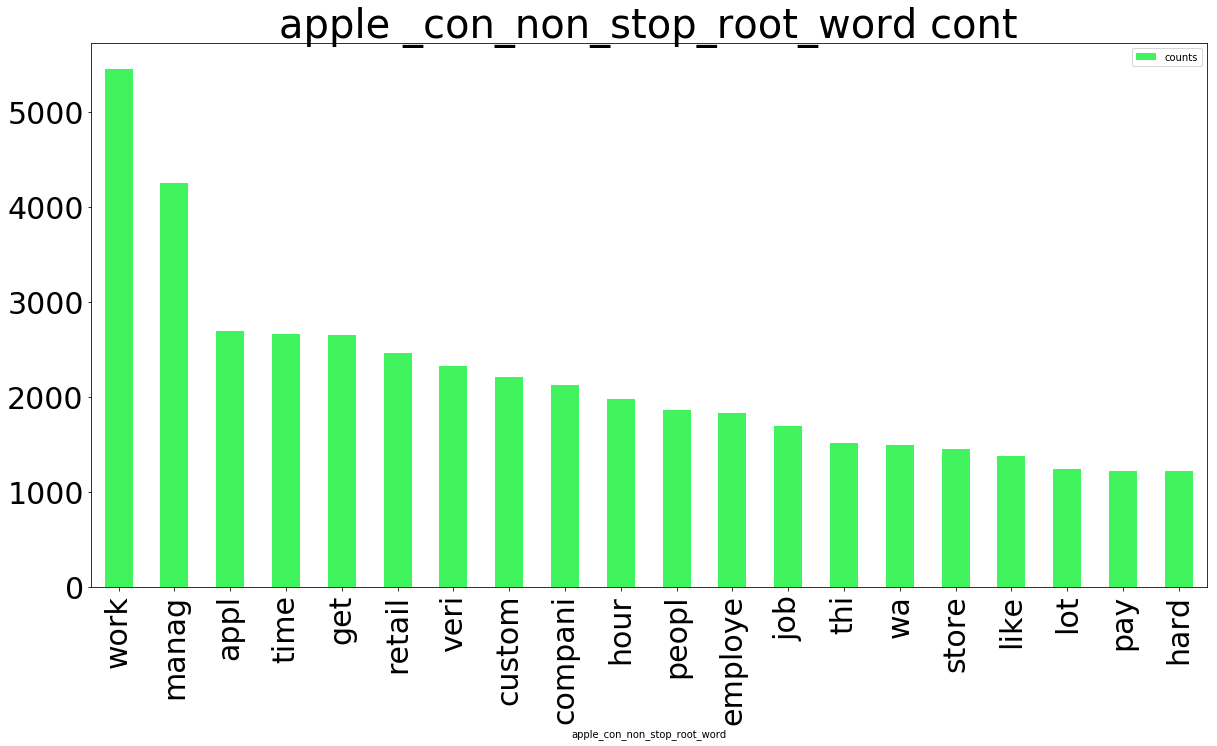

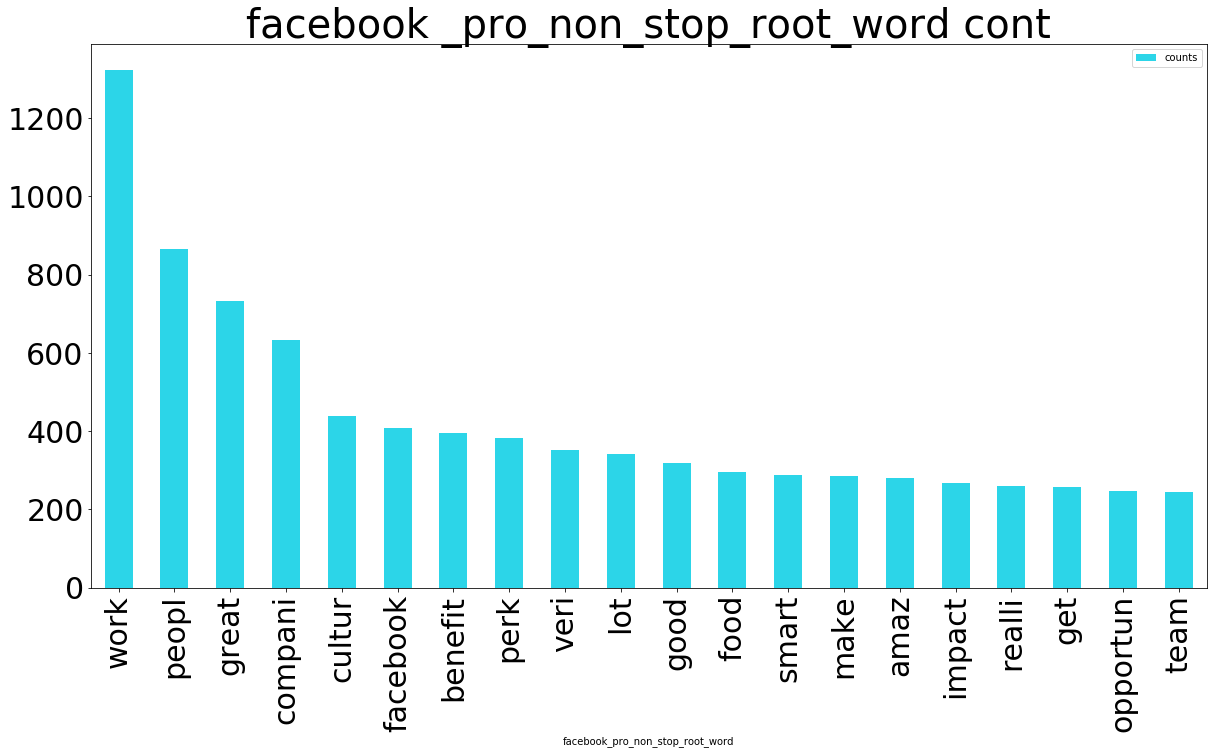

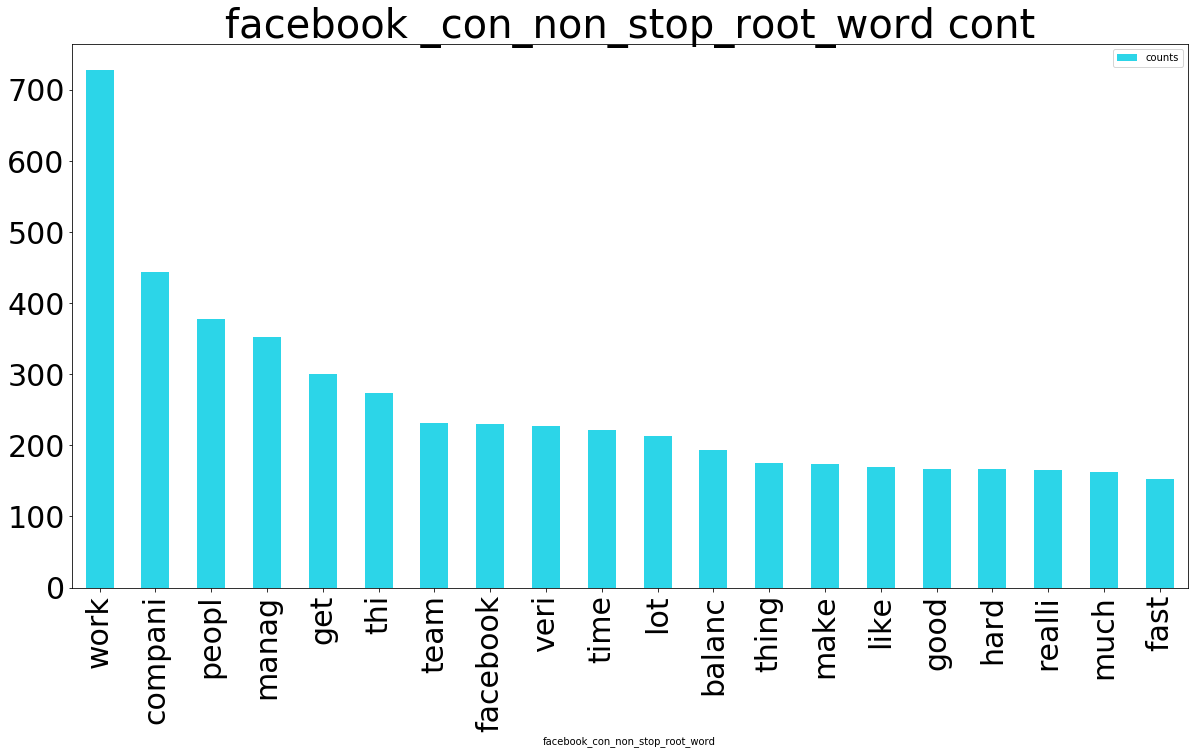

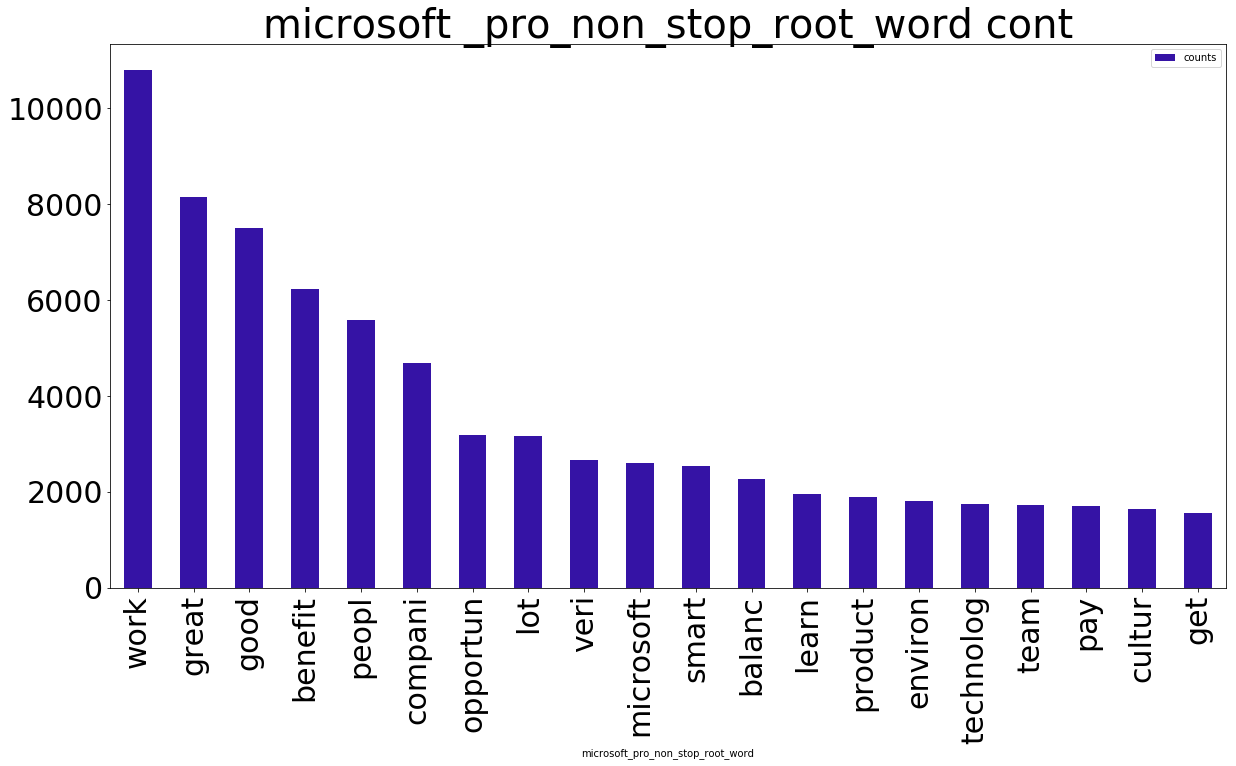

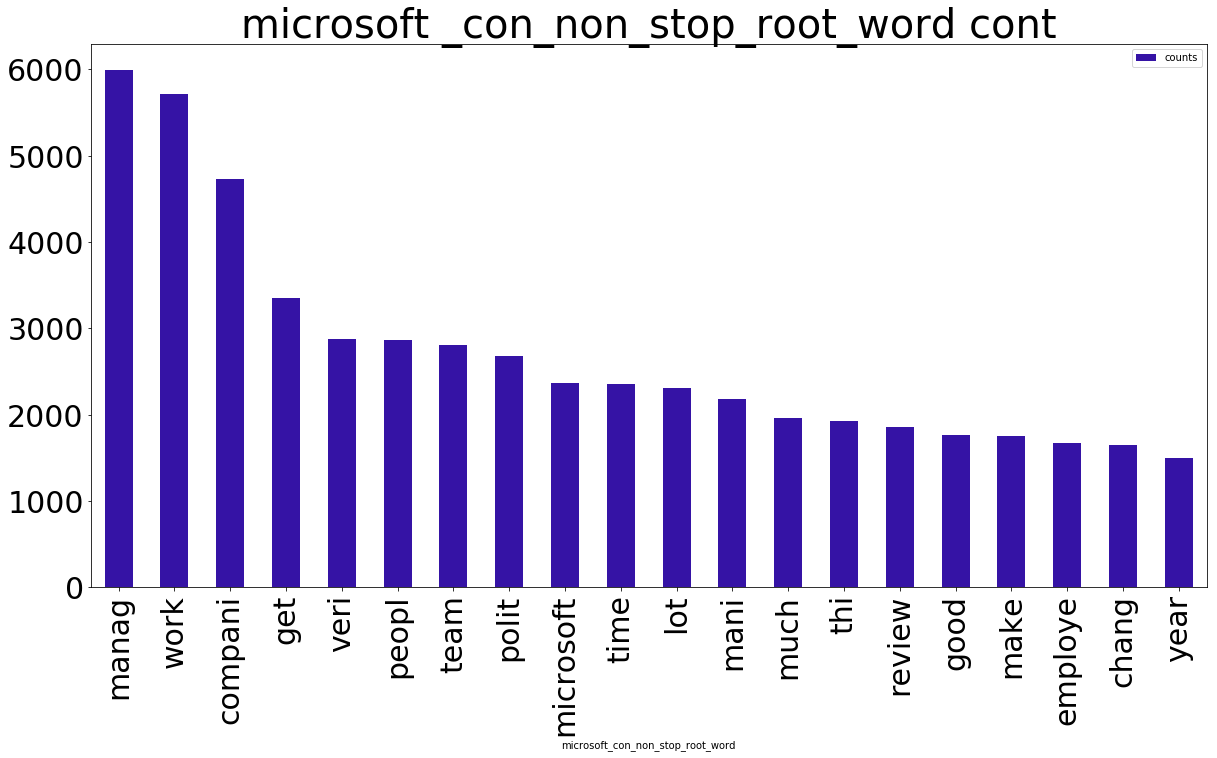

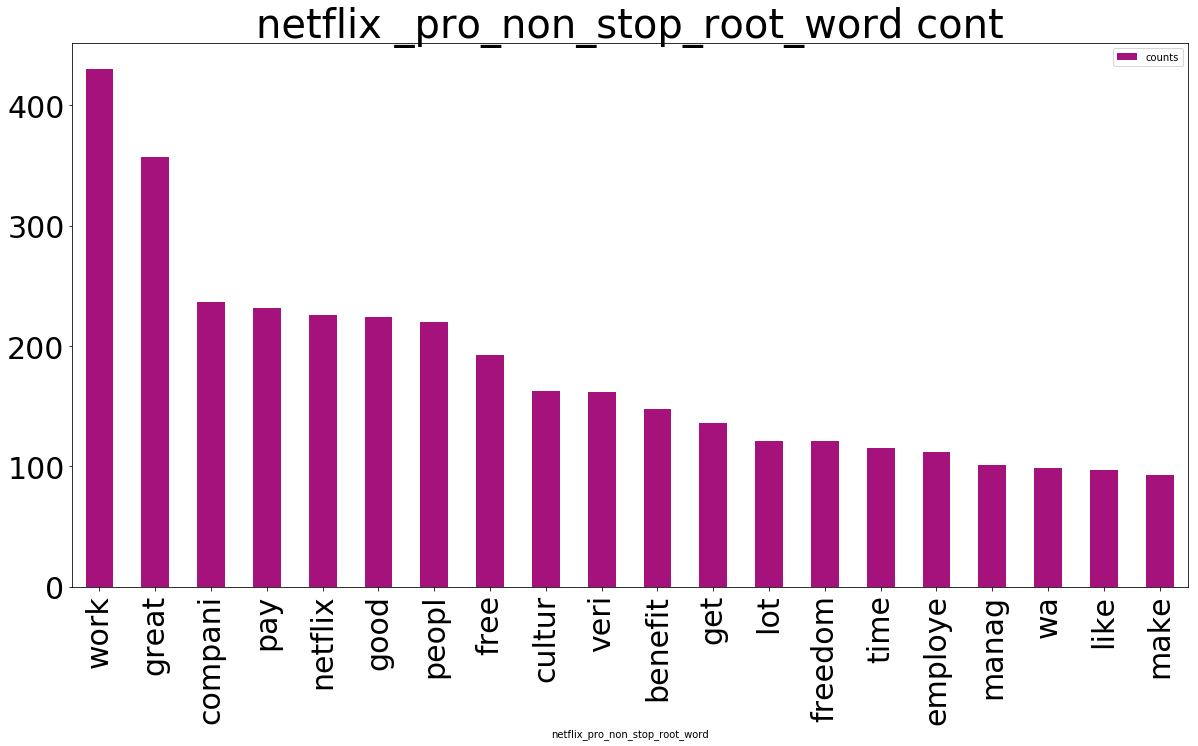

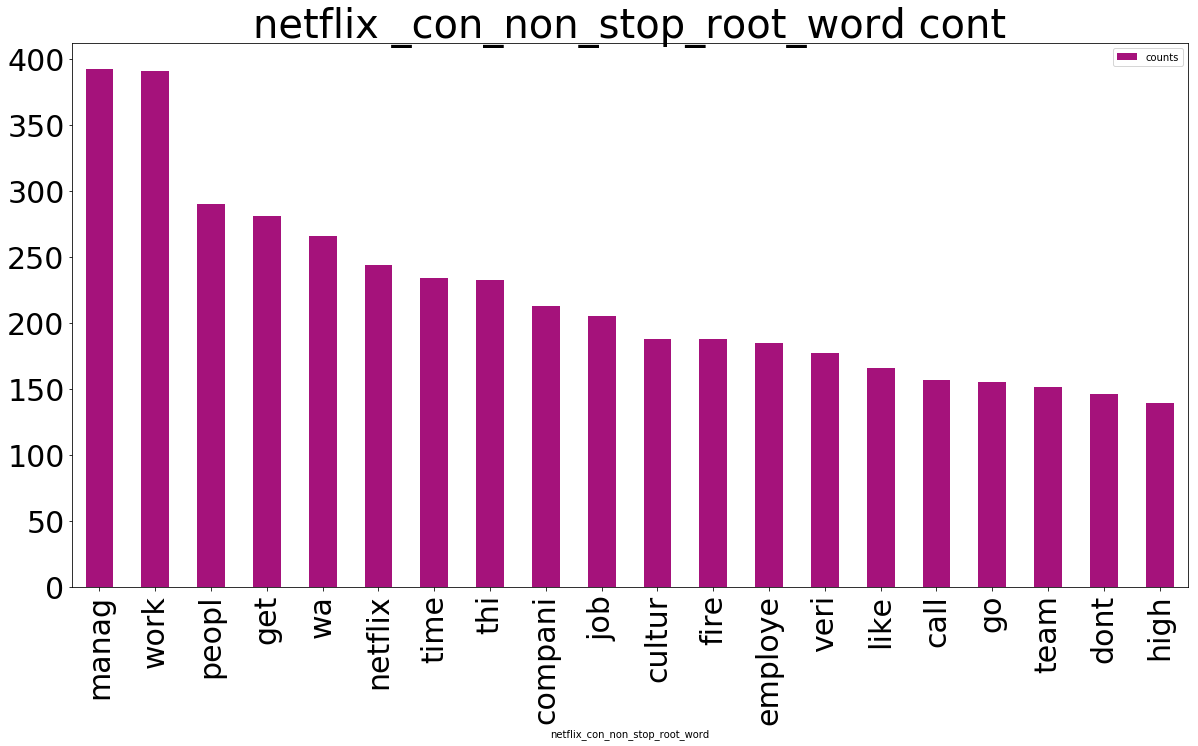

In [80]:
#build data fram to result of count non stop root words
pro_non_stop_root_word_count_table_dic = {}
con_non_stop_root_word_count_table_dic = {}

for name in company_name_tuple:
    pro_non_stop_root_word_count_table_dic[name] = pd.DataFrame.from_dict({(name+'_pro_non_stop_root_word'):list(pro_rootword_remove_stopword_count_dic_of_dic[name].keys()) , 'counts': list(pro_rootword_remove_stopword_count_dic_of_dic[name].values())})
    con_non_stop_root_word_count_table_dic[name] = pd.DataFrame.from_dict({(name+'_con_non_stop_root_word'):list(con_rootword_remove_stopword_count_dic_of_dic[name].keys()) , 'counts': list(con_rootword_remove_stopword_count_dic_of_dic[name].values())})
    pro_non_stop_root_word_count_table_dic[name] = pro_non_stop_root_word_count_table_dic[name].sort_values(by='counts', ascending=False)
    con_non_stop_root_word_count_table_dic[name] = con_non_stop_root_word_count_table_dic[name].sort_values(by='counts', ascending=False)
    print(name)
    print("pro words: " + str(list(pro_non_stop_root_word_count_table_dic[name].iloc[0:10][name+'_pro_non_stop_root_word'])))
    print("con words: " + str(list(con_non_stop_root_word_count_table_dic[name].iloc[0:10][name+'_con_non_stop_root_word'])))
    pro_non_stop_root_word_count_table_dic[name].iloc[0:20].plot(kind = 'bar',x=name+'_pro_non_stop_root_word', y='counts',title=name + " _pro_non_stop_root_word cont",figsize=(20,10),fontsize=30, color = company_color_dic[name]).title.set_size(40)
    con_non_stop_root_word_count_table_dic[name].iloc[0:20].plot(kind = 'bar',x=name+'_con_non_stop_root_word', y='counts',title=name + " _con_non_stop_root_word cont",figsize=(20,10),fontsize=30, color = company_color_dic[name]).title.set_size(40)
    

In [44]:
#start to count root phrase
pro_root_phrase_count_dic_of_dic = {}
con_root_phrase_count_dic_of_dic = {}

for name in company_name_tuple:
    pro_root_phrase_count_dic_of_dic[name] = parse_data_as_root_phrase_count(pro_str_list_dic[name])
    con_root_phrase_count_dic_of_dic[name] = parse_data_as_root_phrase_count(con_str_list_dic[name])

overall
pro phrase: ['great benefit', 'smart peopl', 'good benefit', 'good pay', 'great place']
con phrase: ['big compani', 'hard work', 'upper manag', 'worklif balanc', 'other compani']
amazon
pro phrase: ['smart peopl', 'good pay', 'great benefit', 'good benefit', 'good work']
con phrase: ['hard work', 'short break', 'fast pace', 'worklif balanc', 'high turnov']
google
pro phrase: ['free food', 'smart peopl', 'great benefit', 'great peopl', 'great perk']
con phrase: ['big compani', 'smart peopl', 'larg compani', 'other compani', 'hard work']
apple
pro phrase: ['great benefit', 'good benefit', 'great peopl', 'great compani', 'good pay']
con phrase: ['retail hour', 'full time', 'retail store', 'retail job', 'retail environ']
facebook
pro phrase: ['smart peopl', 'free food', 'great benefit', 'open cultur', 'great perk']
con phrase: ['worklif balanc', 'big compani', 'other compani', 'ani con', 'fast pace']
microsoft
pro phrase: ['smart peopl', 'great benefit', 'good benefit', 'good work'

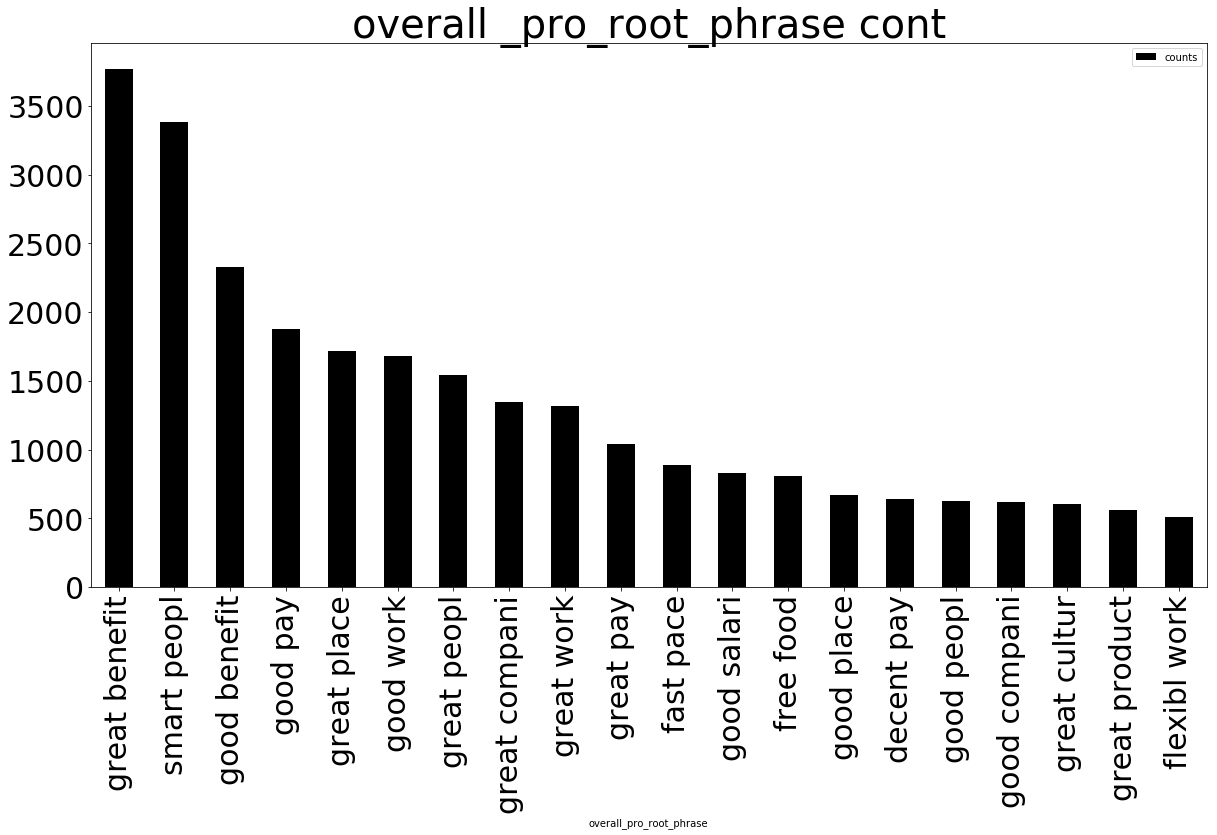

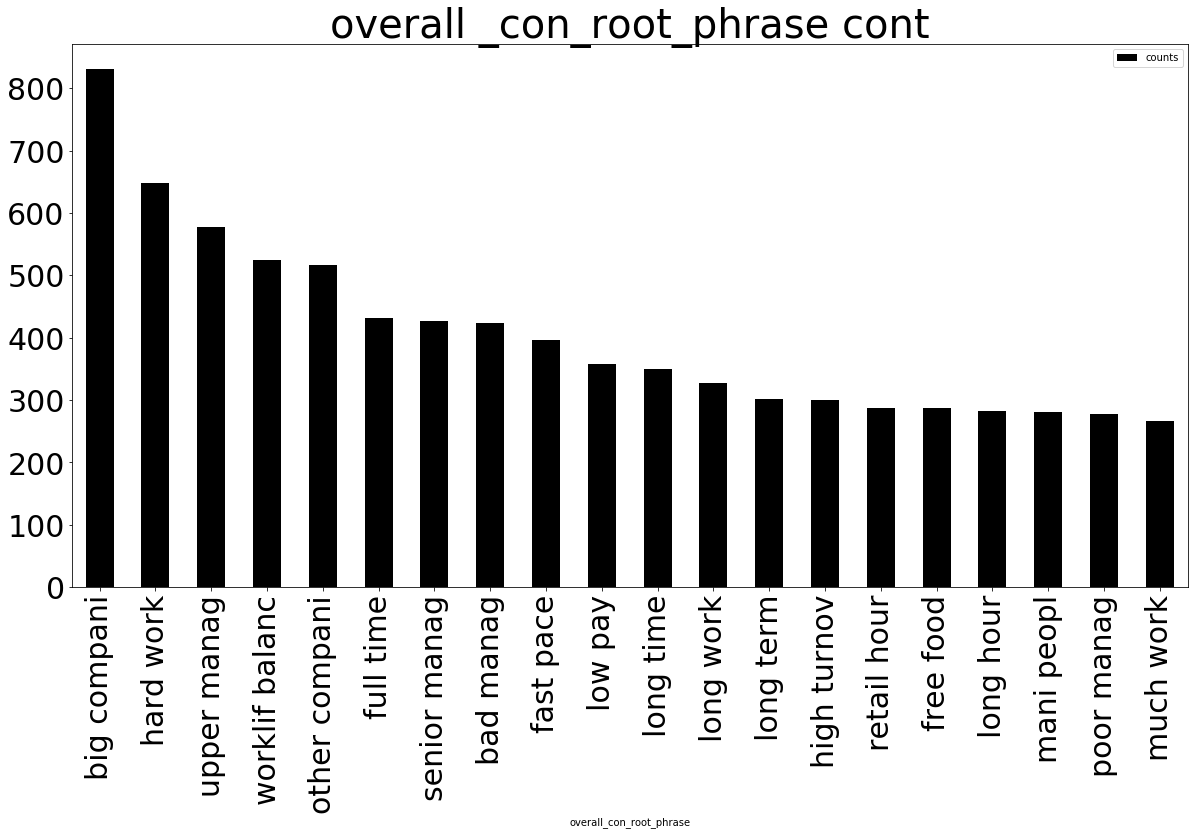

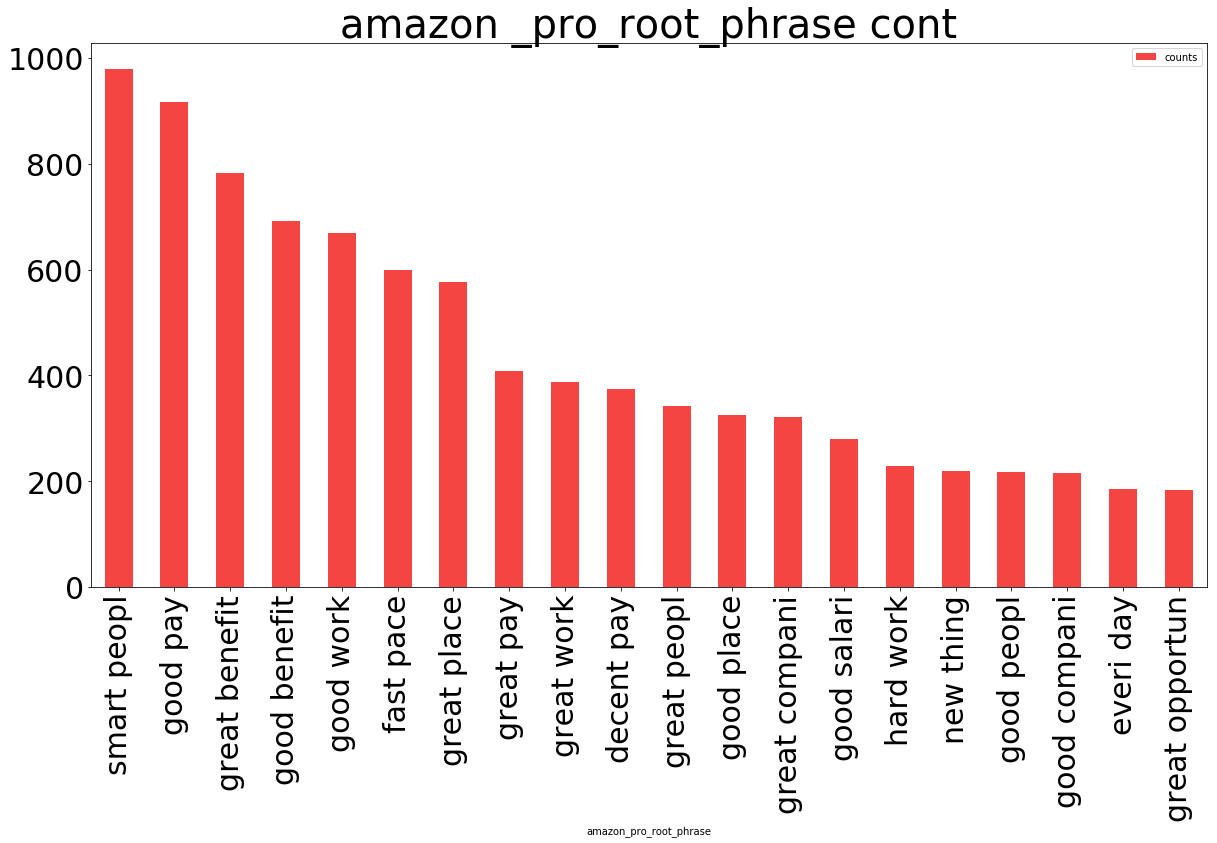

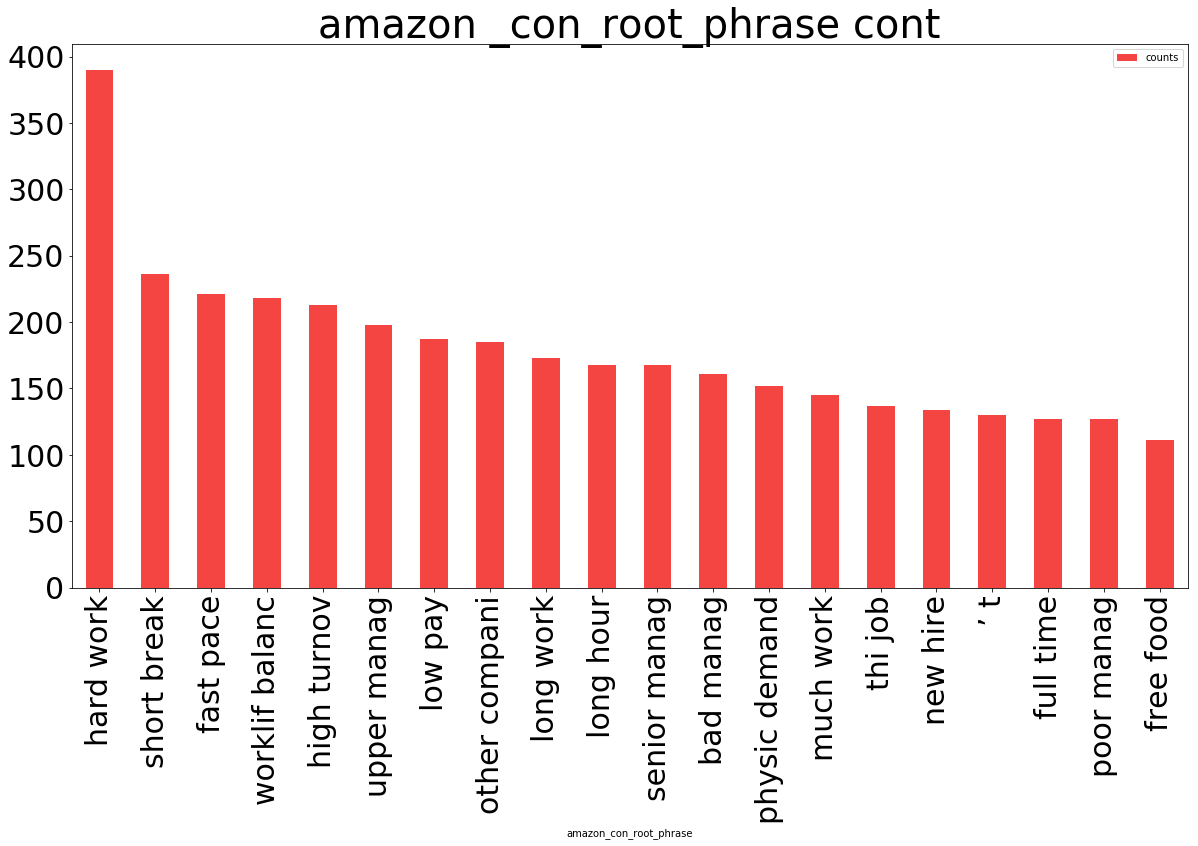

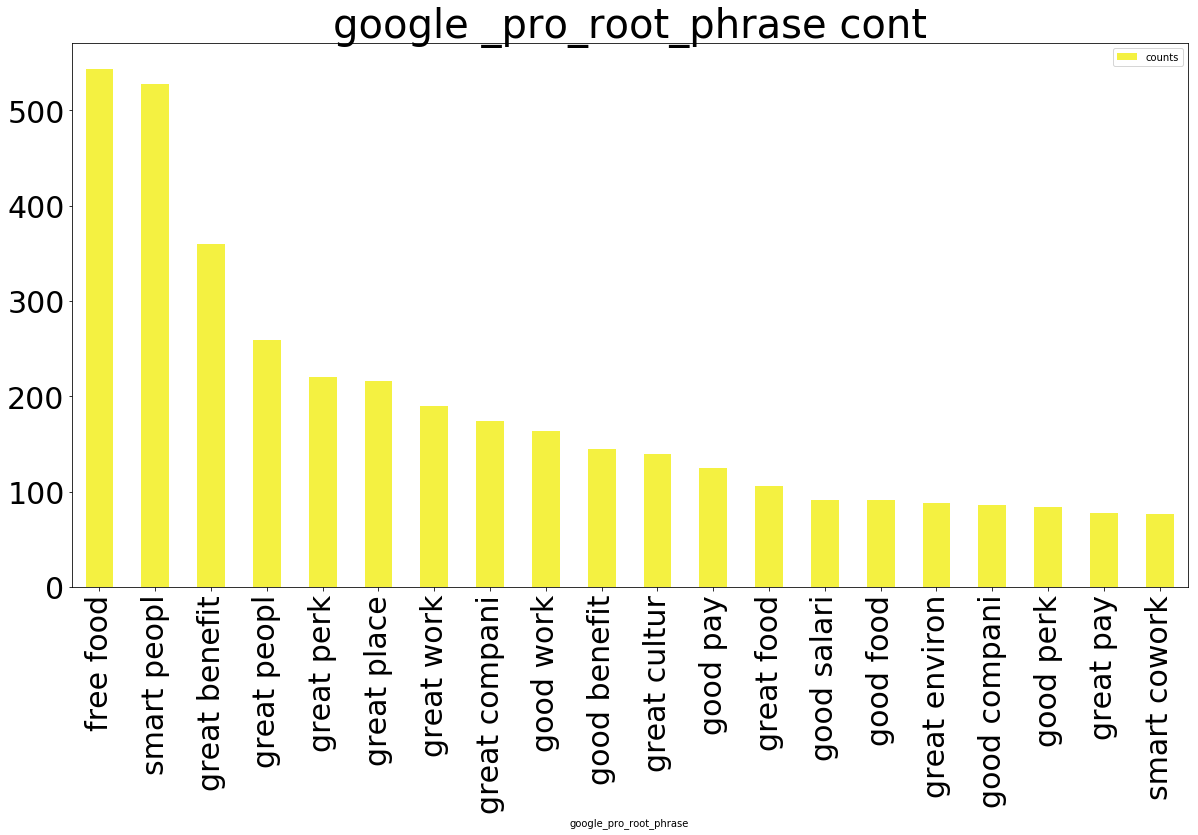

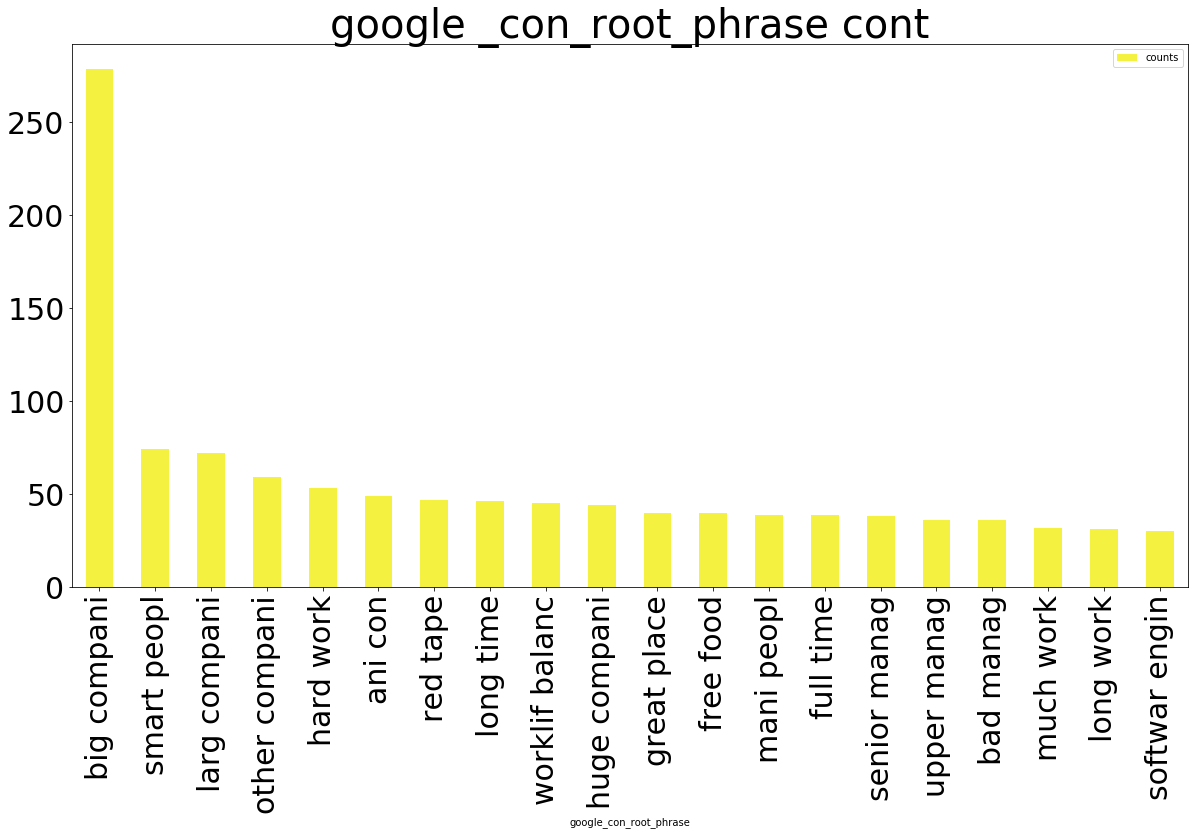

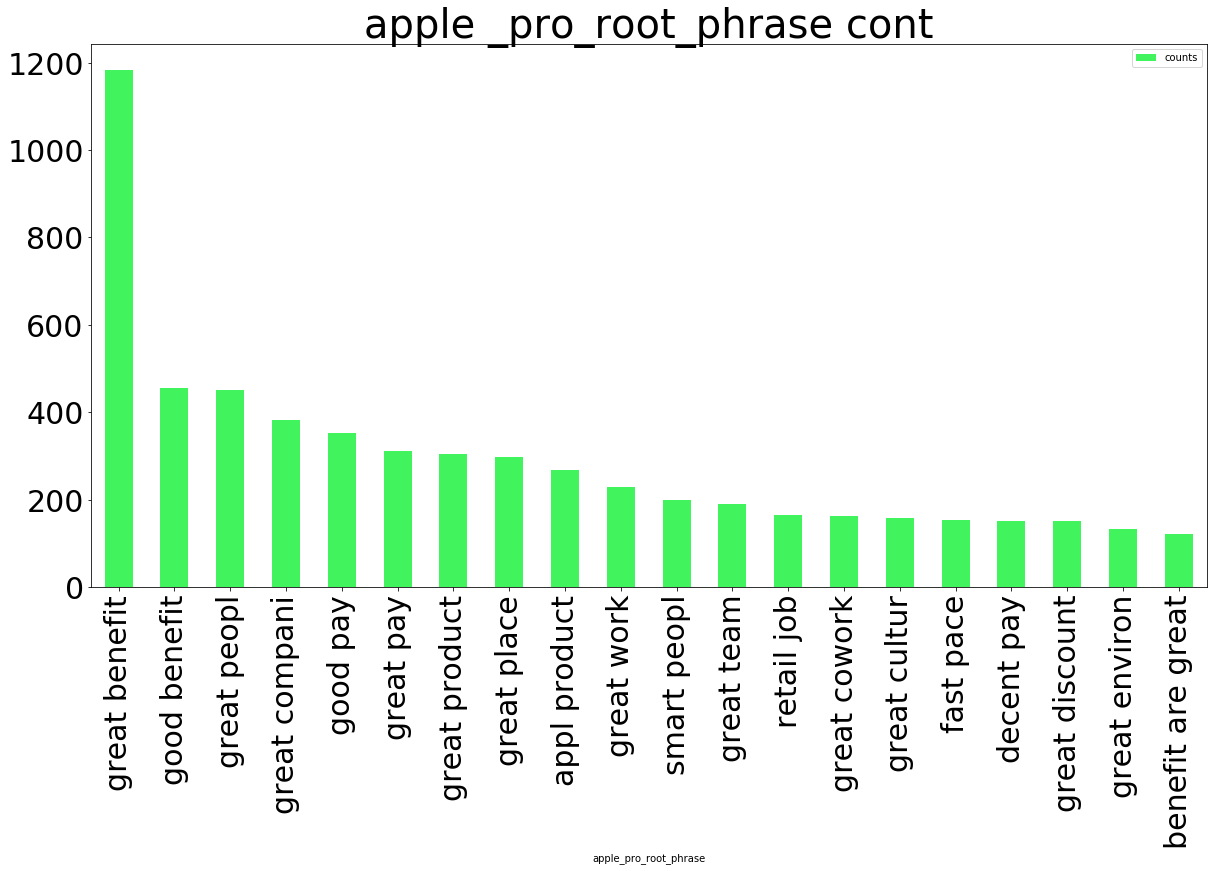

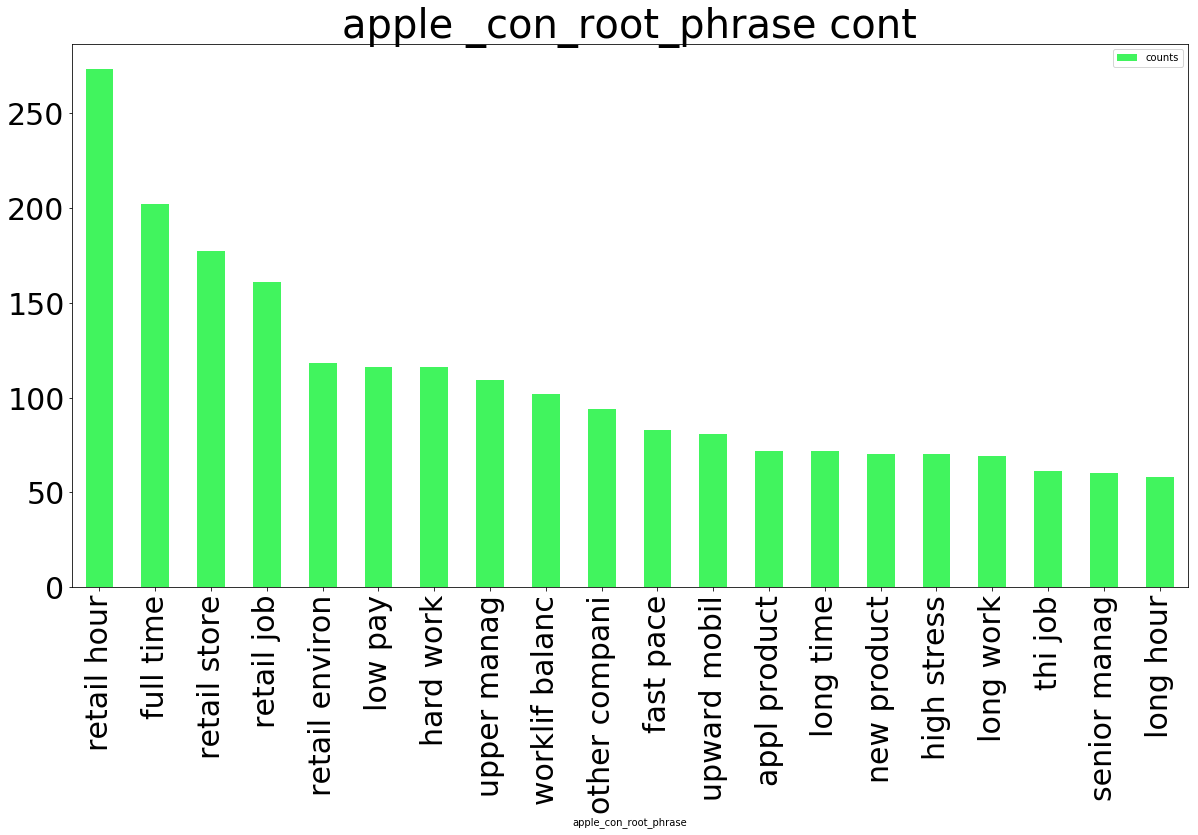

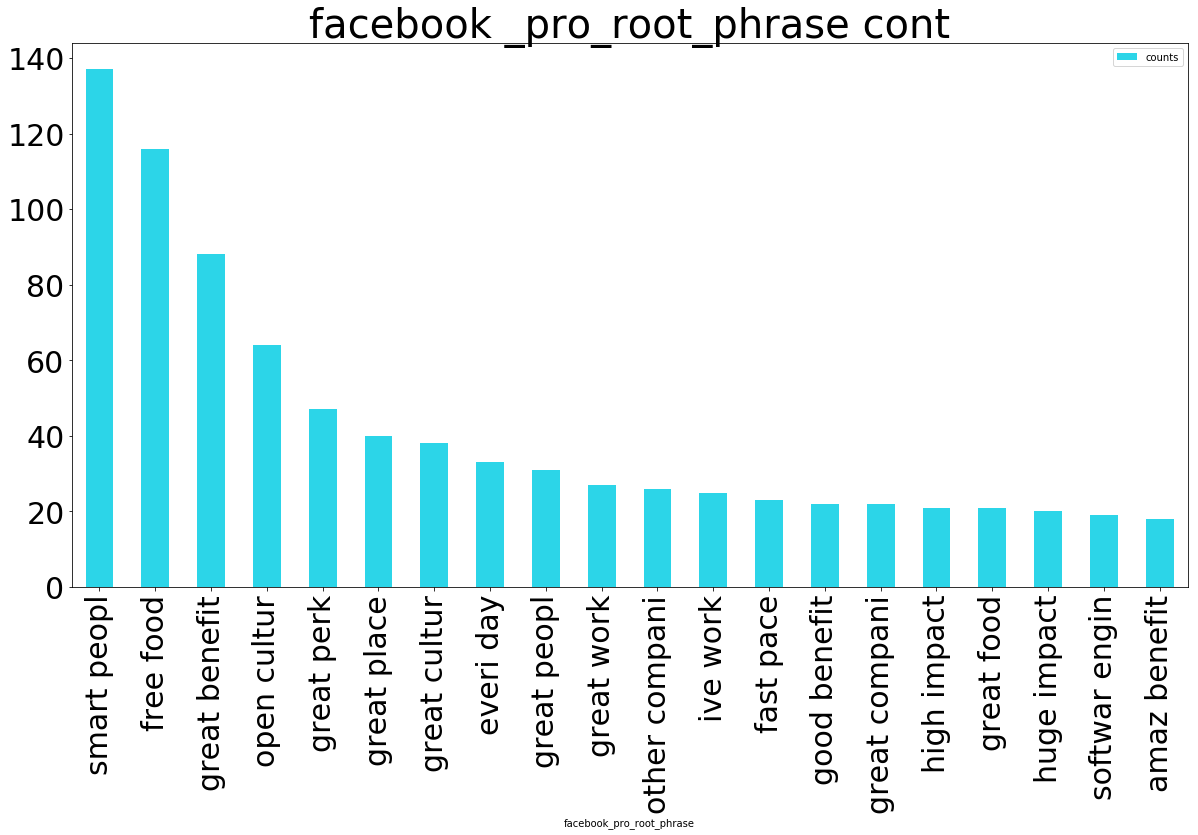

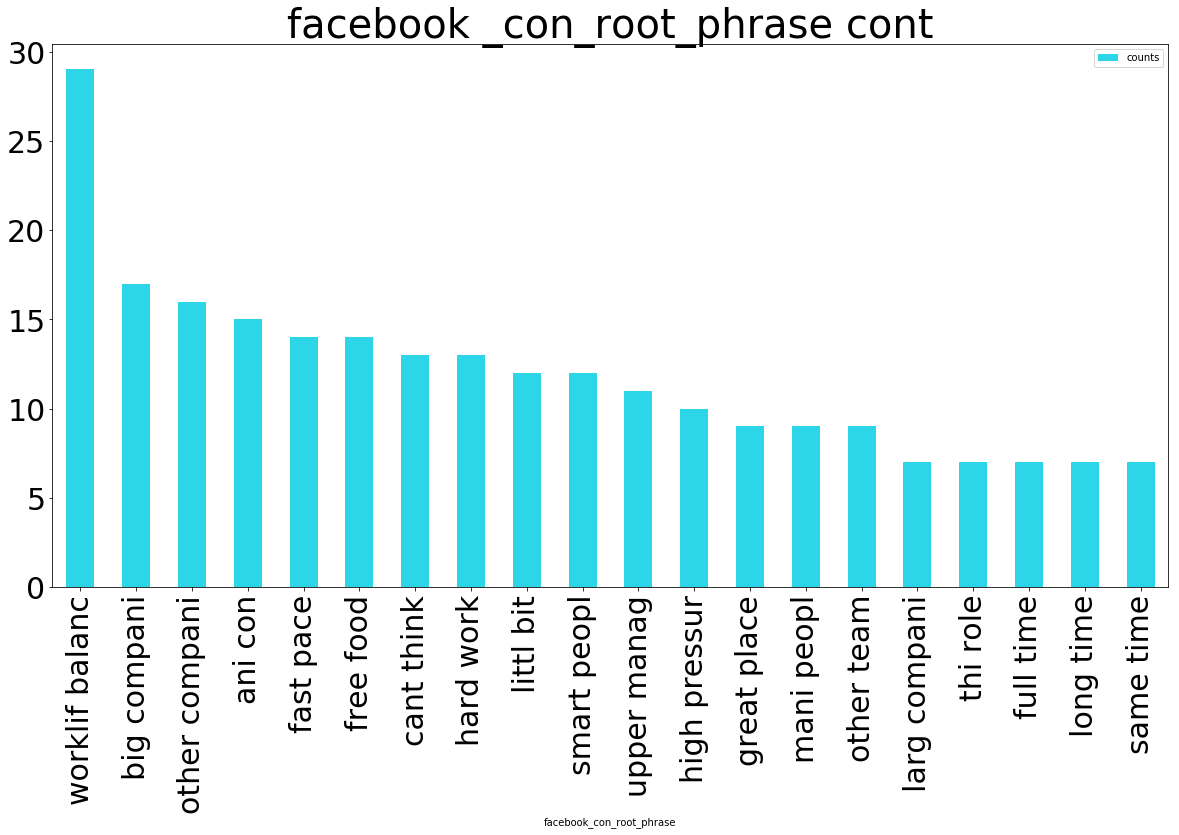

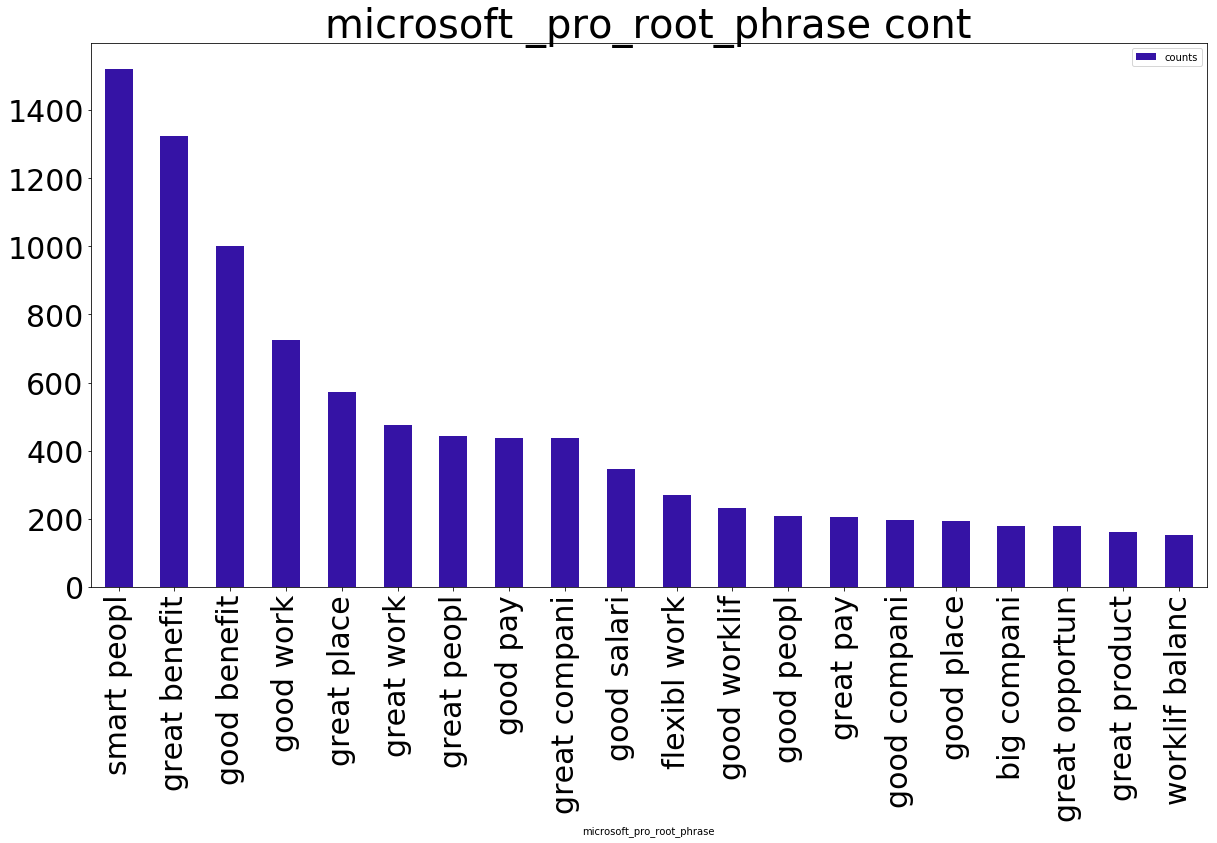

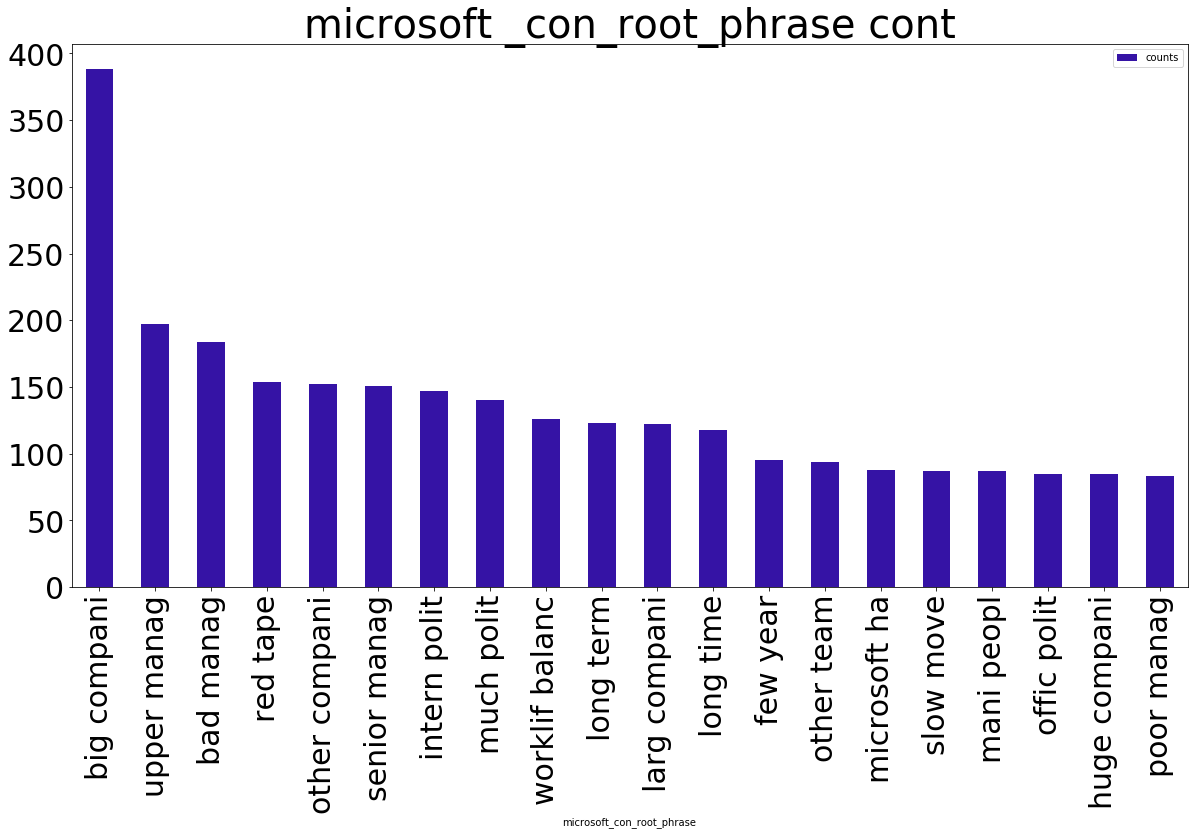

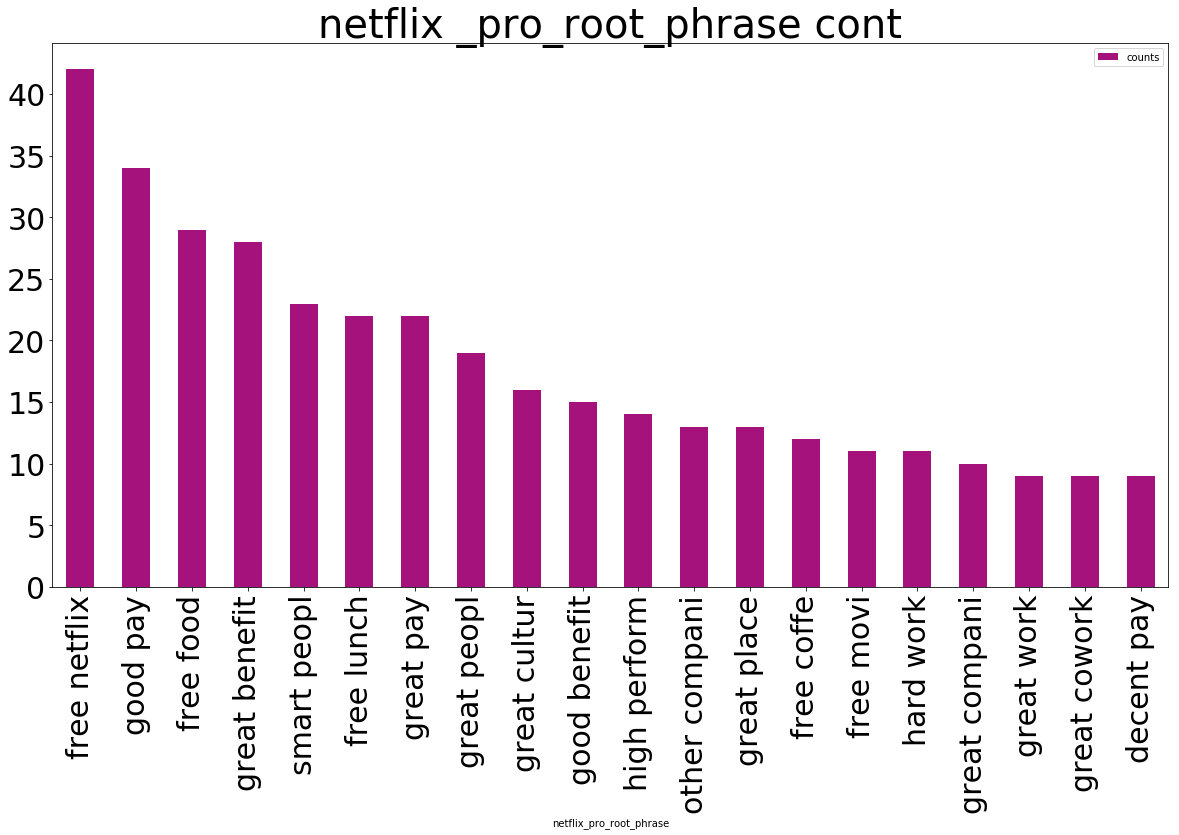

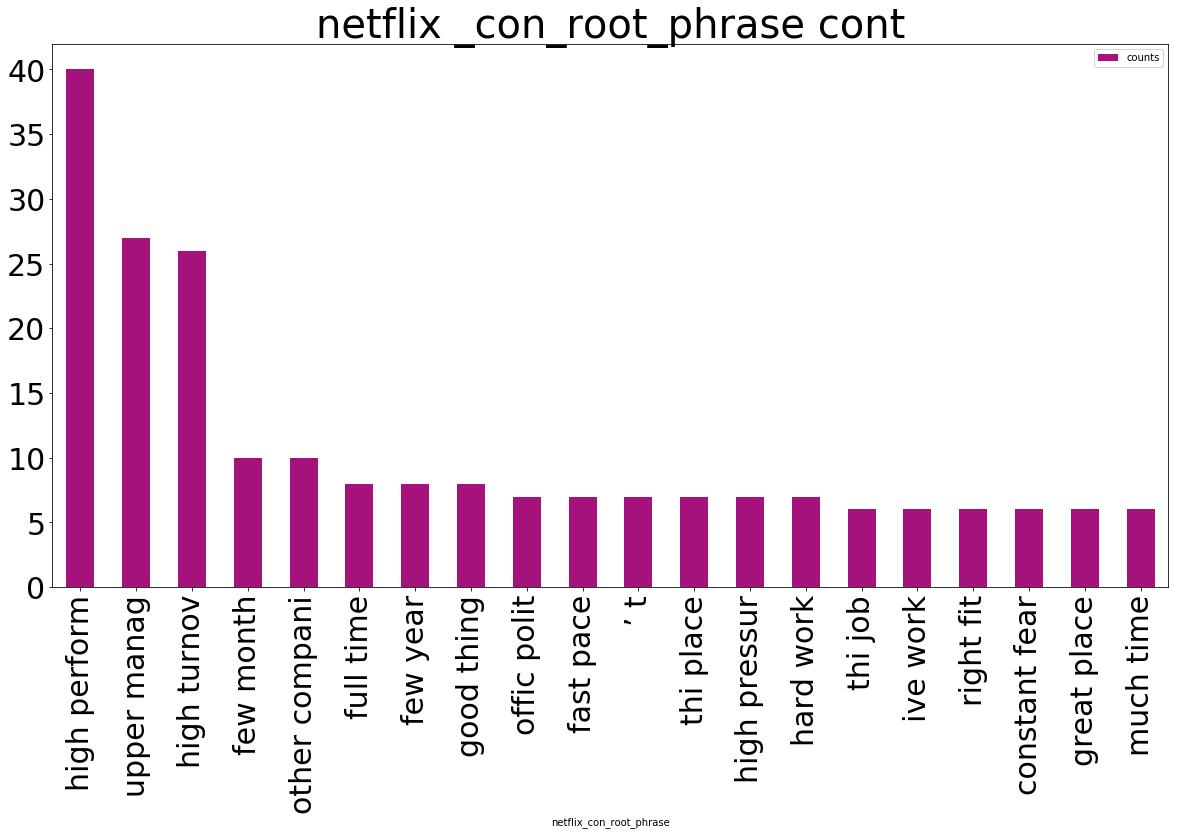

In [82]:
#build data fram to result of count root phrase
pro_root_phrase_count_table_dic = {}
con_root_phrase_count_table_dic = {}

for name in company_name_tuple:
    pro_root_phrase_count_table_dic[name] = pd.DataFrame.from_dict({(name+'_pro_root_phrase'):list(pro_root_phrase_count_dic_of_dic[name].keys()) , 'counts': list(pro_root_phrase_count_dic_of_dic[name].values())})
    con_root_phrase_count_table_dic[name] = pd.DataFrame.from_dict({(name+'_con_root_phrase'):list(con_root_phrase_count_dic_of_dic[name].keys()) , 'counts': list(con_root_phrase_count_dic_of_dic[name].values())})
    pro_root_phrase_count_table_dic[name] = pro_root_phrase_count_table_dic[name].sort_values(by='counts', ascending=False)
    con_root_phrase_count_table_dic[name] = con_root_phrase_count_table_dic[name].sort_values(by='counts', ascending=False)
    print(name)
    print("pro phrase: " + str(list(pro_root_phrase_count_table_dic[name].iloc[0:5][name+'_pro_root_phrase'])))
    print("con phrase: " + str(list(con_root_phrase_count_table_dic[name].iloc[0:5][name+'_con_root_phrase'])))
    pro_root_phrase_count_table_dic[name].iloc[0:20].plot(kind = 'bar',x=name+'_pro_root_phrase', y='counts',title=name + " _pro_root_phrase cont",figsize=(20,10),fontsize=30, color = company_color_dic[name]).title.set_size(40)
    con_root_phrase_count_table_dic[name].iloc[0:20].plot(kind = 'bar',x=name+'_con_root_phrase', y='counts',title=name + " _con_root_phrase cont",figsize=(20,10),fontsize=30, color = company_color_dic[name]).title.set_size(40)
    

In [46]:
#start to count phrase
pro_phrase_count_dic_of_dic = {}
con_phrase_count_dic_of_dic = {}

for name in company_name_tuple:
    pro_phrase_count_dic_of_dic[name] = parse_data_as_phrase_count(pro_str_list_dic[name])
    con_phrase_count_dic_of_dic[name] = parse_data_as_phrase_count(con_str_list_dic[name])

overall
pro phrase: ['good pay', 'great place', 'great company', 'good work', 'great work', 'great pay', 'free food']
con phrase: ['worklife balance', 'big company', 'upper management', 'hard work', 'large company', 'middle management', 'senior management']
amazon
pro phrase: ['good pay', 'great place', 'good work', 'great pay', 'decent pay', 'great company', 'good place']
con phrase: ['worklife balance', 'hard work', 'high turnover', 'upper management', 'low pay', 'senior management', 'mandatory overtime']
google
pro phrase: ['free food', 'great place', 'great company', 'great culture', 'great work', 'good work', 'good pay']
con phrase: ['big company', 'large company', 'middle management', 'worklife balance', 'red tape', 'long time', 'hard work']
apple
pro phrase: ['great company', 'good pay', 'great pay', 'great place', 'great culture', 'great team', 'great work']
con phrase: ['worklife balance', 'full time', 'retail job', 'upper management', 'retail store', 'low pay', 'retail enviro

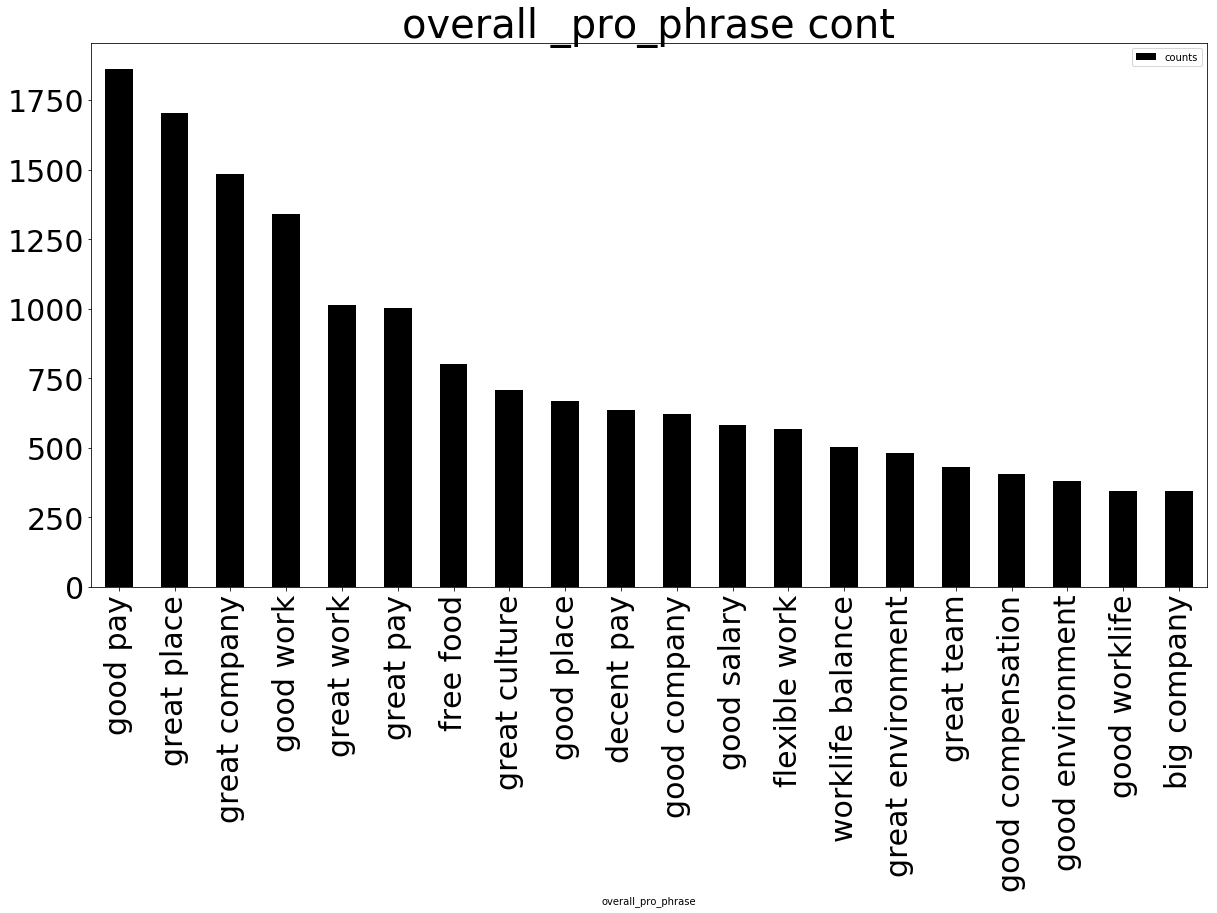

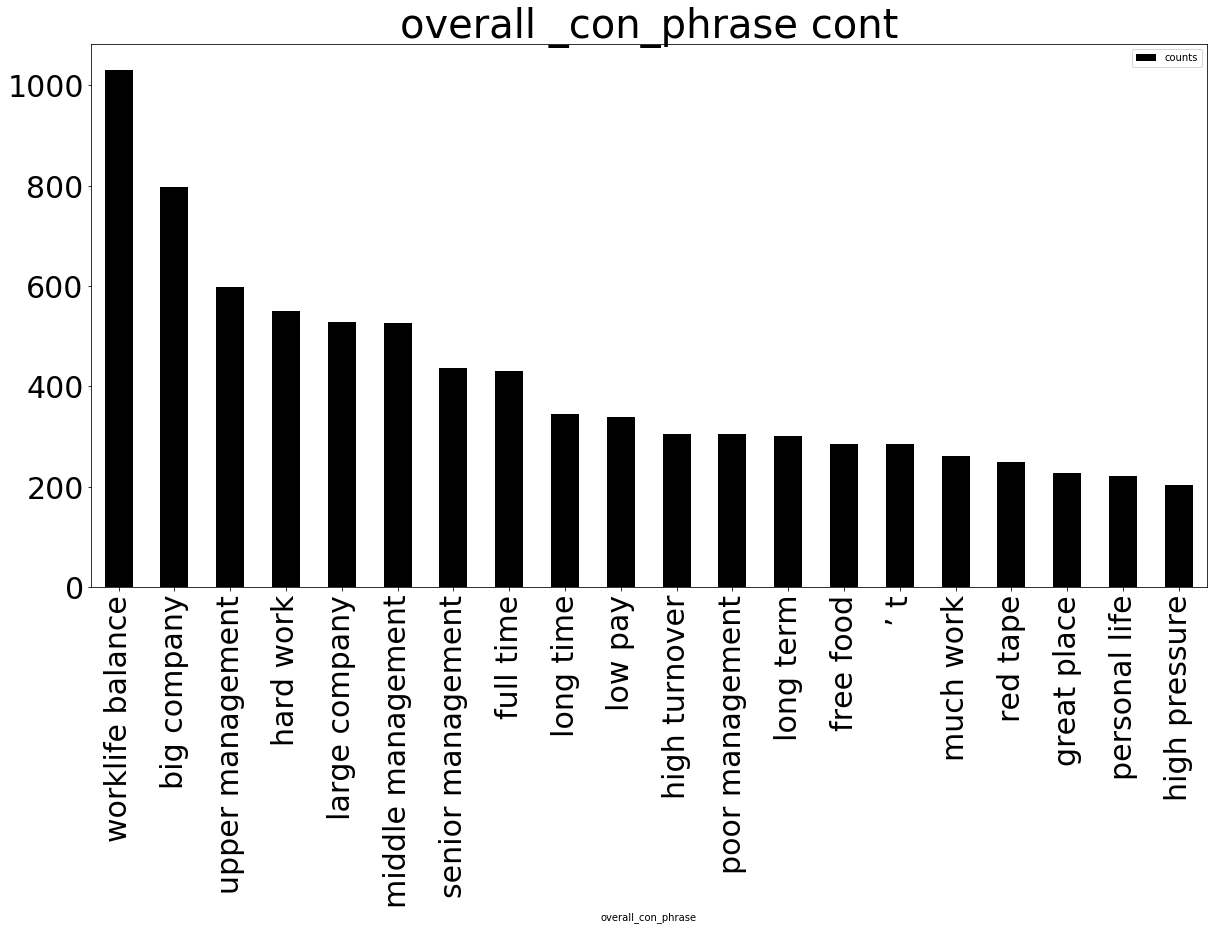

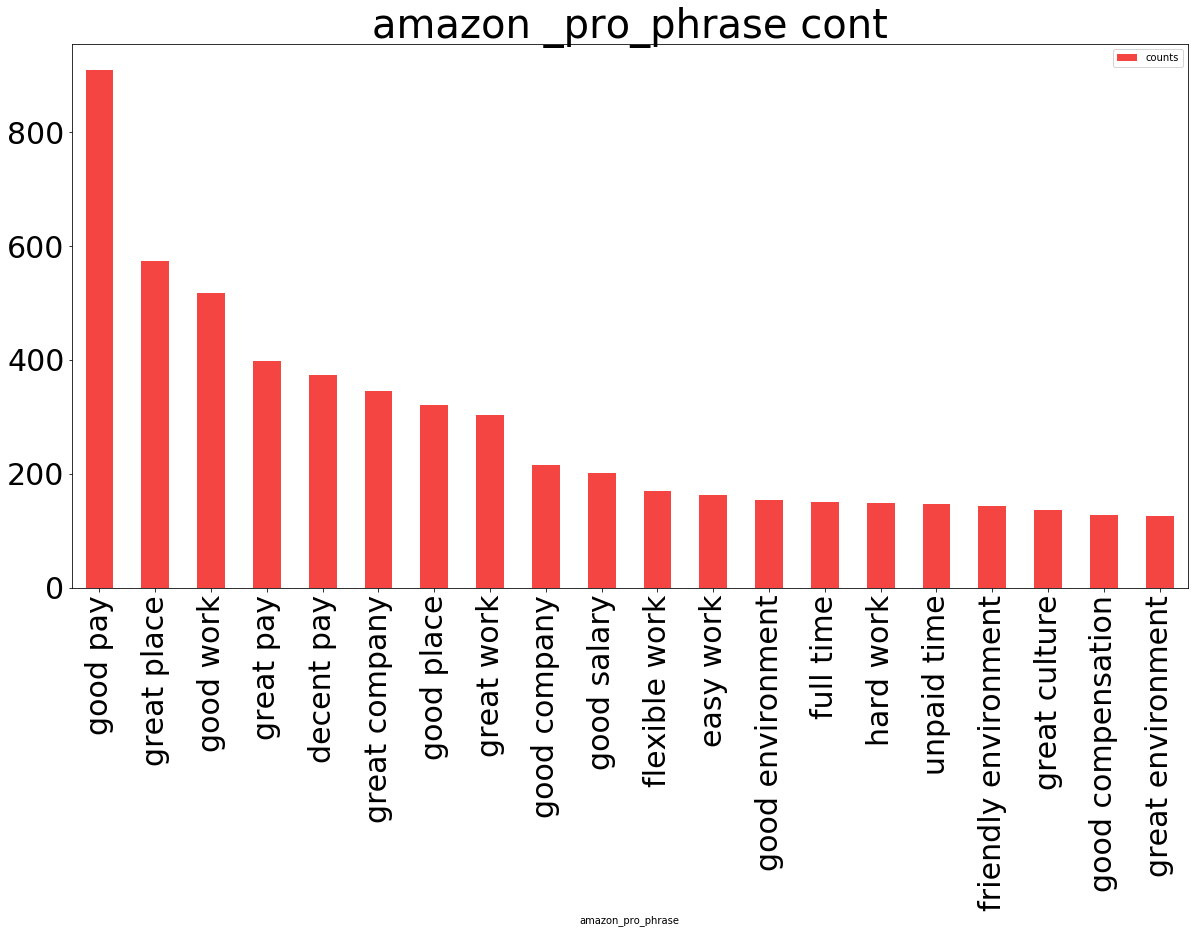

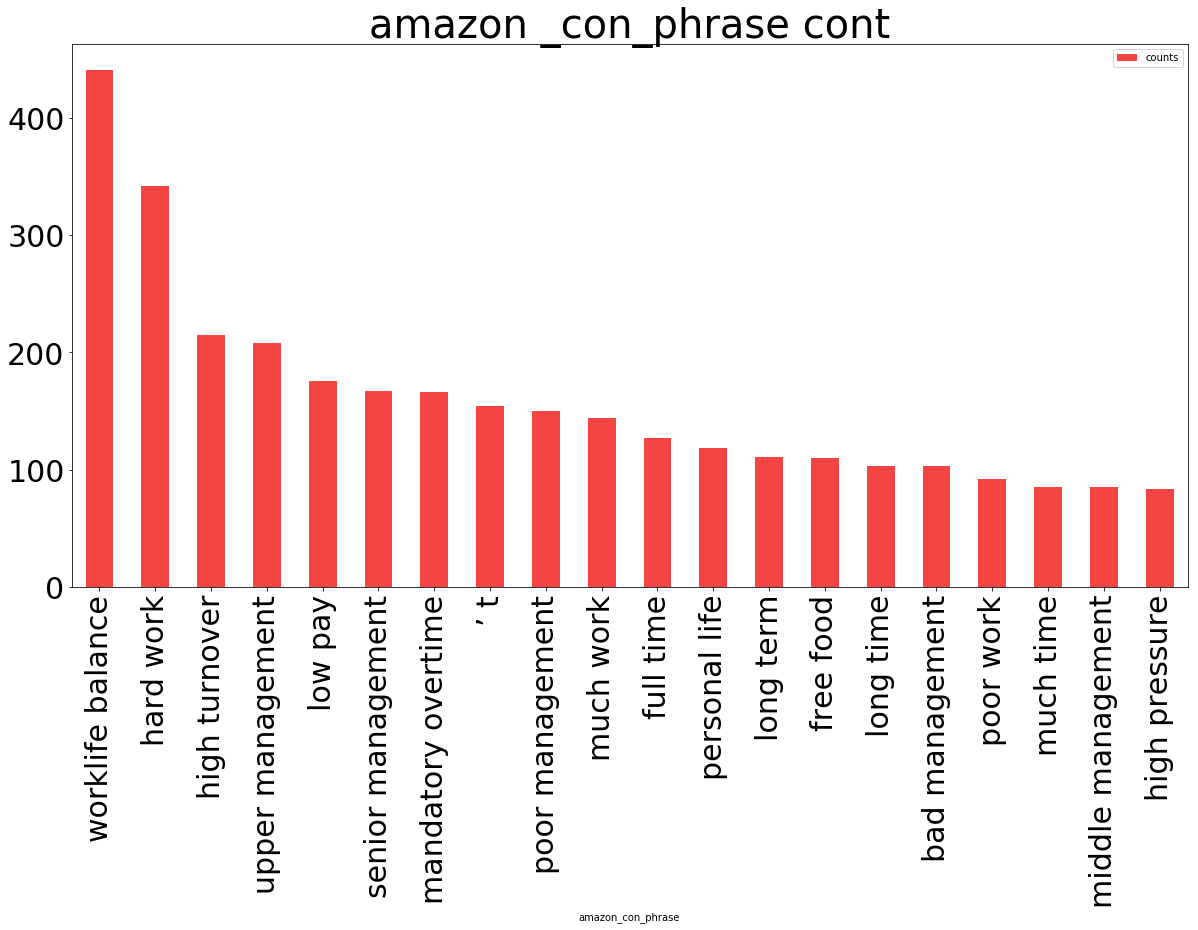

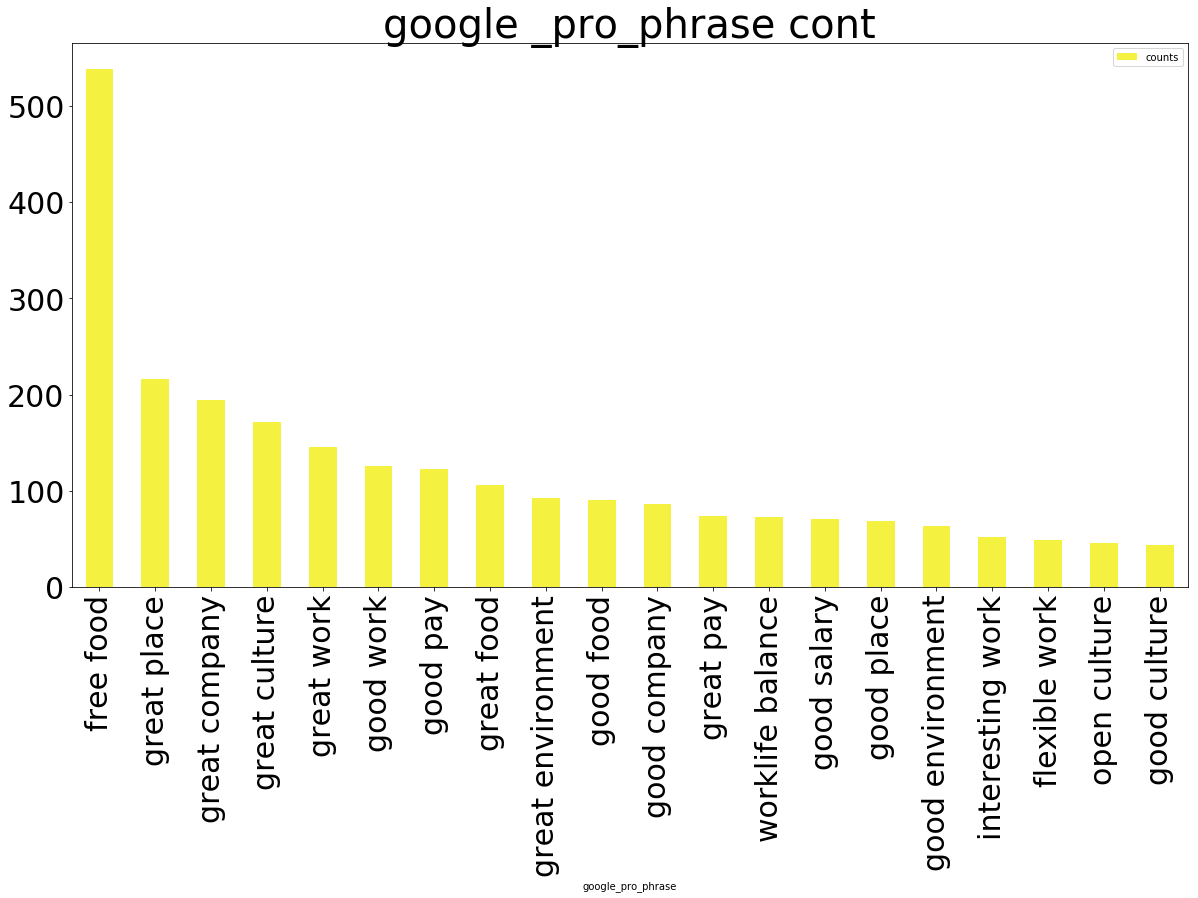

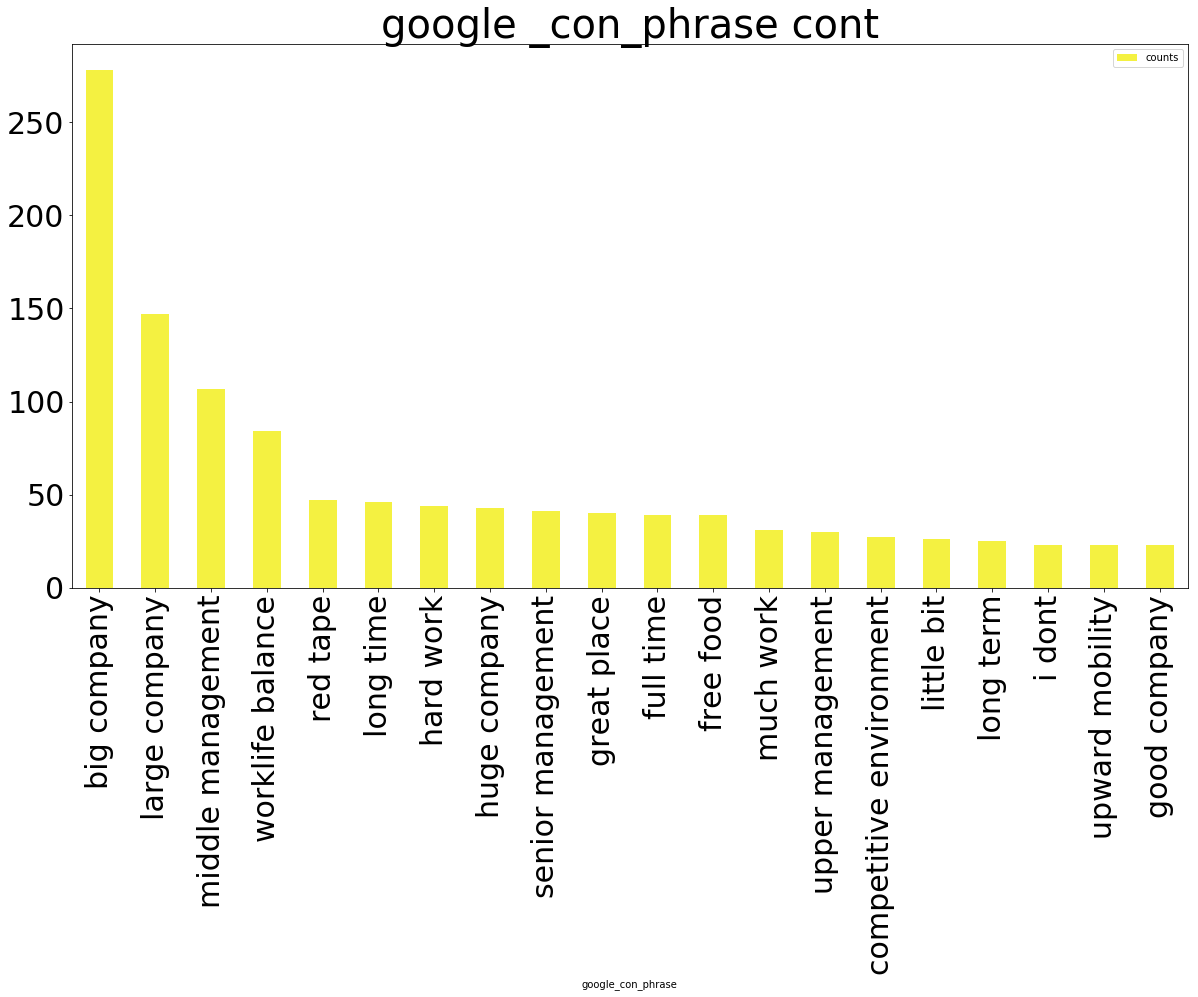

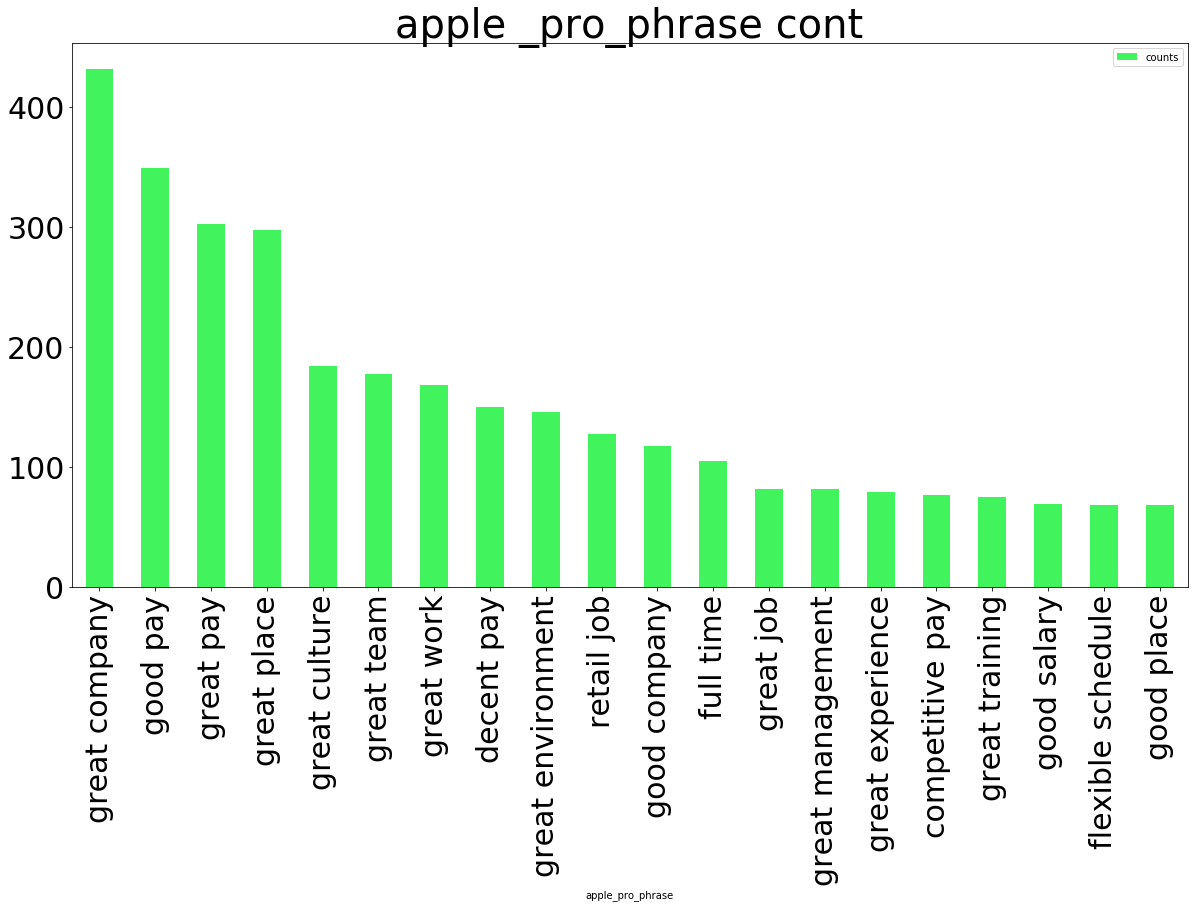

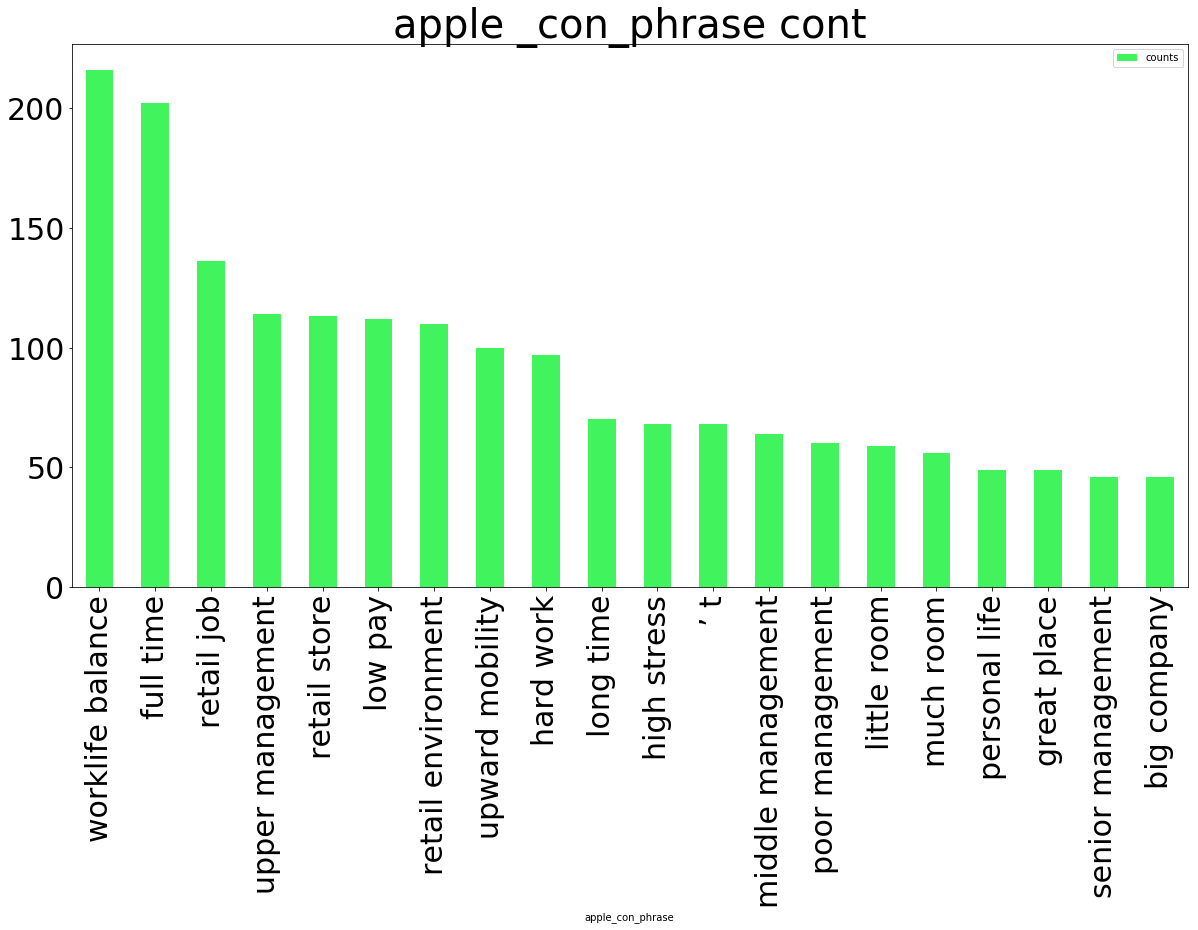

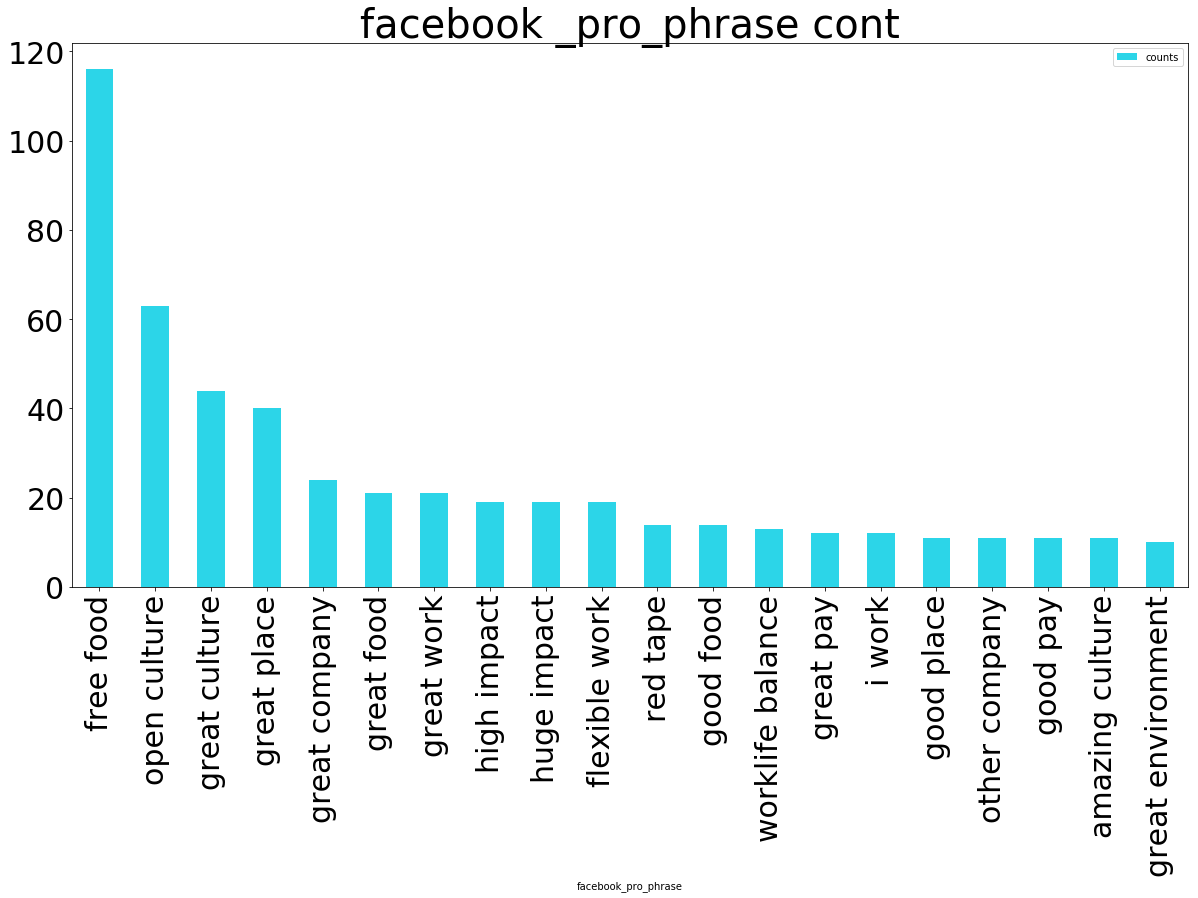

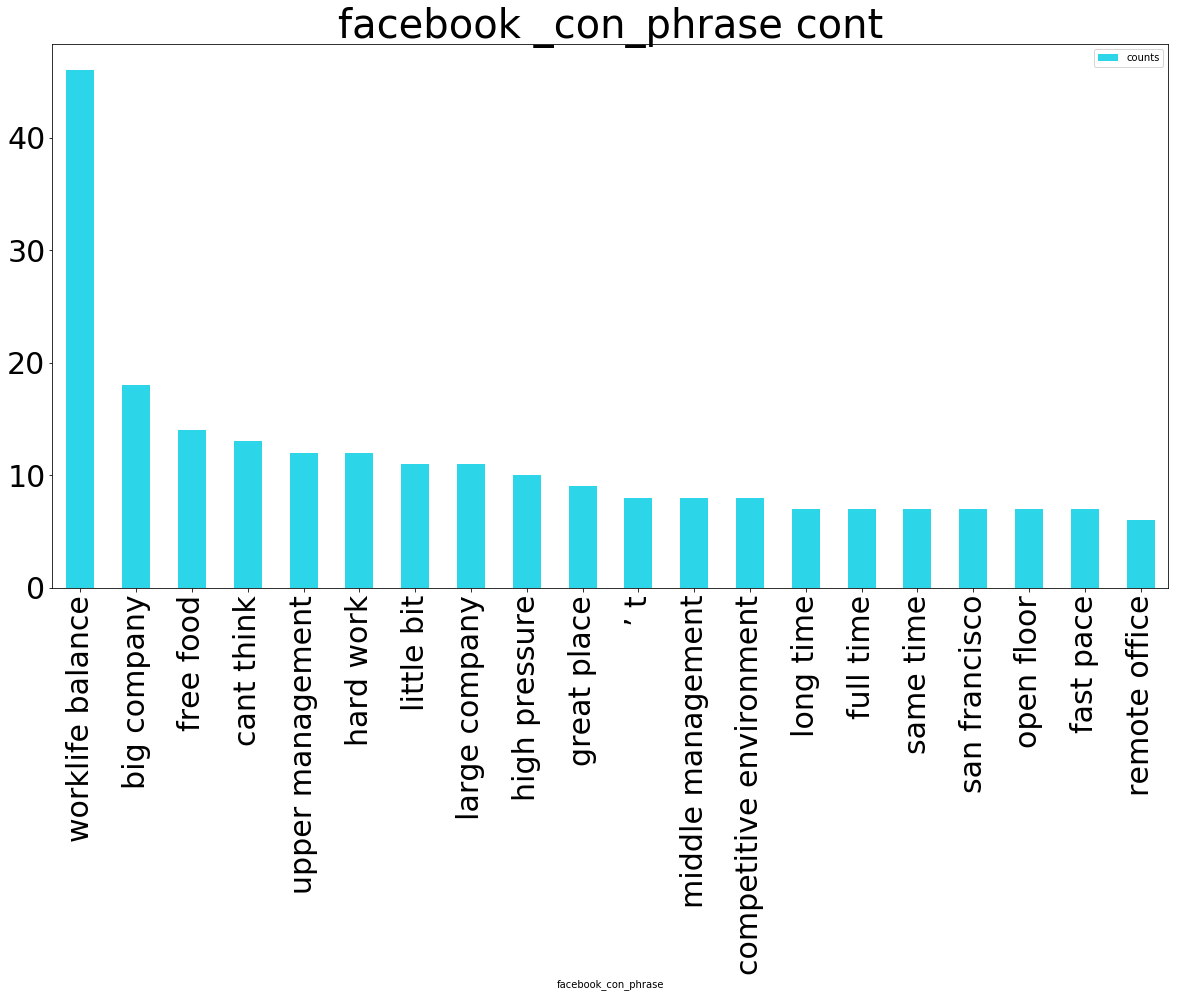

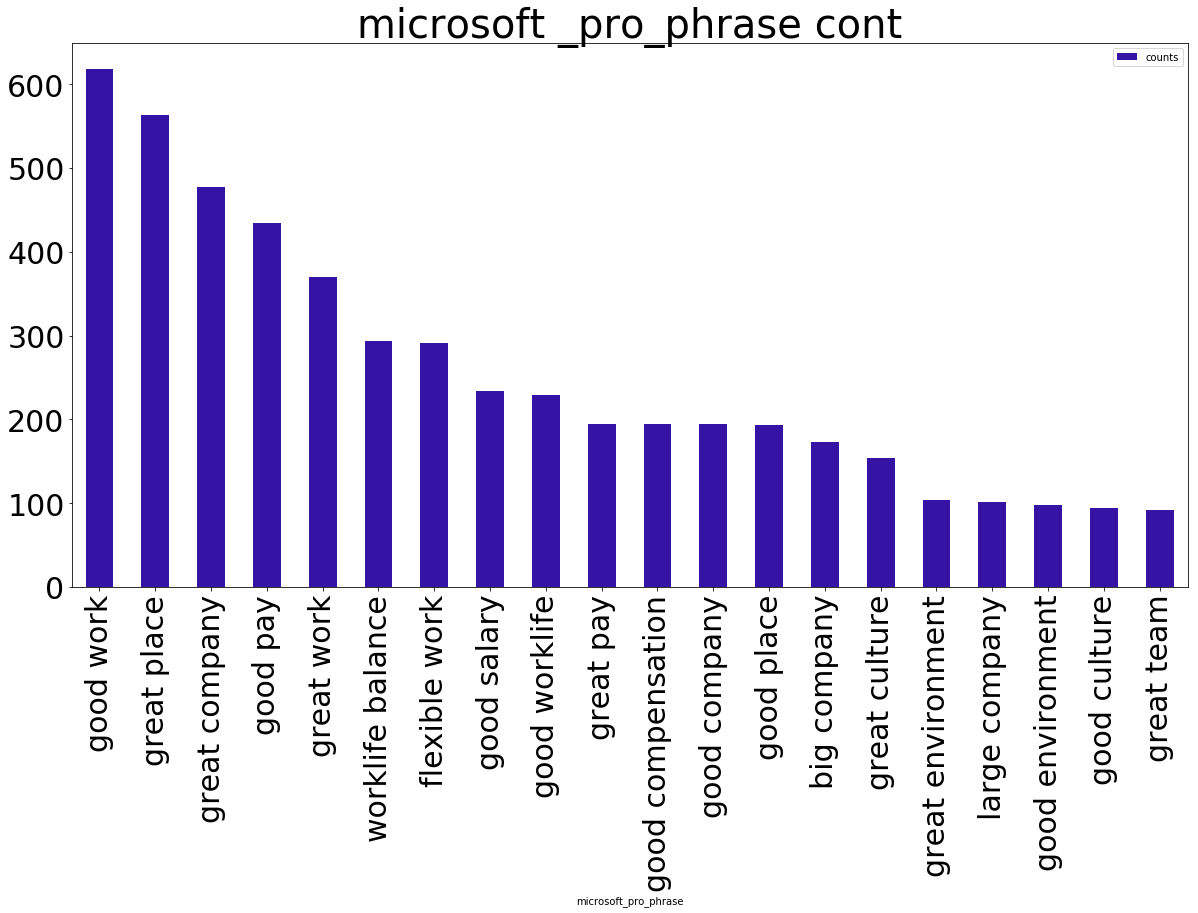

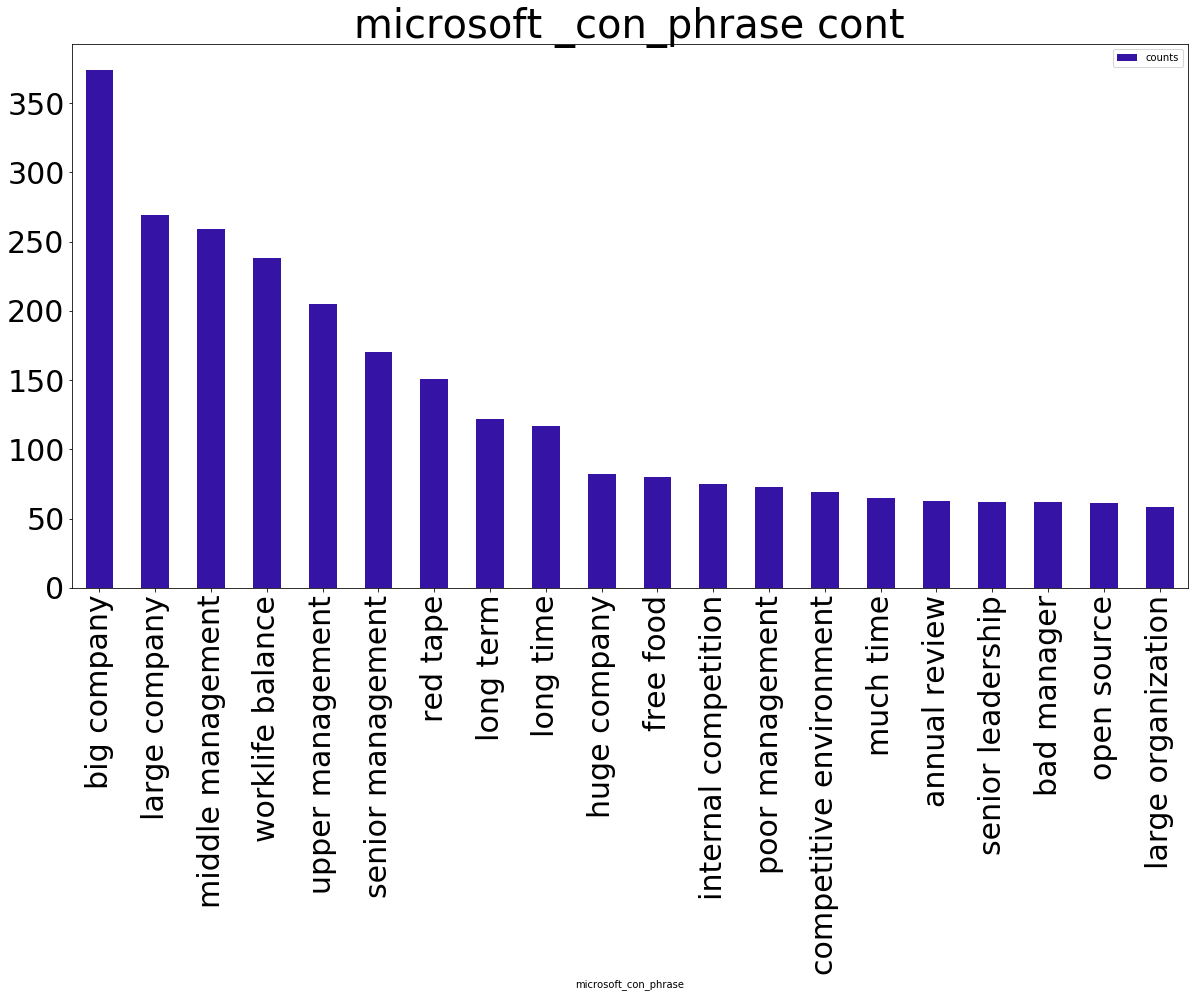

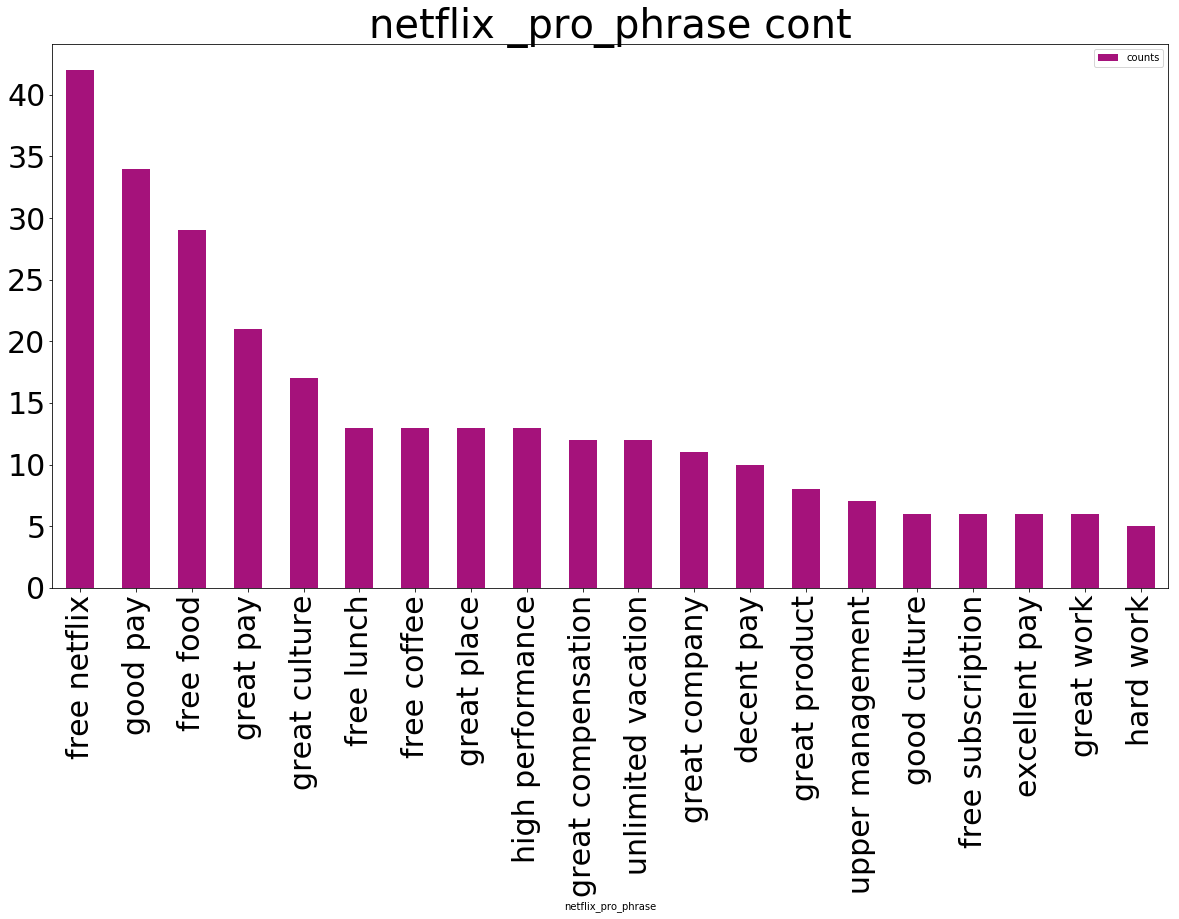

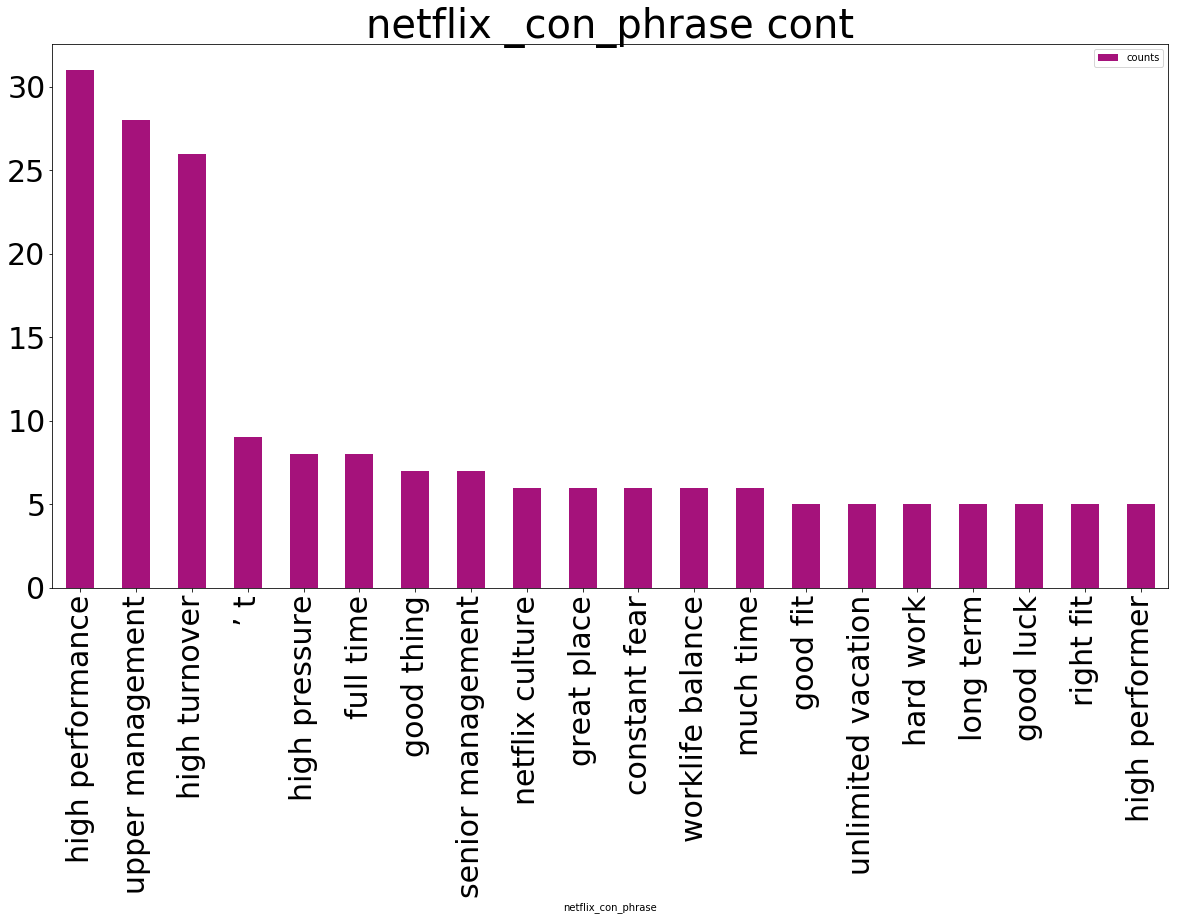

In [86]:
#build data fram to result of count root phrase
pro_phrase_count_table_dic = {}
con_phrase_count_table_dic = {}

for name in company_name_tuple:
    pro_phrase_count_table_dic[name] = pd.DataFrame.from_dict({(name+'_pro_phrase'):list(pro_phrase_count_dic_of_dic[name].keys()) , 'counts': list(pro_phrase_count_dic_of_dic[name].values())})
    con_phrase_count_table_dic[name] = pd.DataFrame.from_dict({(name+'_con_phrase'):list(con_phrase_count_dic_of_dic[name].keys()) , 'counts': list(con_phrase_count_dic_of_dic[name].values())})
    pro_phrase_count_table_dic[name] = pro_phrase_count_table_dic[name].sort_values(by='counts', ascending=False)
    con_phrase_count_table_dic[name] = con_phrase_count_table_dic[name].sort_values(by='counts', ascending=False)
    print(name)
    print("pro phrase: " + str(list(pro_phrase_count_table_dic[name].iloc[0:7][name+'_pro_phrase'])))
    print("con phrase: " + str(list(con_phrase_count_table_dic[name].iloc[0:7][name+'_con_phrase'])))
    pro_phrase_count_table_dic[name].iloc[0:20].plot(kind = 'bar',x=name+'_pro_phrase', y='counts',title=name + " _pro_phrase cont",figsize=(20,10),fontsize=30, color = company_color_dic[name]).title.set_size(40)
    con_phrase_count_table_dic[name].iloc[0:20].plot(kind = 'bar',x=name+'_con_phrase', y='counts',title=name + " _con_phrase cont",figsize=(20,10),fontsize=30, color = company_color_dic[name]).title.set_size(40)
    